In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [4]:
plt.rcParams["axes.grid"] = False

In [5]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.0 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [6]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [7]:
# adata1=sc.read_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [8]:
# adata1

In [9]:
# !cp -r Last_All_scanpyData/BCR_Figure/ All_scanpyData/BCR_Figure/

In [10]:
adata=sc.read_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [11]:
adata.obs.Last_cell_type=adata.obs.Last_cell_type.str.replace('CXCR5\\+ ', '').str.replace('CXCR5\\- ', '')

In [12]:
# adata.obs.Last_cell_type.value_counts()

In [13]:
# adata.obs.update(adata1.obs[["Last_cell_type"]])

In [14]:
# adata.obs.update(adata1.obs[["AdjustedID"]])

In [15]:
# adata.write_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [16]:
# adata1.write_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [17]:
##https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGH
IGHlist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGHV.txt',sep='\t',header=0)
IGHlist=IGHlist.rename(columns={"IMGTgenename": 'IGH',1:'locus'})
IGHlist

IGH  IMGTgeneorder
0        IGHV1-NL1              0
1        IGHV3-NL1              0
2        IGHV7-NL1              0
3     IGHV(III)-82              1
4         IGHV7-81              2
..             ...            ...
162        IGHV1-3            160
163  IGHV(III)-2-1            161
164        IGHV1-2            162
165   IGHV(II)-1-1            165
166        IGHV6-1            166

[167 rows x 2 columns]

In [18]:
##https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGH
IGHJlist=["IGHJ1","IGHJ2","IGHJ2P",
"IGHJ3",
"IGHJ4",
"IGHJ5",
"IGHJ3P",
"IGHJ6",]

IGHJlist

['IGHJ1', 'IGHJ2', 'IGHJ2P', 'IGHJ3', 'IGHJ4', 'IGHJ5', 'IGHJ3P', 'IGHJ6']

In [19]:
##https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGH
IGHDlist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGHD.csv',header=0)

IGHDlist

IGH  IMGTgeneorder
0    IGHD1-1            168
1    IGHD2-2            169
2    IGHD3-3            170
3    IGHD4-4            171
4    IGHD5-5            172
5    IGHD6-6            173
6    IGHD1-7            174
7    IGHD2-8            175
8    IGHD3-9            176
9   IGHD3-10            177
10  IGHD4-11            178
11  IGHD5-12            179
12  IGHD6-13            180
13  IGHD1-14            181
14  IGHD2-15            182
15  IGHD3-16            183
16  IGHD4-17            184
17  IGHD5-18            185
18  IGHD6-19            186
19  IGHD1-20            187
20  IGHD2-21            188
21  IGHD3-22            189
22  IGHD4-23            190
23  IGHD5-24            191
24  IGHD6-25            192
25  IGHD1-26            193
26    IGHJ1P            194
27  IGHD7-27            195

In [20]:
#https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=TRA

In [21]:
### https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGK
### https://www.imgt.org/IMGTrepertoire/index.php?section=LocusGenes&repertoire=GeneOrder&species=human&group=IGL

IGKlist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLK.txt',sep='\t',header=0)
IGKlist=IGKlist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGKlist

IGLK  IMGT gene order
0    IGKV1-NL1                0
1     IGKV3D-7                1
2     IGKV1D-8                2
3    IGKV1D-43                3
4    IGKV1D-42                4
..         ...              ...
162    IGLV2-5               80
163    IGLV3-4               81
164    IGLV4-3               82
165    IGLV3-2               83
166    IGLV3-1               84

[167 rows x 2 columns]

In [22]:
# adata.obs.to_csv("/data1/maolp/Codeman/Project/Main_Gao_ScanpyProject20231003/Gao_plot/Figure3_TCRBCR_CDR3/BCRobs.csv")

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


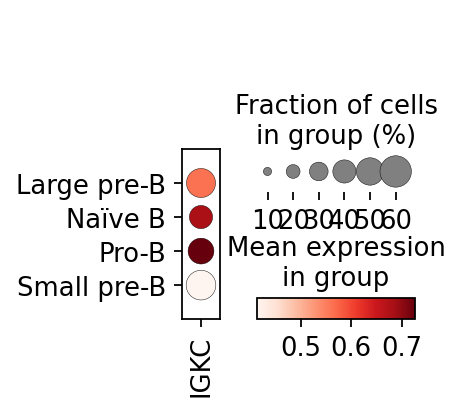

In [23]:
sc.pl.dotplot(adata,['IGKC'],groupby='Last_cell_type')

In [24]:

IGKJreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGKJ.txt',sep='\t',header=0)
IGKJreallist=IGKJreallist.rename(columns={'IMGT gene name': 'IGKJ',1:'locus'})
IGKJreallist
IGKJrealistvalues=IGKJreallist['IGKJ'].values.tolist()
IGKJrealistvalues

['IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5']

In [25]:

IGLJreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLJ.txt',sep='\t',header=0)
IGLJreallist=IGLJreallist.rename(columns={'IMGT gene name': 'IGLJ',1:'locus'})
IGLJreallist
IGLJrealistvalues=IGLJreallist['IGLJ'].values.tolist()
IGLJrealistvalues

['IGLJ1',
 'IGLC1',
 'IGLJ2',
 'IGLC2',
 'IGLJ3',
 'IGLC3',
 'IGLJ4',
 'IGLC4',
 'IGLJ5',
 'IGLC5',
 'IGLJ6',
 'IGLC6',
 'IGLJ7',
 'IGLC7']

In [26]:

IGLreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGLV.txt',sep='\t',header=0)
IGLreallist=IGLreallist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGLreallist
IGLrealistvalues=IGLreallist['IGLK'].values.tolist()
IGLrealistvalues

['BCRP2 (BCRL2)',
 'IGLV(I)-70',
 'IGLV4-69',
 'IGLV(I)-68',
 'IGLV10-67',
 'IGLV(IV)-66-1',
 'IGLV(V)-66',
 'IGLV(IV)-65',
 'IGLV(IV)-64',
 'IGLV(I)-63',
 'IGLV1-62',
 'IGLV8-61',
 'IGLV4-60',
 'IGLV(IV)-59',
 'IGLV(V)-58',
 'BMP6P1 (TGFb1)',
 'IGLV6-57',
 'IGLV(I)-56',
 'IGLV11-55',
 'IGLV10-54',
 'IGLV(IV)-53',
 'VPREB',
 'IGLV5-52',
 'IGLV1-51',
 'IGLV1-50',
 'IGLV9-49',
 'IGLV5-48',
 'IGLV1-47',
 'IGLV7-46',
 'IGLV5-45',
 'IGLV1-44',
 'IGLV7-43',
 'IGLV(I)-42',
 'IGLV(VII)-41-1',
 'IGLV1-41',
 'IGLV1-40',
 'IGLV5-39',
 'IGLV(I)-38',
 'IGLV5-37',
 'IGLV1-36',
 'IGLV7-35',
 "ZNF280B (5'0Y11.1)",
 "ZNF280A (3'0Y11.1)",
 'PRAME',
 'IGLV2-34',
 'IGLV2-33',
 'IGLV3-32',
 'IGLV3-31',
 'IGLV3-30',
 'BCRP4 (BCRL4)',
 'POM121L1P (POM121)',
 'GGTLC2 (GGT)',
 '(GGT-tel)',
 'IGLV3-29',
 'IGLV2-28',
 'IGLV3-27',
 'IGLV3-26',
 'IGLV(VI)-25-1',
 'IGLV3-25',
 'IGLV3-24',
 'IGLV2-23',
 'IGLV(VI)-22-1',
 'IGLV3-22',
 'IGLV3-21',
 'IGLV(I)-20',
 'IGLV3-19',
 'IGLV2-18',
 'IGLV3-17',
 'IGLV3-16',
 'IG

In [27]:
IGLreallist.head()

IGLK  IMGT gene order
0  BCRP2 (BCRL2)                1
1     IGLV(I)-70                2
2       IGLV4-69                3
3     IGLV(I)-68                4
4      IGLV10-67                5

In [28]:

IGKreallist=pd.read_csv('/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRgene/IGKV.txt',sep='\t',header=0)
IGKreallist=IGKreallist.rename(columns={'IMGT gene name': 'IGLK',1:'locus'})
IGKreallist


IGLK  IMGT gene order
0   IGKV1-NL1                0
1    IGKV3D-7                1
2    IGKV1D-8                2
3   IGKV1D-43                3
4   IGKV1D-42                4
..        ...              ...
72    IGKV1-5               72
73    IGKV2-4               73
74    IGKV7-3               74
75    IGKV5-2               75
76    IGKV4-1               76

[77 rows x 2 columns]

In [29]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def calculate_BCRVDJ_heatmap(input_adata, input_TRBVlist_values, input_IR='IR_VDJ_1_v_call', input_cell_type=['Naïve B'], input_adjusted_id='T10.P25'):
    selected_adata = input_adata[input_adata.obs['Last_cell_type'].isin(input_cell_type)]
    selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')
    
    BCR_chain_data = None
    selected_ct = sorted(selected_adata.obs['Organ_cell_type'].unique())
    input_dict = {
       input_IR : input_TRBVlist_values}
    
    for dict_name in list(input_dict.keys()):
        intermediate_df = pd.DataFrame(columns = input_dict[dict_name],  index = selected_ct)
        
        for cell in intermediate_df.index:
            counter = Counter(selected_adata.obs.loc[selected_adata.obs['Organ_cell_type'] == cell, dict_name])
            for chain_type in intermediate_df.columns:
                intermediate_df.loc[cell, chain_type] = counter[chain_type]
            
            intermediate_df.loc[cell, :] = intermediate_df.loc[cell, :] / np.sum(intermediate_df.loc[cell, :]) * 100
        
        if BCR_chain_data is None:
            BCR_chain_data = intermediate_df.copy()
        else:
            BCR_chain_data = pd.concat([BCR_chain_data, intermediate_df], axis=1)
    
    fig, ax = plt.subplots(figsize=(BCR_chain_data.shape[1]/2, BCR_chain_data.shape[0]/2))
    uniform_data = BCR_chain_data.astype('float')
    ax = sb.heatmap(uniform_data, cmap='RdYlBu_r', yticklabels=True)
    _, xlabels = plt.xticks()
    _, ylabels = plt.yticks()
    ax.set_xticklabels(xlabels, size=20, rotation=90)
    ax.set_yticklabels(ylabels, size=20, rotation=0)
    
    return BCR_chain_data, fig

In [30]:

IGHlistvalues=IGHlist['IGH'].values.tolist()
IGKlistvalues=IGKlist['IGLK'].values.tolist()
IGKrealistvalues=IGKreallist['IGLK'].values.tolist()
IGHDgenelist=IGHDlist['IGH'].values.tolist()

In [31]:
IGHDgenelist

['IGHD1-1',
 'IGHD2-2',
 'IGHD3-3',
 'IGHD4-4',
 'IGHD5-5',
 'IGHD6-6',
 'IGHD1-7',
 'IGHD2-8',
 'IGHD3-9',
 'IGHD3-10',
 'IGHD4-11',
 'IGHD5-12',
 'IGHD6-13',
 'IGHD1-14',
 'IGHD2-15',
 'IGHD3-16',
 'IGHD4-17',
 'IGHD5-18',
 'IGHD6-19',
 'IGHD1-20',
 'IGHD2-21',
 'IGHD3-22',
 'IGHD4-23',
 'IGHD5-24',
 'IGHD6-25',
 'IGHD1-26',
 'IGHJ1P',
 'IGHD7-27']

In [32]:
# adata_noT10.obs['AdjustedID'].value_counts()

In [33]:
adata_noT10=adata[~adata.obs['AdjustedID'].str.contains('T10')]
adata_noT10

View of AnnData object with n_obs × n_vars = 31493 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [34]:
adata_noT10.obs["Last_cell_type2"]=adata_noT10.obs["Last_cell_type"]

/tmp/ipykernel_59866/3239168771.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_noT10.obs["Last_cell_type2"]=adata_noT10.obs["Last_cell_type"]


In [35]:
adata_noT10.obs["Last_cell_type"]=adata_noT10.obs["Last_cell_type"].str.replace('CXCR5\\+ ', '').str.replace('CXCR5\\- ', '')

In [36]:
adata_noT10.obs["Last_cell_type"]

Cellname
Z48_AAACCTGAGATAGGAG-1     Naïve B
Z48_AAATGCCCATATACGC-1     Naïve B
Z48_AACTGGTGTCCATGAT-1     Naïve B
Z48_ACAGCTACACATGGGA-1     Naïve B
Z48_ACATACGCACTCTGTC-1     Naïve B
                            ...   
Z123_TTTGCGCTCTTAGAGC-1    Naïve B
Z123_TTTGTCAAGTACACCT-1    Naïve B
Z123_TTTGTCAGTTTGTTGG-1    Naïve B
Z123_TTTGTCATCCTAGAAC-1    Naïve B
Z123_TTTGTCATCTCCCTGA-1    Naïve B
Name: Last_cell_type, Length: 31493, dtype: object

In [37]:
# IGHlistvalues

/tmp/ipykernel_59866/2105992685.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')


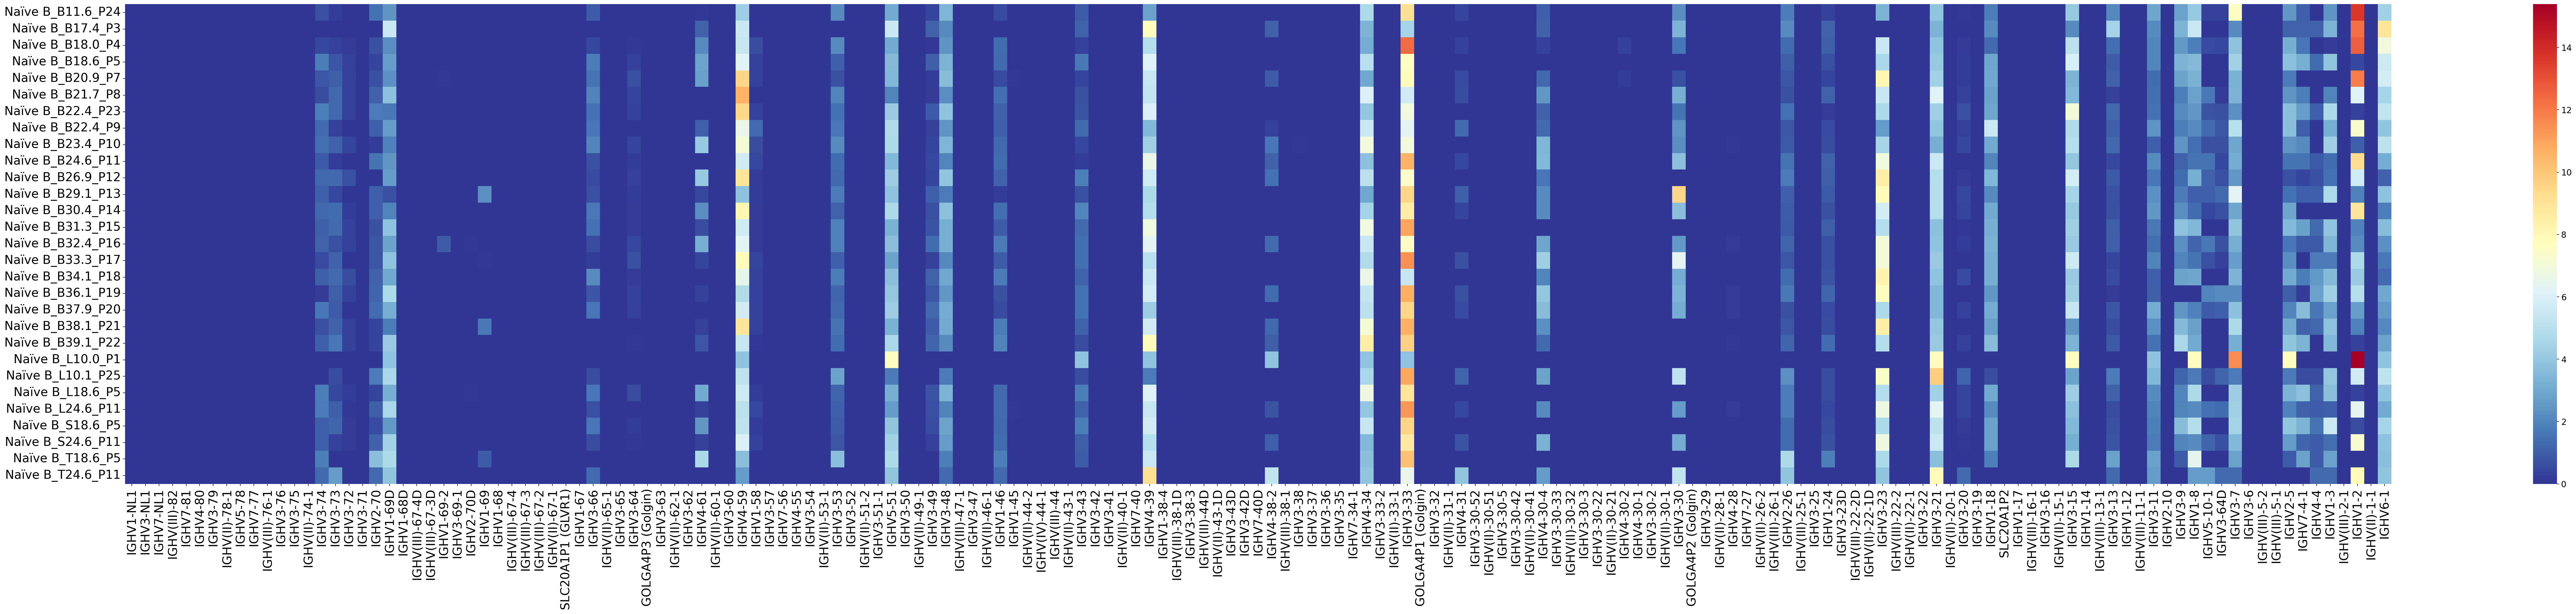

In [38]:
BCRH_chain, BCRHfig = calculate_BCRVDJ_heatmap(adata_noT10,IGHlistvalues ,input_IR='IR_VDJ_1_v_call',input_cell_type=['Naïve B'])

In [39]:
BCRH_chain.index

Index(['Naïve B_B11.6_P24', 'Naïve B_B17.4_P3', 'Naïve B_B18.0_P4',
       'Naïve B_B18.6_P5', 'Naïve B_B20.9_P7', 'Naïve B_B21.7_P8',
       'Naïve B_B22.4_P23', 'Naïve B_B22.4_P9', 'Naïve B_B23.4_P10',
       'Naïve B_B24.6_P11', 'Naïve B_B26.9_P12', 'Naïve B_B29.1_P13',
       'Naïve B_B30.4_P14', 'Naïve B_B31.3_P15', 'Naïve B_B32.4_P16',
       'Naïve B_B33.3_P17', 'Naïve B_B34.1_P18', 'Naïve B_B36.1_P19',
       'Naïve B_B37.9_P20', 'Naïve B_B38.1_P21', 'Naïve B_B39.1_P22',
       'Naïve B_L10.0_P1', 'Naïve B_L10.1_P25', 'Naïve B_L18.6_P5',
       'Naïve B_L24.6_P11', 'Naïve B_S18.6_P5', 'Naïve B_S24.6_P11',
       'Naïve B_T18.6_P5', 'Naïve B_T24.6_P11'],
      dtype='object')

In [40]:
adata_select=adata
v_call_B_VDJ_main_list = list(adata_select.obs['v_call_B_VDJ_main'].cat.categories)
d_call_B_VDJ_main_list = list(adata_select.obs['d_call_B_VDJ_main'].cat.categories)
j_call_B_VDJ_main_list = list(adata_select.obs['j_call_B_VDJ_main'].cat.categories)
v_call_B_VJ_main_list = list(adata_select.obs['v_call_B_VJ_main'].cat.categories)
j_call_B_VJ_main_list = list(adata_select.obs['j_call_B_VJ_main'].cat.categories)
TCR_list = v_call_B_VJ_main_list+j_call_B_VJ_main_list+v_call_B_VDJ_main_list +d_call_B_VDJ_main_list +j_call_B_VDJ_main_list 

In [41]:
# v_call_B_VDJ_main_list

In [42]:

set_v_call = set(v_call_B_VDJ_main_list)
set_IGH = set(IGHlistvalues)

difference_v_call = set_v_call.difference(set_IGH)
difference_IGH = set_IGH.difference(set_v_call)

print("Elements in v_call_B_VDJ_main_list but not in IGHlistvalues: ", len(difference_v_call))
print("Elements in IGHlistvalues but not in v_call_B_VDJ_main_list: ", len(difference_IGH))

Elements in v_call_B_VDJ_main_list but not in IGHlistvalues:  0
Elements in IGHlistvalues but not in v_call_B_VDJ_main_list:  117


In [43]:

set_v_call = set(v_call_B_VJ_main_list)
set_IGLK = set(IGKlistvalues)

difference_vj_call = set_v_call.difference(set_IGLK)
difference_IGLK = set_IGH.difference(set_v_call)

print("Elements in v_call_B_VJ_main_list but not in IGHlistvalues: ",difference_vj_call, len(difference_vj_call))
print("Elements in IGLKistvalues but not in v_call_B_VDJ_main_list: ", len(difference_IGLK))

Elements in v_call_B_VJ_main_list but not in IGHlistvalues:  {'IGKV1/OR2-108', 'IGKV3/OR2-268'} 2
Elements in IGLKistvalues but not in v_call_B_VDJ_main_list:  167


In [44]:
print(len(v_call_B_VDJ_main_list))
print(len(IGHlistvalues))

50
167


In [45]:
adata_noT10.obs["d_call_B_VDJ_main"]

Cellname
Z48_AAACCTGAGATAGGAG-1         None
Z48_AAATGCCCATATACGC-1     IGHD6-13
Z48_AACTGGTGTCCATGAT-1         None
Z48_ACAGCTACACATGGGA-1         None
Z48_ACATACGCACTCTGTC-1         None
                             ...   
Z123_TTTGCGCTCTTAGAGC-1     IGHD1-7
Z123_TTTGTCAAGTACACCT-1        None
Z123_TTTGTCAGTTTGTTGG-1        None
Z123_TTTGTCATCCTAGAAC-1        None
Z123_TTTGTCATCTCCCTGA-1        None
Name: d_call_B_VDJ_main, Length: 31493, dtype: category
Categories (27, object): ['IGHD1-1', 'IGHD1-7', 'IGHD1-20', 'IGHD1-26', ..., 'IGHD6-19', 'IGHD6-25', 'IGHD7-27', 'None']

In [46]:
# BCRHD_chain, BCRHDfigL = calculate_BCRVDJ_heatmap(adata_noT10, IGHDlist ,input_IR="d_call_B_VDJ_main",input_cell_type=['Naïve B'])

/tmp/ipykernel_59866/2105992685.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')


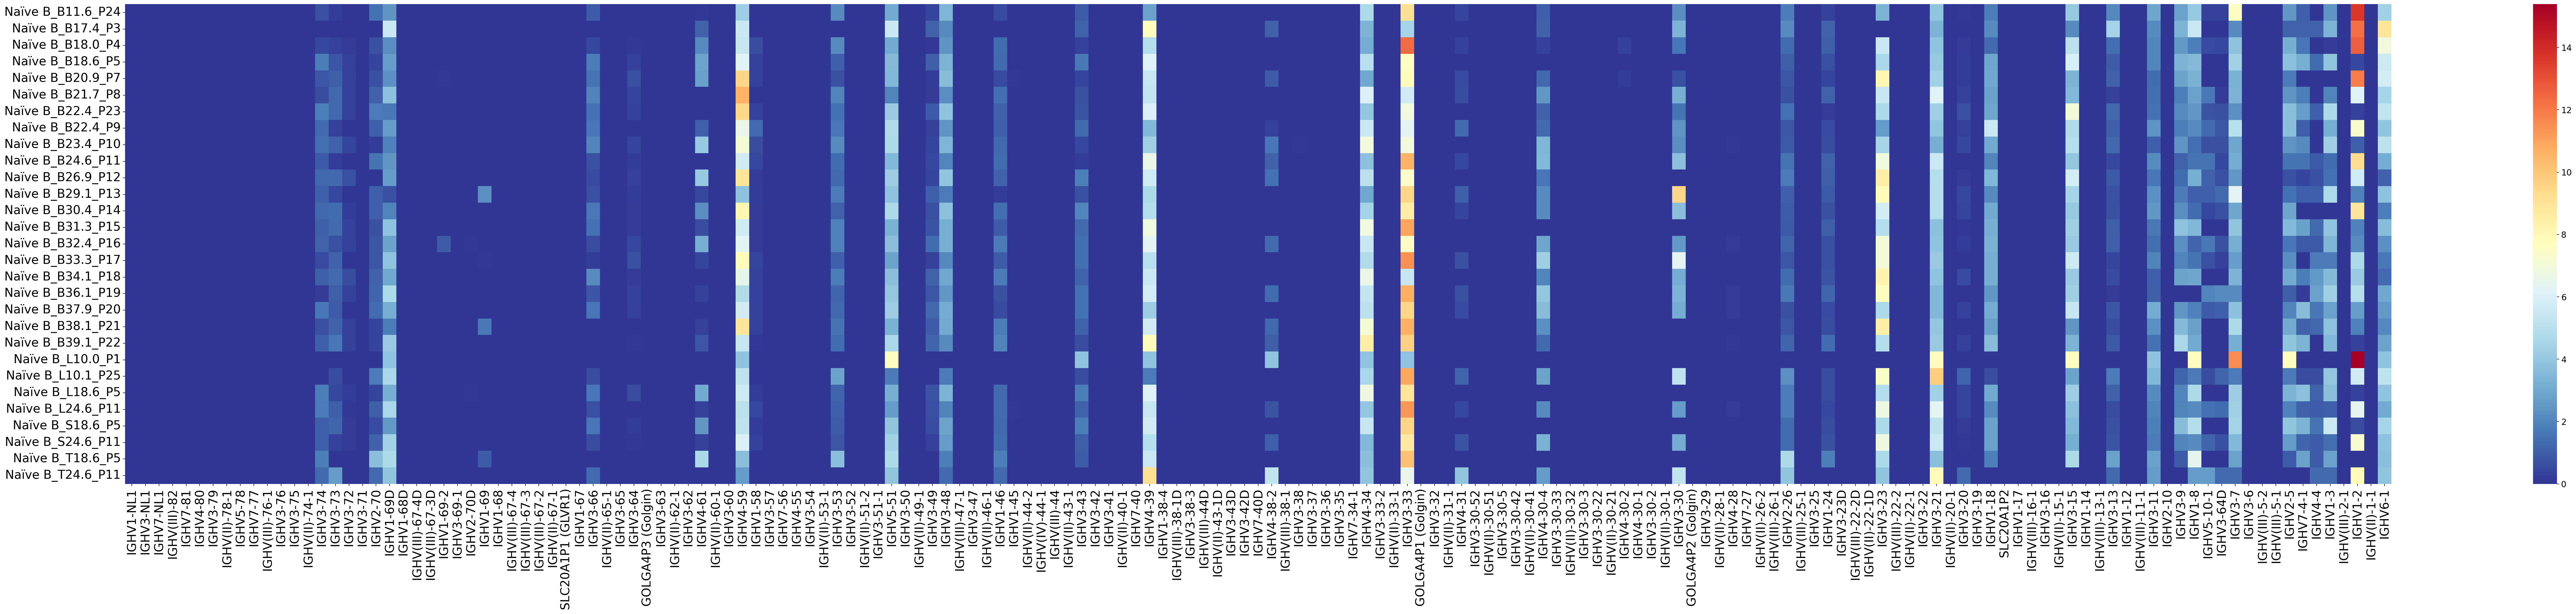

In [47]:
BCRH_chain, BCRHfigL = calculate_BCRVDJ_heatmap(adata_noT10, IGHlistvalues ,input_IR='IR_VDJ_1_v_call',input_cell_type=['Naïve B'])

In [48]:
BCRH_chainlong=BCRH_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRH_chainlong

Sample   variable     value
0     Naïve B_B11.6_P24  IGHV1-NL1       0.0
1      Naïve B_B17.4_P3  IGHV1-NL1       0.0
2      Naïve B_B18.0_P4  IGHV1-NL1       0.0
3      Naïve B_B18.6_P5  IGHV1-NL1       0.0
4      Naïve B_B20.9_P7  IGHV1-NL1       0.0
...                 ...        ...       ...
4838  Naïve B_L24.6_P11    IGHV6-1  3.046014
4839   Naïve B_S18.6_P5    IGHV6-1   4.49268
4840  Naïve B_S24.6_P11    IGHV6-1  3.786906
4841   Naïve B_T18.6_P5    IGHV6-1  3.703704
4842  Naïve B_T24.6_P11    IGHV6-1  3.947368

[4843 rows x 3 columns]

In [49]:
# %%R
# library(ggplot2)
# library(dplyr)
# library(RColorBrewer )
# BCRH=BCRH_chainlong
# BCRH$variable<-factor(BCRH$variable,level=IGHlistvalues)

# library(dplyr)

# # BCRH$Sample<-factor(BCRH$Sample,level=rev(sort(unique(BCRH$Sample))))
# # BCRH$Sample
# BCRH_chainlong$Sample[1:10]

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "value". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


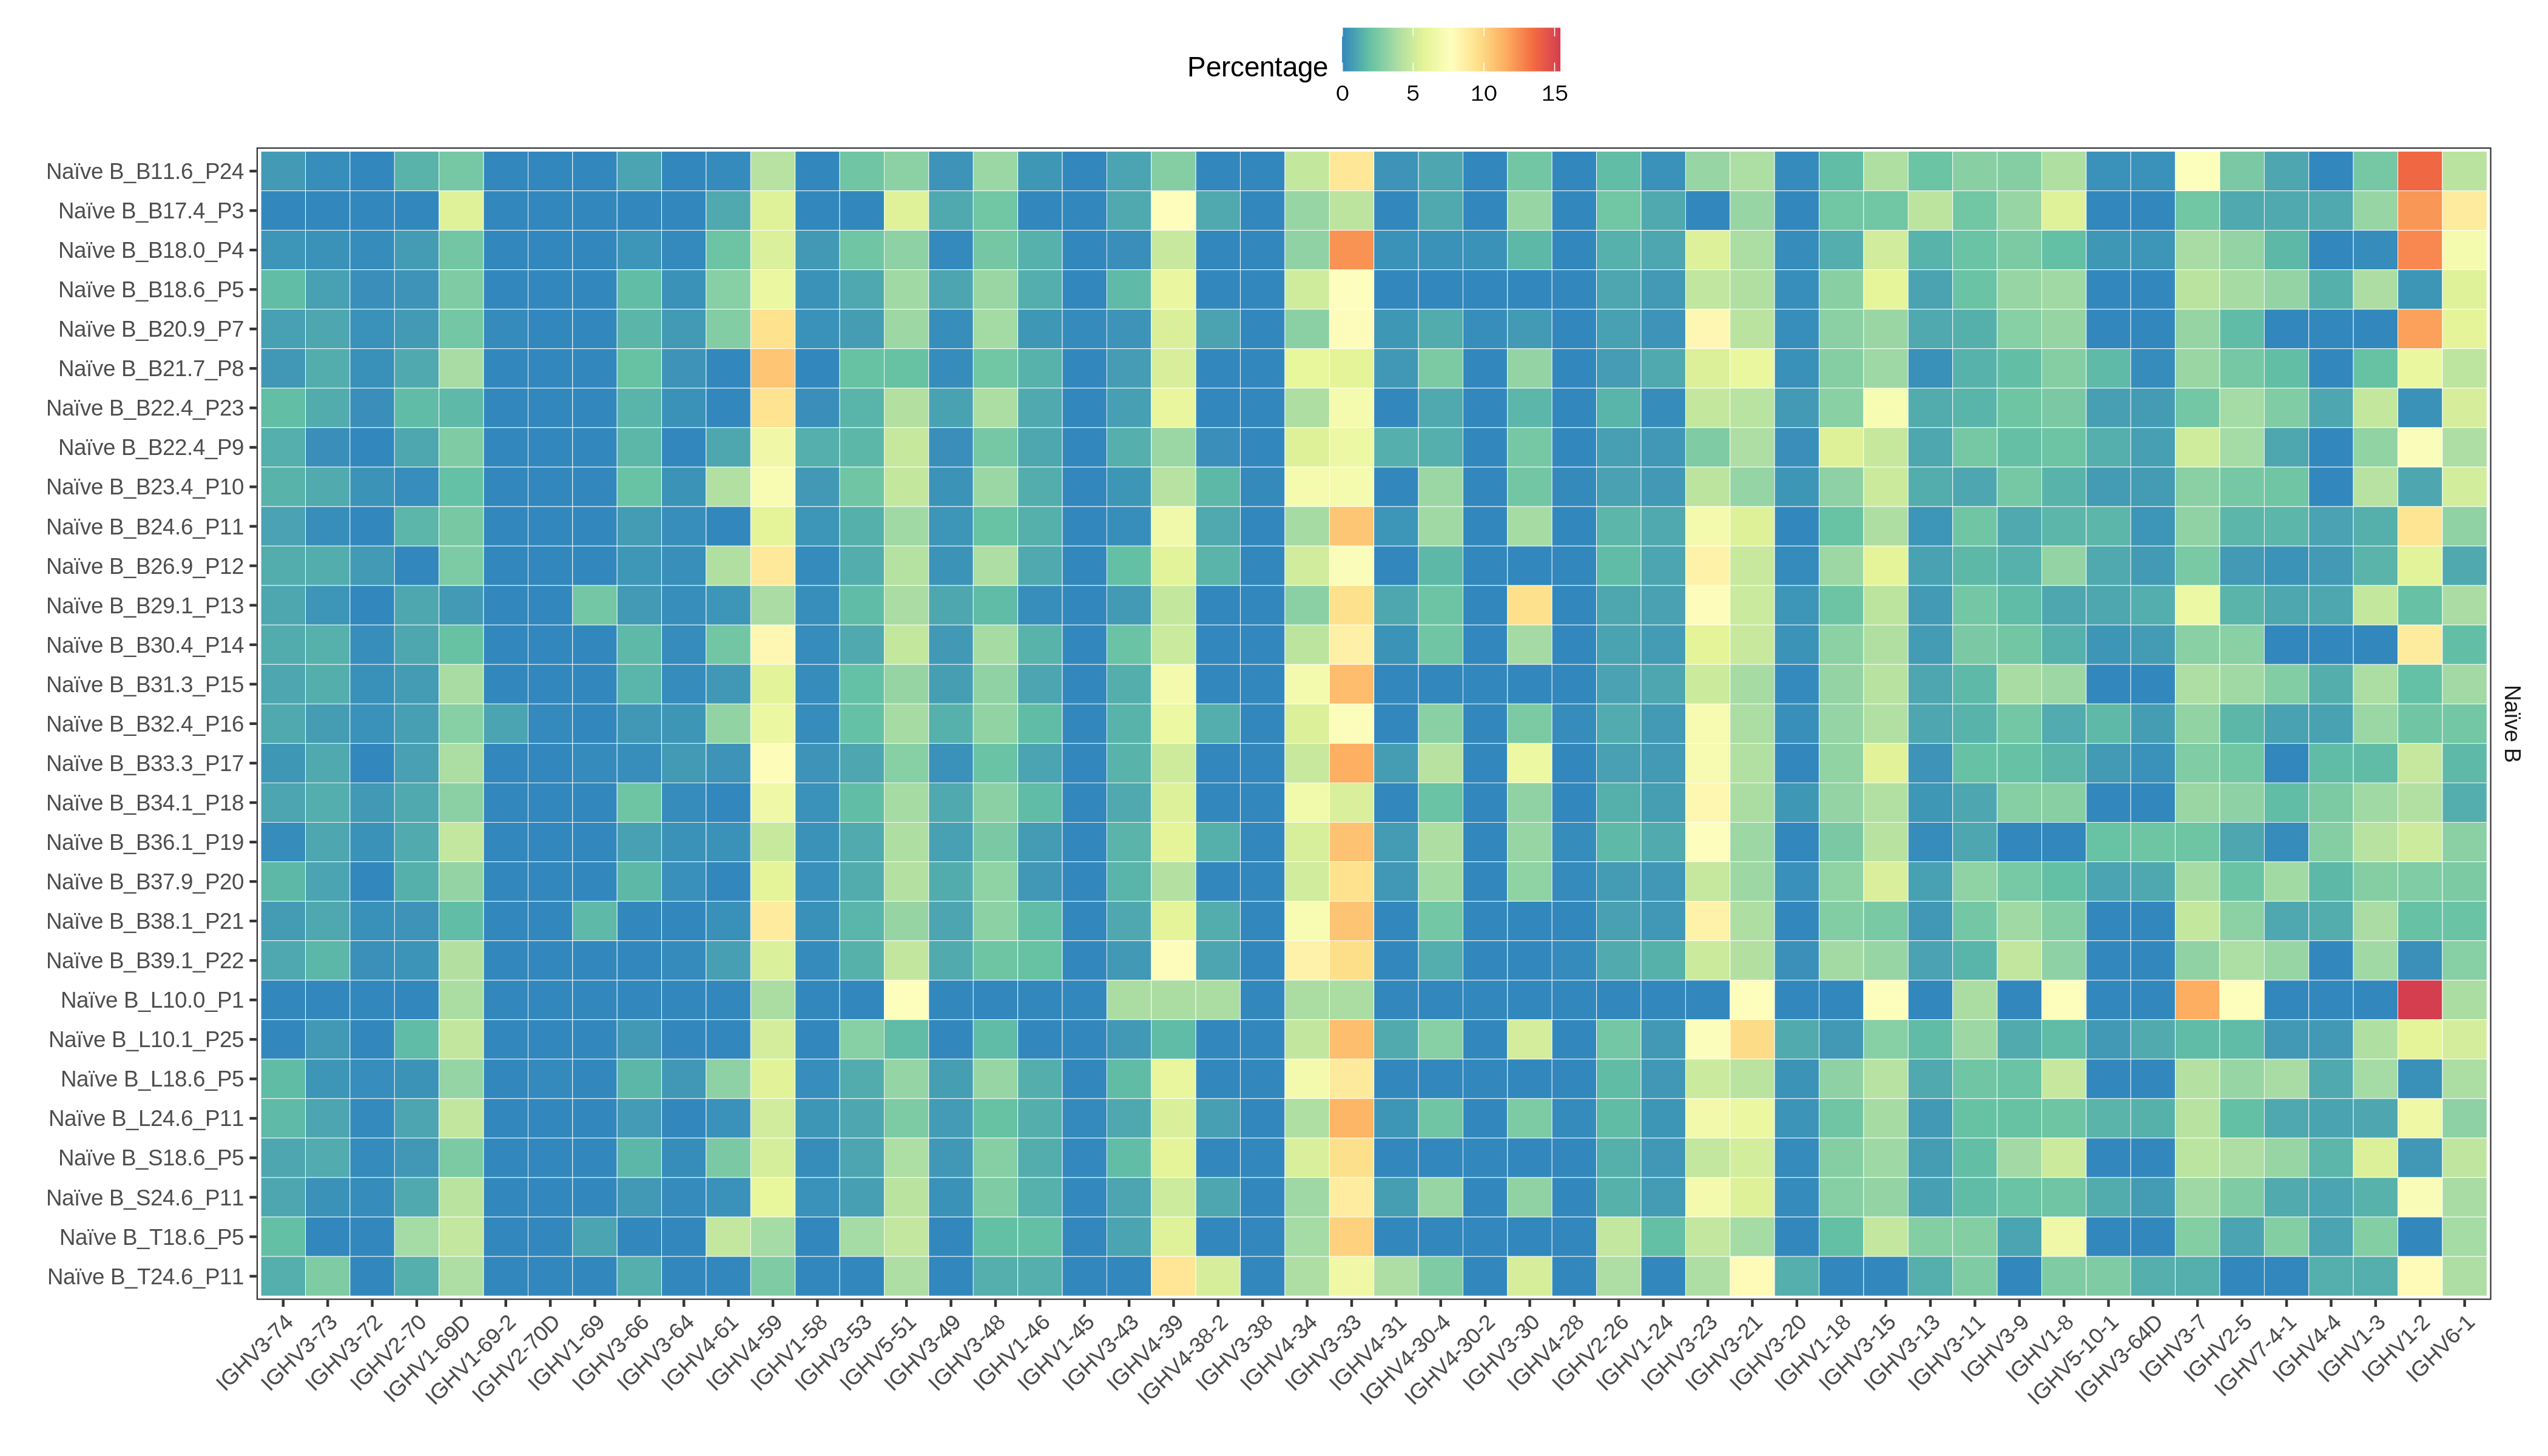

In [50]:
%%R  -w 4200 -h 2400 -r 300 -i BCRH_chainlong -i IGHlistvalues 
library(ggplot2)
library(dplyr)
library(RColorBrewer )
library(ComplexHeatmap)
BCRH=BCRH_chainlong
BCRH$variable<-factor(BCRH$variable,level=IGHlistvalues)

library(dplyr)



split_BCRH<- strsplit(BCRH$Sample, "_")


BCRH$CellType <- sapply(split_BCRH, "[", 1)
BCRH$AdjusteID<- sapply(split_BCRH, "[", 2)

BCRH$Organ <- substr(BCRH$AdjusteID, 1, 1)
BCRH$Sample<-factor(BCRH$Sample,level=rev(sort(unique(BCRH$Sample))))
BCRH2 <- BCRH %>% group_by(variable) %>% filter(sum(as.numeric(value) )!= 0) %>%ungroup()


BCRH2$CellType_Organ <- paste(BCRH2$CellType, BCRH2$Organ, sep = "_")



BCRH_ph=ggplot(BCRH2 )+ 

# geom_tile(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),color='white'))+
geom_tile(aes(x=variable,y= Sample,fill=as.numeric(value)),color='white')+
# facet_grid(CellType~ Organ, space = "free", scales = "free", switch = "y")+
# facet_wrap(~ CellType_Organ, scales = "free", ncol = 2) +
facet_grid( CellType~. , scales = "free", space = "free") +theme_bw()+
 theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
#      axis.text.y = element_blank(),
#          axis.ticks.y = element_blank(),
     panel.grid.major = element_blank(),
    strip.background = element_blank(),
    strip.placement = "",  # place facet labels outside the plot area
    strip.text.y.left = element_text(angle = 90),legend.position='top') +labs(fill = "Percentage")+

  xlab('') + ylab('')+scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))
# scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))

BCRH_ph

In [51]:
# %%R
# wide_data <- spread(BCRH2, variable, value)
# rownames(wide_data) <- wide_data$Sample
# wide_data$Sample <- NULL 
# dim(wide_data)
# wide_data[,-c(1:5)]


In [52]:
# %%R
# annotations <- BCRH2 %>% 
#   select(Sample, CellType, Organ) %>% 
#   distinct() %>% 
#   column_to_rownames("Sample")
# dim(annotations )
# mat <- as.matrix(wide_data[,-c(1:5)])
# dim(mat)

In [53]:
BCRH_chainlong.Sample.unique()

array(['Naïve B_B11.6_P24', 'Naïve B_B17.4_P3', 'Naïve B_B18.0_P4',
       'Naïve B_B18.6_P5', 'Naïve B_B20.9_P7', 'Naïve B_B21.7_P8',
       'Naïve B_B22.4_P23', 'Naïve B_B22.4_P9', 'Naïve B_B23.4_P10',
       'Naïve B_B24.6_P11', 'Naïve B_B26.9_P12', 'Naïve B_B29.1_P13',
       'Naïve B_B30.4_P14', 'Naïve B_B31.3_P15', 'Naïve B_B32.4_P16',
       'Naïve B_B33.3_P17', 'Naïve B_B34.1_P18', 'Naïve B_B36.1_P19',
       'Naïve B_B37.9_P20', 'Naïve B_B38.1_P21', 'Naïve B_B39.1_P22',
       'Naïve B_L10.0_P1', 'Naïve B_L10.1_P25', 'Naïve B_L18.6_P5',
       'Naïve B_L24.6_P11', 'Naïve B_S18.6_P5', 'Naïve B_S24.6_P11',
       'Naïve B_T18.6_P5', 'Naïve B_T24.6_P11'], dtype=object)

In [54]:
IGHlistvalues

['IGHV1-NL1',
 'IGHV3-NL1',
 'IGHV7-NL1',
 'IGHV(III)-82',
 'IGHV7-81',
 'IGHV4-80',
 'IGHV3-79',
 'IGHV(II)-78-1',
 'IGHV5-78',
 'IGHV7-77',
 'IGHV(III)-76-1',
 'IGHV3-76',
 'IGHV3-75',
 'IGHV(II)-74-1',
 'IGHV3-74',
 'IGHV3-73',
 'IGHV3-72',
 'IGHV3-71',
 'IGHV2-70',
 'IGHV1-69D',
 'IGHV1-68D',
 'IGHV(III)-67-4D',
 'IGHV(III)-67-3D',
 'IGHV1-69-2',
 'IGHV3-69-1',
 'IGHV2-70D',
 'IGHV1-69',
 'IGHV1-68',
 'IGHV(III)-67-4',
 'IGHV(III)-67-3',
 'IGHV(III)-67-2',
 'IGHV(II)-67-1',
 'SLC20A1P1 (GLVR1)',
 'IGHV1-67',
 'IGHV3-66',
 'IGHV(II)-65-1',
 'IGHV3-65',
 'IGHV3-64',
 'GOLGA4P3 (Golgin)',
 'IGHV3-63',
 'IGHV(II)-62-1',
 'IGHV3-62',
 'IGHV4-61',
 'IGHV(II)-60-1',
 'IGHV3-60',
 'IGHV4-59',
 'IGHV1-58',
 'IGHV3-57',
 'IGHV7-56',
 'IGHV4-55',
 'IGHV3-54',
 'IGHV(II)-53-1',
 'IGHV3-53',
 'IGHV3-52',
 'IGHV(II)-51-2',
 'IGHV3-51-1',
 'IGHV5-51',
 'IGHV3-50',
 'IGHV(II)-49-1',
 'IGHV3-49',
 'IGHV3-48',
 'IGHV(III)-47-1',
 'IGHV3-47',
 'IGHV(II)-46-1',
 'IGHV1-46',
 'IGHV1-45',
 'IGHV(II)-44-

In [55]:
%%R
Sampleseq=c('CXCR5+ Naïve B_B13.6_P24', 'CXCR5+ Naïve B_B19.4_P3',
       'CXCR5+ Naïve B_B20.0_P4', 'CXCR5+ Naïve B_B20.6_P5',
       'CXCR5+ Naïve B_B22.9_P7', 'CXCR5+ Naïve B_B23.7_P8',
       'CXCR5+ Naïve B_B24.4_P23', 'CXCR5+ Naïve B_B24.4_P9',
       'CXCR5+ Naïve B_B25.4_P10', 'CXCR5+ Naïve B_B26.6_P11',
       'CXCR5+ Naïve B_B28.9_P12', 'CXCR5+ Naïve B_B31.1_P13',
       'CXCR5+ Naïve B_B32.4_P14', 'CXCR5+ Naïve B_B33.3_P15',
       'CXCR5+ Naïve B_B34.4_P16', 'CXCR5+ Naïve B_B35.3_P17',
       'CXCR5+ Naïve B_B36.1_P18', 'CXCR5+ Naïve B_B38.1_P19',
       'CXCR5+ Naïve B_B39.9_P20', 'CXCR5+ Naïve B_B40.1_P21',
       'CXCR5+ Naïve B_B41.1_P22', 'CXCR5+ Naïve B_L12.0_P1',
       'CXCR5+ Naïve B_L12.1_P25', 'CXCR5+ Naïve B_L20.6_P5',
       'CXCR5+ Naïve B_L26.6_P11','CXCR5+ Naïve B_T20.6_P5',
       'CXCR5+ Naïve B_T26.6_P11','CXCR5+ Naïve B_S20.6_P5',
       'CXCR5+ Naïve B_S26.6_P11')

In [56]:
%%R
source("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/BCRheatmap.R")

In [57]:
adata_noT10

AnnData object with n_obs × n_vars = 31493 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR

/tmp/ipykernel_59866/2105992685.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  selected_adata.obs['Organ_cell_type'] = selected_adata.obs['Last_cell_type'].astype('str') + "_" + selected_adata.obs['AdjustedID'].astype('str')


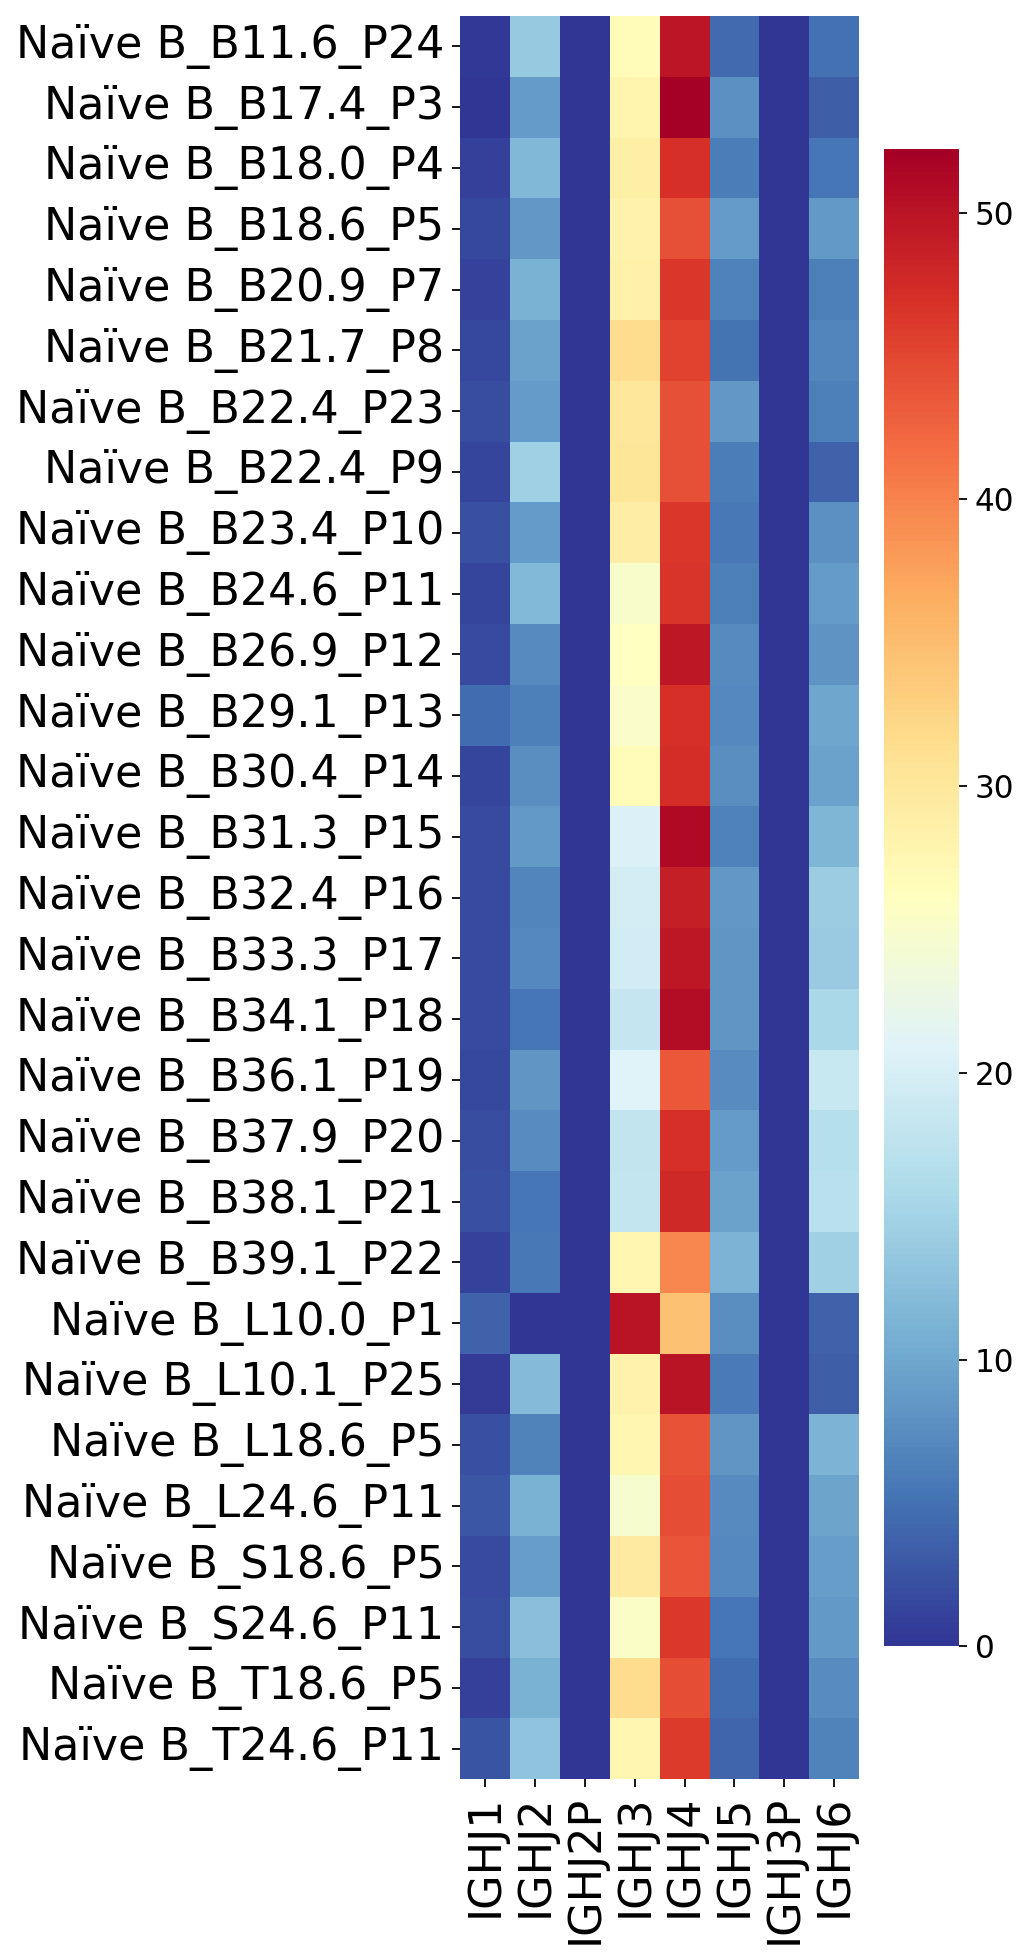

In [58]:
BCRHJ_chain, BCRHfig = calculate_BCRVDJ_heatmap(adata_noT10,IGHJlist,input_IR='j_call_VDJ_main',input_cell_type=['Naïve B'])

In [59]:
BCRHJ_chainlong=BCRHJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRHJ_chainlong

Sample variable     value
0    Naïve B_B11.6_P24    IGHJ1  0.207469
1     Naïve B_B17.4_P3    IGHJ1       0.0
2     Naïve B_B18.0_P4    IGHJ1  1.012658
3     Naïve B_B18.6_P5    IGHJ1  1.629328
4     Naïve B_B20.9_P7    IGHJ1  1.220753
..                 ...      ...       ...
227  Naïve B_L24.6_P11    IGHJ6  9.786131
228   Naïve B_S18.6_P5    IGHJ6  8.985361
229  Naïve B_S24.6_P11    IGHJ6  8.664955
230   Naïve B_T18.6_P5    IGHJ6  7.407407
231  Naïve B_T24.6_P11    IGHJ6  6.578947

[232 rows x 3 columns]

In [60]:
IGHJlist

['IGHJ1', 'IGHJ2', 'IGHJ2P', 'IGHJ3', 'IGHJ4', 'IGHJ5', 'IGHJ3P', 'IGHJ6']

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "value". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


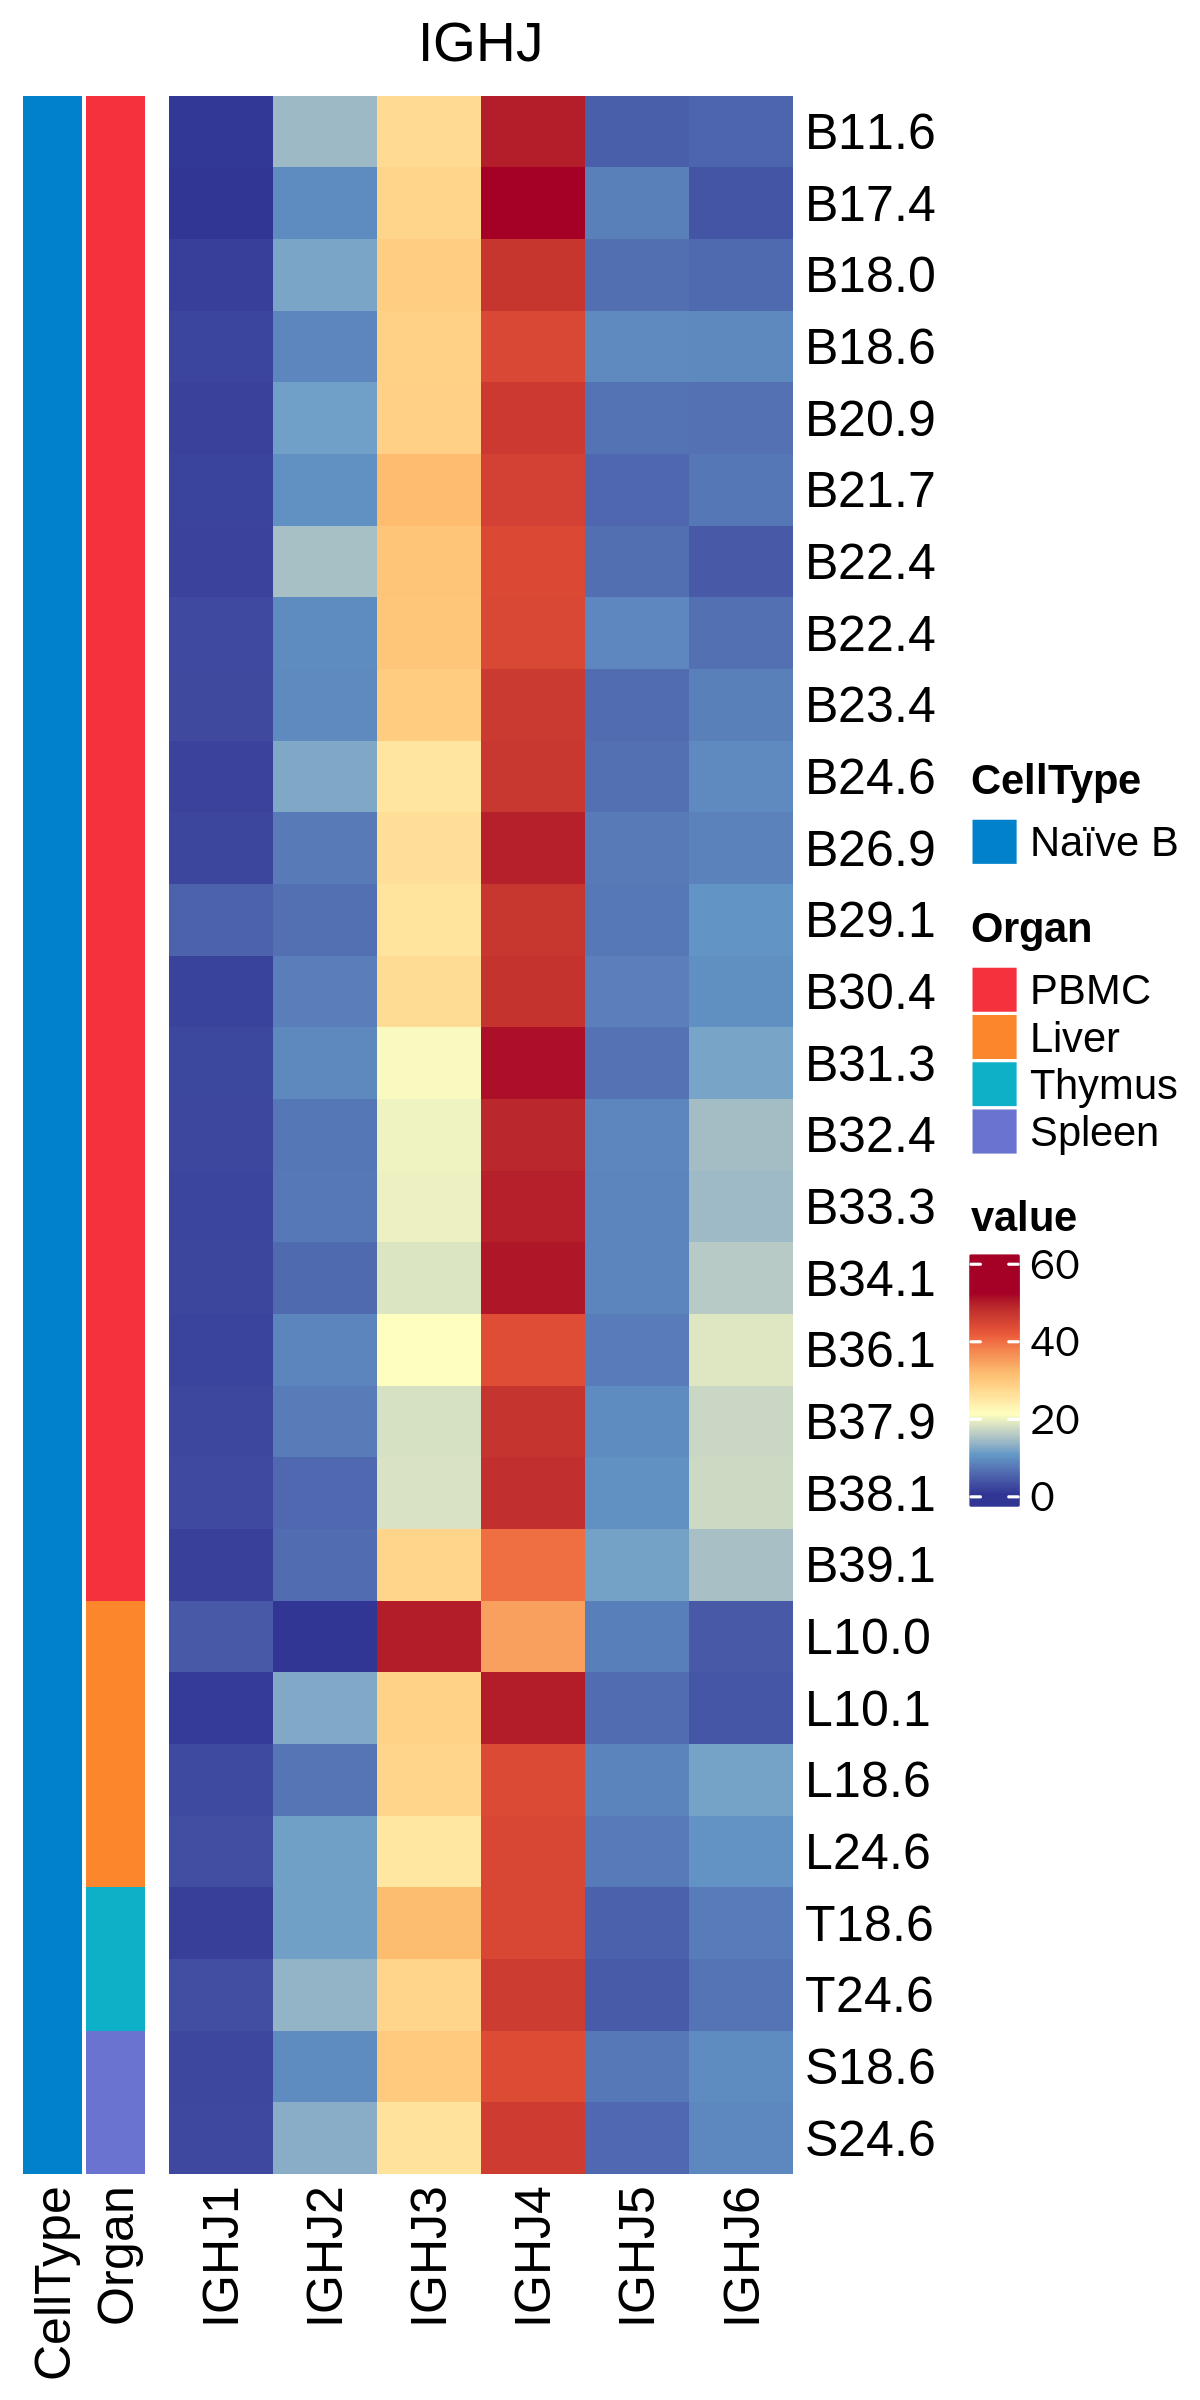

In [61]:
%%R  -w 1200 -h 2400 -r 300 -i BCRHJ_chainlong -i IGHJlist
# BCRH_chainlong$value[which(as.numeric(BCRH_chainlong$value)>=25)] <-  median(BCRH_chainlong$value)
BCRHJheatmap <- BCRTR_heatmap(BCRHJ_chainlong, IGHJlist,titlename='IGHJ')
# print(heatmap)
BCRHJheatmap[[1]]+BCRHJheatmap[[2]]

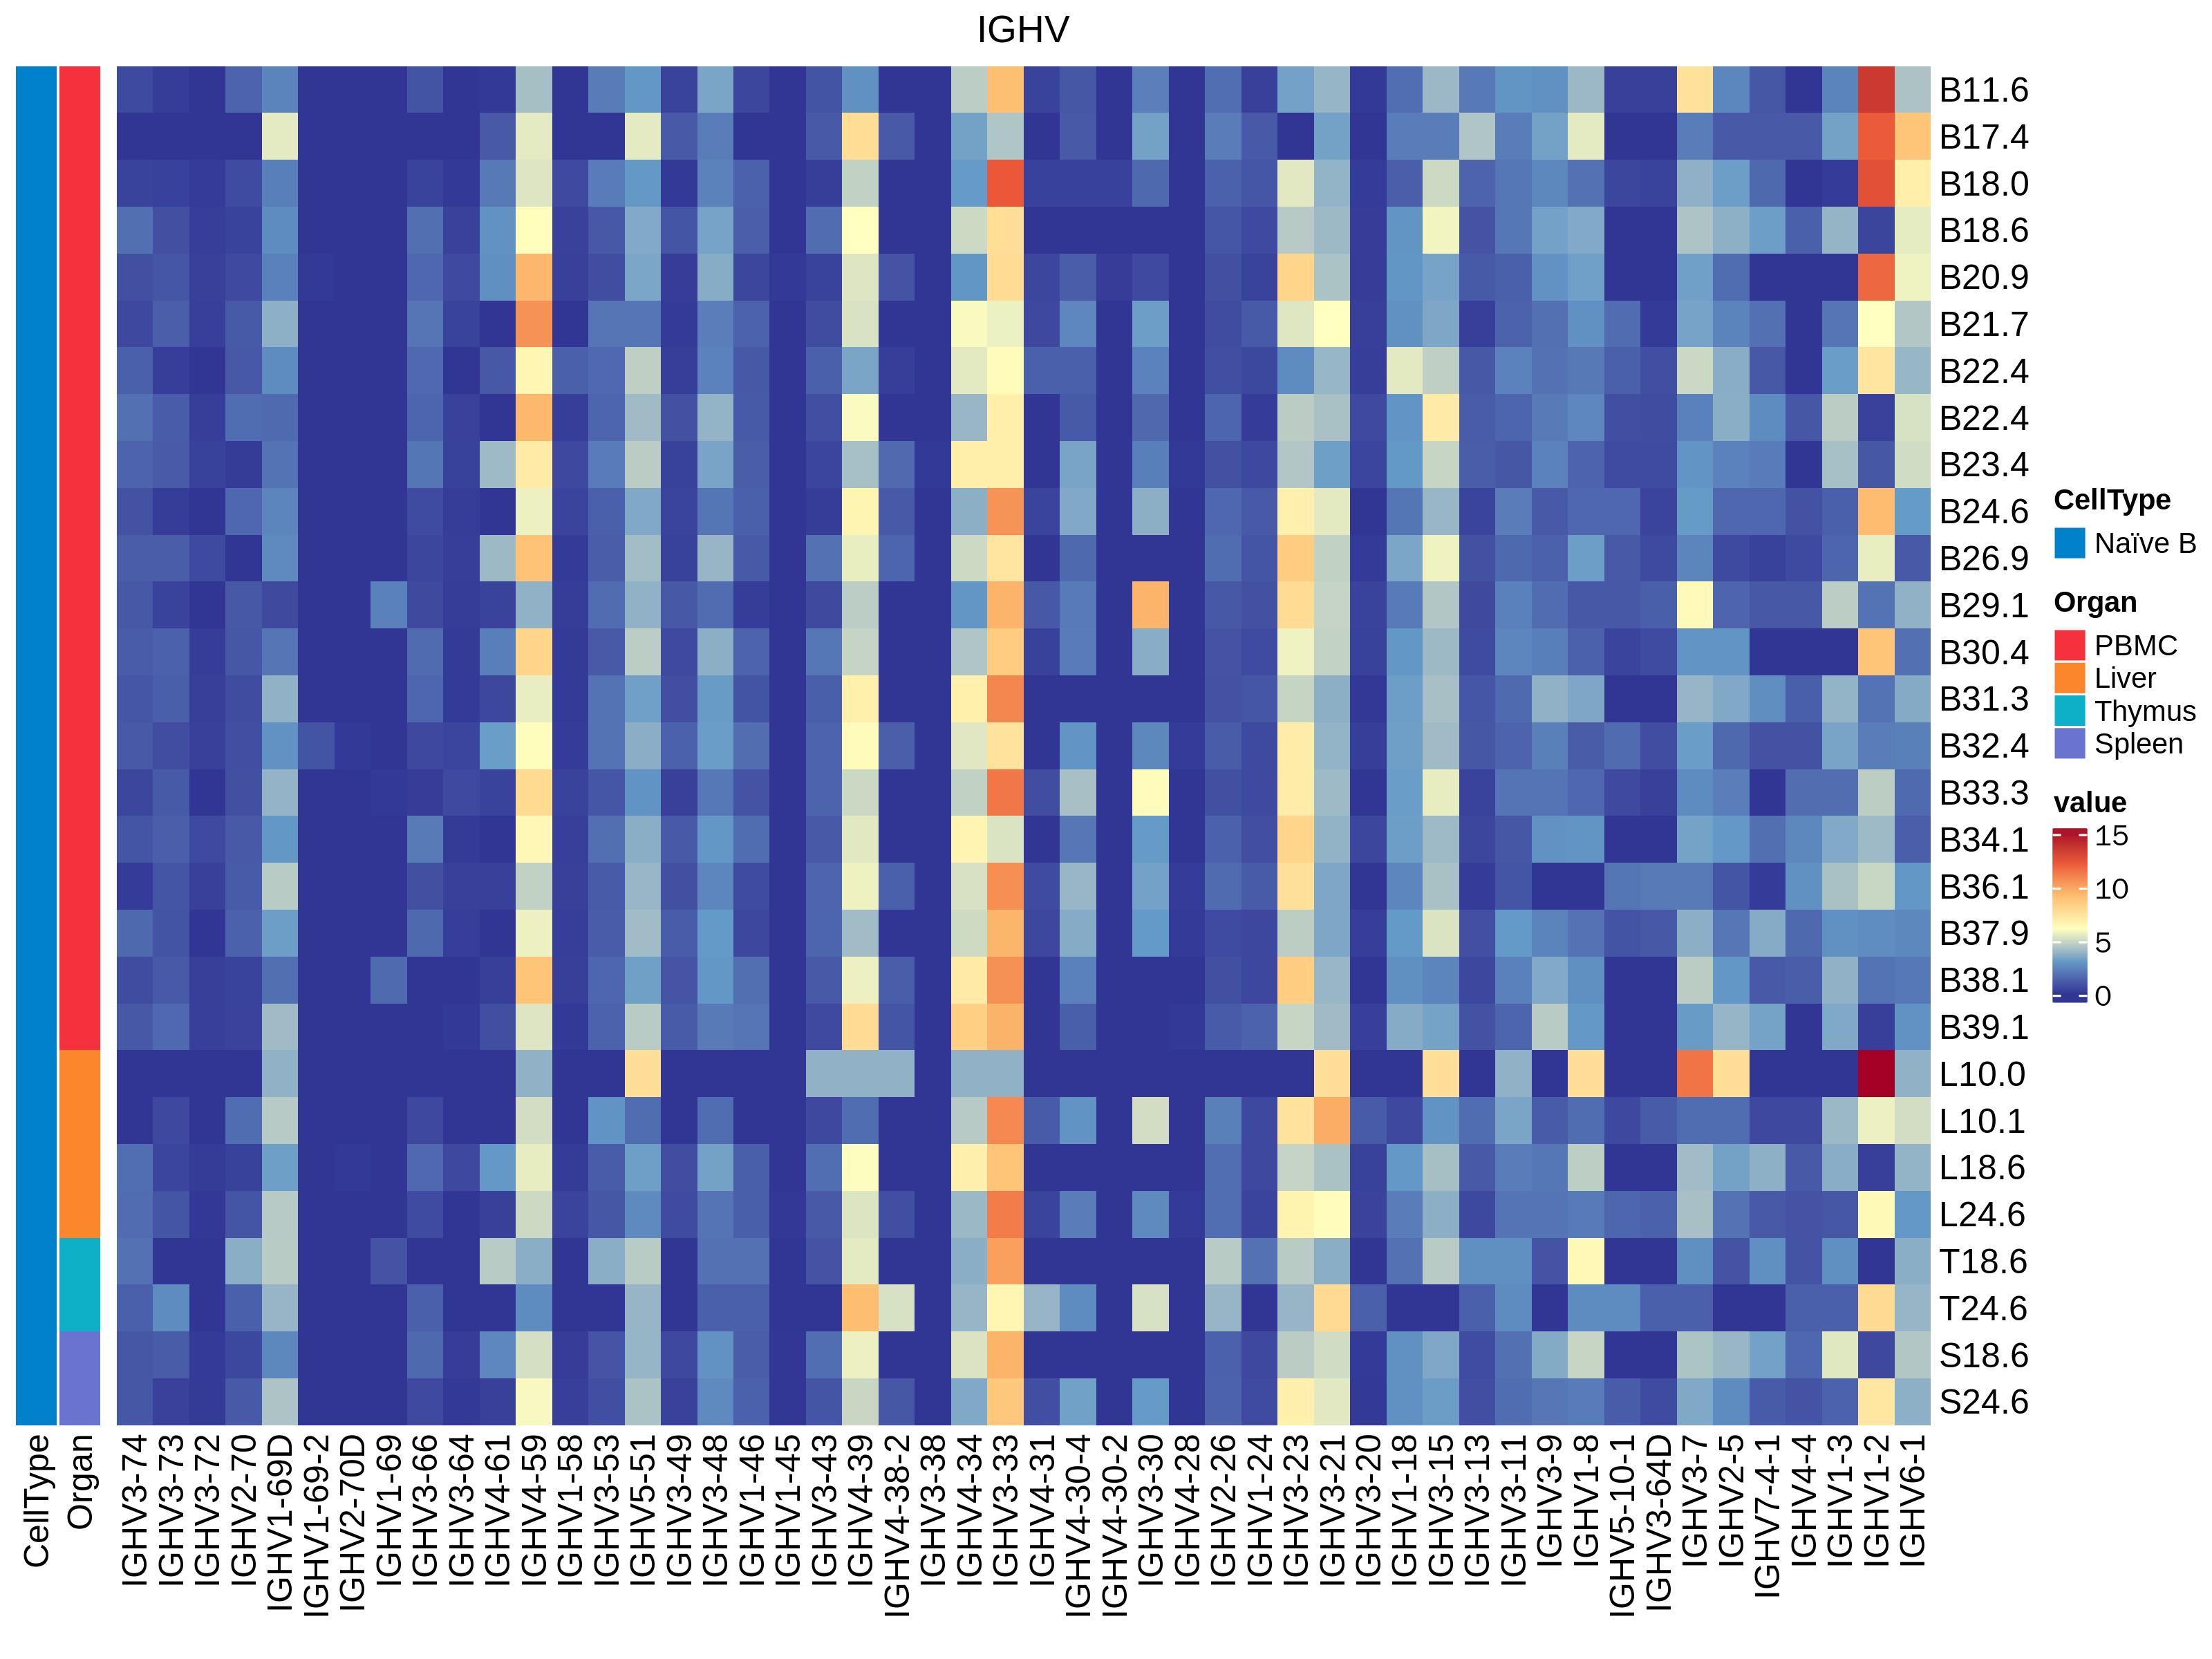

In [62]:
%%R  -w 3200 -h 2400 -r 300 -i BCRH_chainlong -i IGHlistvalues 
BCRH_chainlong$value[which(as.numeric(BCRH_chainlong$value)>=25)] <-  median(BCRH_chainlong$value)
BCRHVheatmap <- BCRTR_heatmap(BCRH_chainlong, IGHlistvalues,titlename='IGHV')
# print(heatmap)
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]

In [63]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGKV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGKV')]

In [64]:
subIGKV.obs.Last_cell_type=subIGKV.obs.Last_cell_type.str.replace('CXCR5\\+ ', '').str.replace('CXCR5\\- ', '')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [65]:
# subIGKV_select

In [66]:
IGKreallist

IGLK  IMGT gene order
0   IGKV1-NL1                0
1    IGKV3D-7                1
2    IGKV1D-8                2
3   IGKV1D-43                3
4   IGKV1D-42                4
..        ...              ...
72    IGKV1-5               72
73    IGKV2-4               73
74    IGKV7-3               74
75    IGKV5-2               75
76    IGKV4-1               76

[77 rows x 2 columns]

In [67]:
# IGKrealistvalues

In [68]:
# subIGKV_select.obs['Last_cell_type'].value_counts()

In [69]:
subIGKV_select=adata[adata.obs['Last_cell_type'].isin(['Naïve B'])]
subIGKV_select

View of AnnData object with n_obs × n_vars = 31367 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [70]:
subIGKV.obs.AdjustedID.value_counts()

S24.6_P11    2212
S18.6_P5     2112
B18.6_P5     1107
B31.3_P15     849
L24.6_P11     826
B34.1_P18     821
B30.4_P14     774
B22.4_P23     660
B32.4_P16     622
B23.4_P10     621
B18.0_P4      584
L18.6_P5      580
B11.6_P24     568
B20.9_P7      498
B33.3_P17     481
B39.1_P22     469
B38.1_P21     429
B26.9_P12     426
B21.7_P8      381
B37.9_P20     381
B36.1_P19     306
B29.1_P13     272
B24.6_P11     243
B22.4_P9      232
L10.1_P25     101
T18.6_P5       56
B17.4_P3       53
T24.6_P11      28
L10.0_P1       13
T10.0_P1        3
T10.1_P25       1
Name: AdjustedID, dtype: int64

In [71]:
adata.obs['d_call_B_VDJ_main']

Cellname
Z48_AAACCTGAGATAGGAG-1         None
Z48_AAATGCCCATATACGC-1     IGHD6-13
Z48_AACTGGTGTCCATGAT-1         None
Z48_ACAGCTACACATGGGA-1         None
Z48_ACATACGCACTCTGTC-1         None
                             ...   
Z123_TTTGCGCTCTTAGAGC-1     IGHD1-7
Z123_TTTGTCAAGTACACCT-1        None
Z123_TTTGTCAGTTTGTTGG-1        None
Z123_TTTGTCATCCTAGAAC-1        None
Z123_TTTGTCATCTCCCTGA-1        None
Name: d_call_B_VDJ_main, Length: 31502, dtype: category
Categories (27, object): ['IGHD1-1', 'IGHD1-7', 'IGHD1-20', 'IGHD1-26', ..., 'IGHD6-19', 'IGHD6-25', 'IGHD7-27', 'None']

In [72]:
# IGHD_select

In [73]:
# IGHDgenelist

/tmp/ipykernel_59866/3527261047.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  IGHD_select.obs['Organ_cell_type']=IGHD_select.obs['Last_cell_type'].astype('str')+"_"+IGHD_select.obs['AdjustedID'].astype('str')


Naïve B_B11.6_P24
Naïve B_B17.4_P3
Naïve B_B18.0_P4
Naïve B_B18.6_P5
Naïve B_B20.9_P7
Naïve B_B21.7_P8
Naïve B_B22.4_P23
Naïve B_B22.4_P9
Naïve B_B23.4_P10
Naïve B_B24.6_P11
Naïve B_B26.9_P12
Naïve B_B29.1_P13
Naïve B_B30.4_P14
Naïve B_B31.3_P15
Naïve B_B32.4_P16
Naïve B_B33.3_P17
Naïve B_B34.1_P18
Naïve B_B36.1_P19
Naïve B_B37.9_P20
Naïve B_B38.1_P21
Naïve B_B39.1_P22
Naïve B_L18.6_P5
Naïve B_L24.6_P11
Naïve B_S18.6_P5
Naïve B_S24.6_P11
Naïve B_T18.6_P5
Naïve B_T24.6_P11


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L18.6_P5'),
 Text(0, 22.5, 'Naïve B_L24.6_P11'),
 Text(0, 23.5, 'Naïve B_S18.6_P5'),
 Text(0, 24.5, 'Naïve B_S24.6_P11'),
 Text(0, 25.5, 'Naïve B_T18.6_P5'),
 Text(0, 26.5, 'Naïve B_T24.6_P11')]

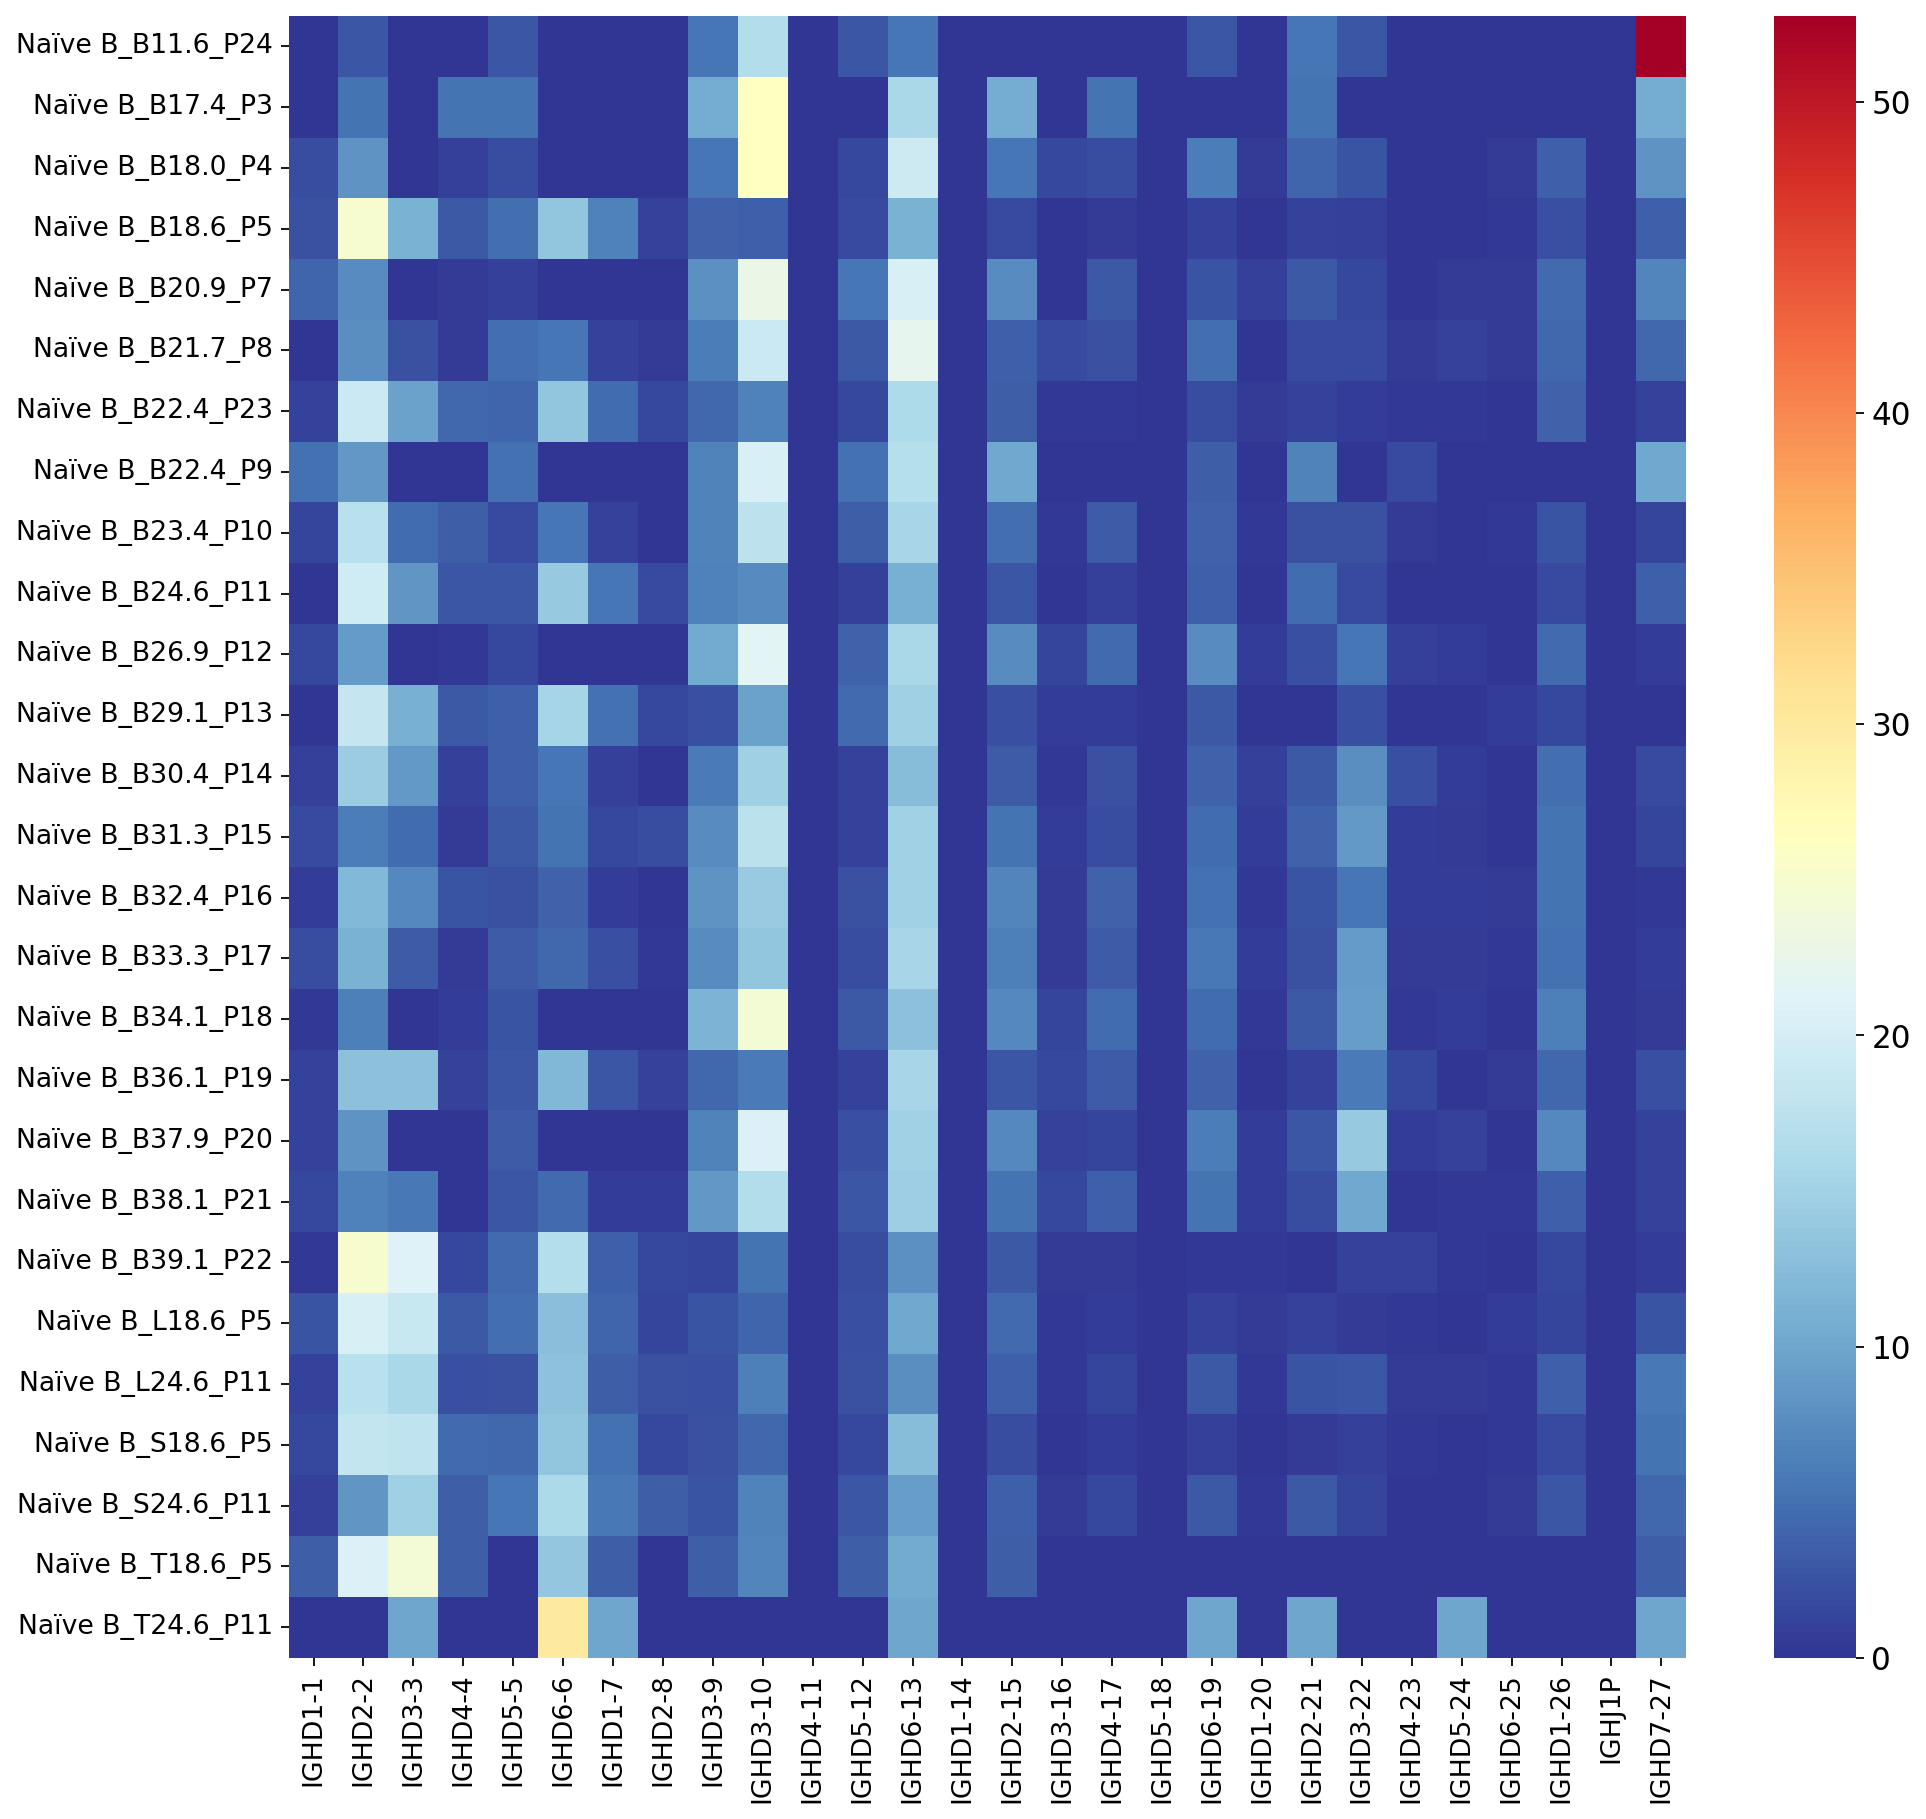

In [74]:
# IGHD=adata.obs['v_call_B_VJ_main']
IGHD = adata
IGHD_select=IGHD[IGHD.obs['Last_cell_type'].isin(['Naïve B'])]
IGHD_select = IGHD_select[~IGHD_select.obs['AdjustedID'].str.startswith('T10')]
IGHD_select = IGHD_select[~IGHD_select.obs['AdjustedID'].str.startswith('L10')]
IGHD_select.obs['Organ_cell_type']=IGHD_select.obs['Last_cell_type'].astype('str')+"_"+IGHD_select.obs['AdjustedID'].astype('str')
# IGHD_select
from collections import Counter
IGHD_Chain = None
ct_select=sorted(IGHD_select.obs['Organ_cell_type'].unique())
Dict = {'d_call_B_VDJ_main':IGHDgenelist}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
        print(cell)
        counter = Counter(IGHD_select.obs.loc[IGHD_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if IGHD_Chain is None:
        IGHD_Chain = df.copy()
    else:
        IGHD_Chain = pd.concat([IGHD_Chain, df], axis=1)
fig, ax = plt.subplots(figsize=(IGHD_Chain.shape[1]/2,IGHD_Chain.shape[0]/2))

uniform_data = IGHD_Chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


/tmp/ipykernel_59866/174764402.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGKV_select.obs['Organ_cell_type']=subIGKV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L10.0_P1'),
 Text(0, 22.5, 'Naïve B_L10.1_P25'),
 Text(0, 23.5, 'Naïve B_L18.6_P5'),
 Text(0, 24.5, 'Naïve B_L24.6_P11'),
 Text(0, 25.5, 'Naïve B_S18.6_P5'),
 Text(0, 26.5, 'Naïve B_S24.6_P11'),
 Text(0, 27.5, 'Naïv

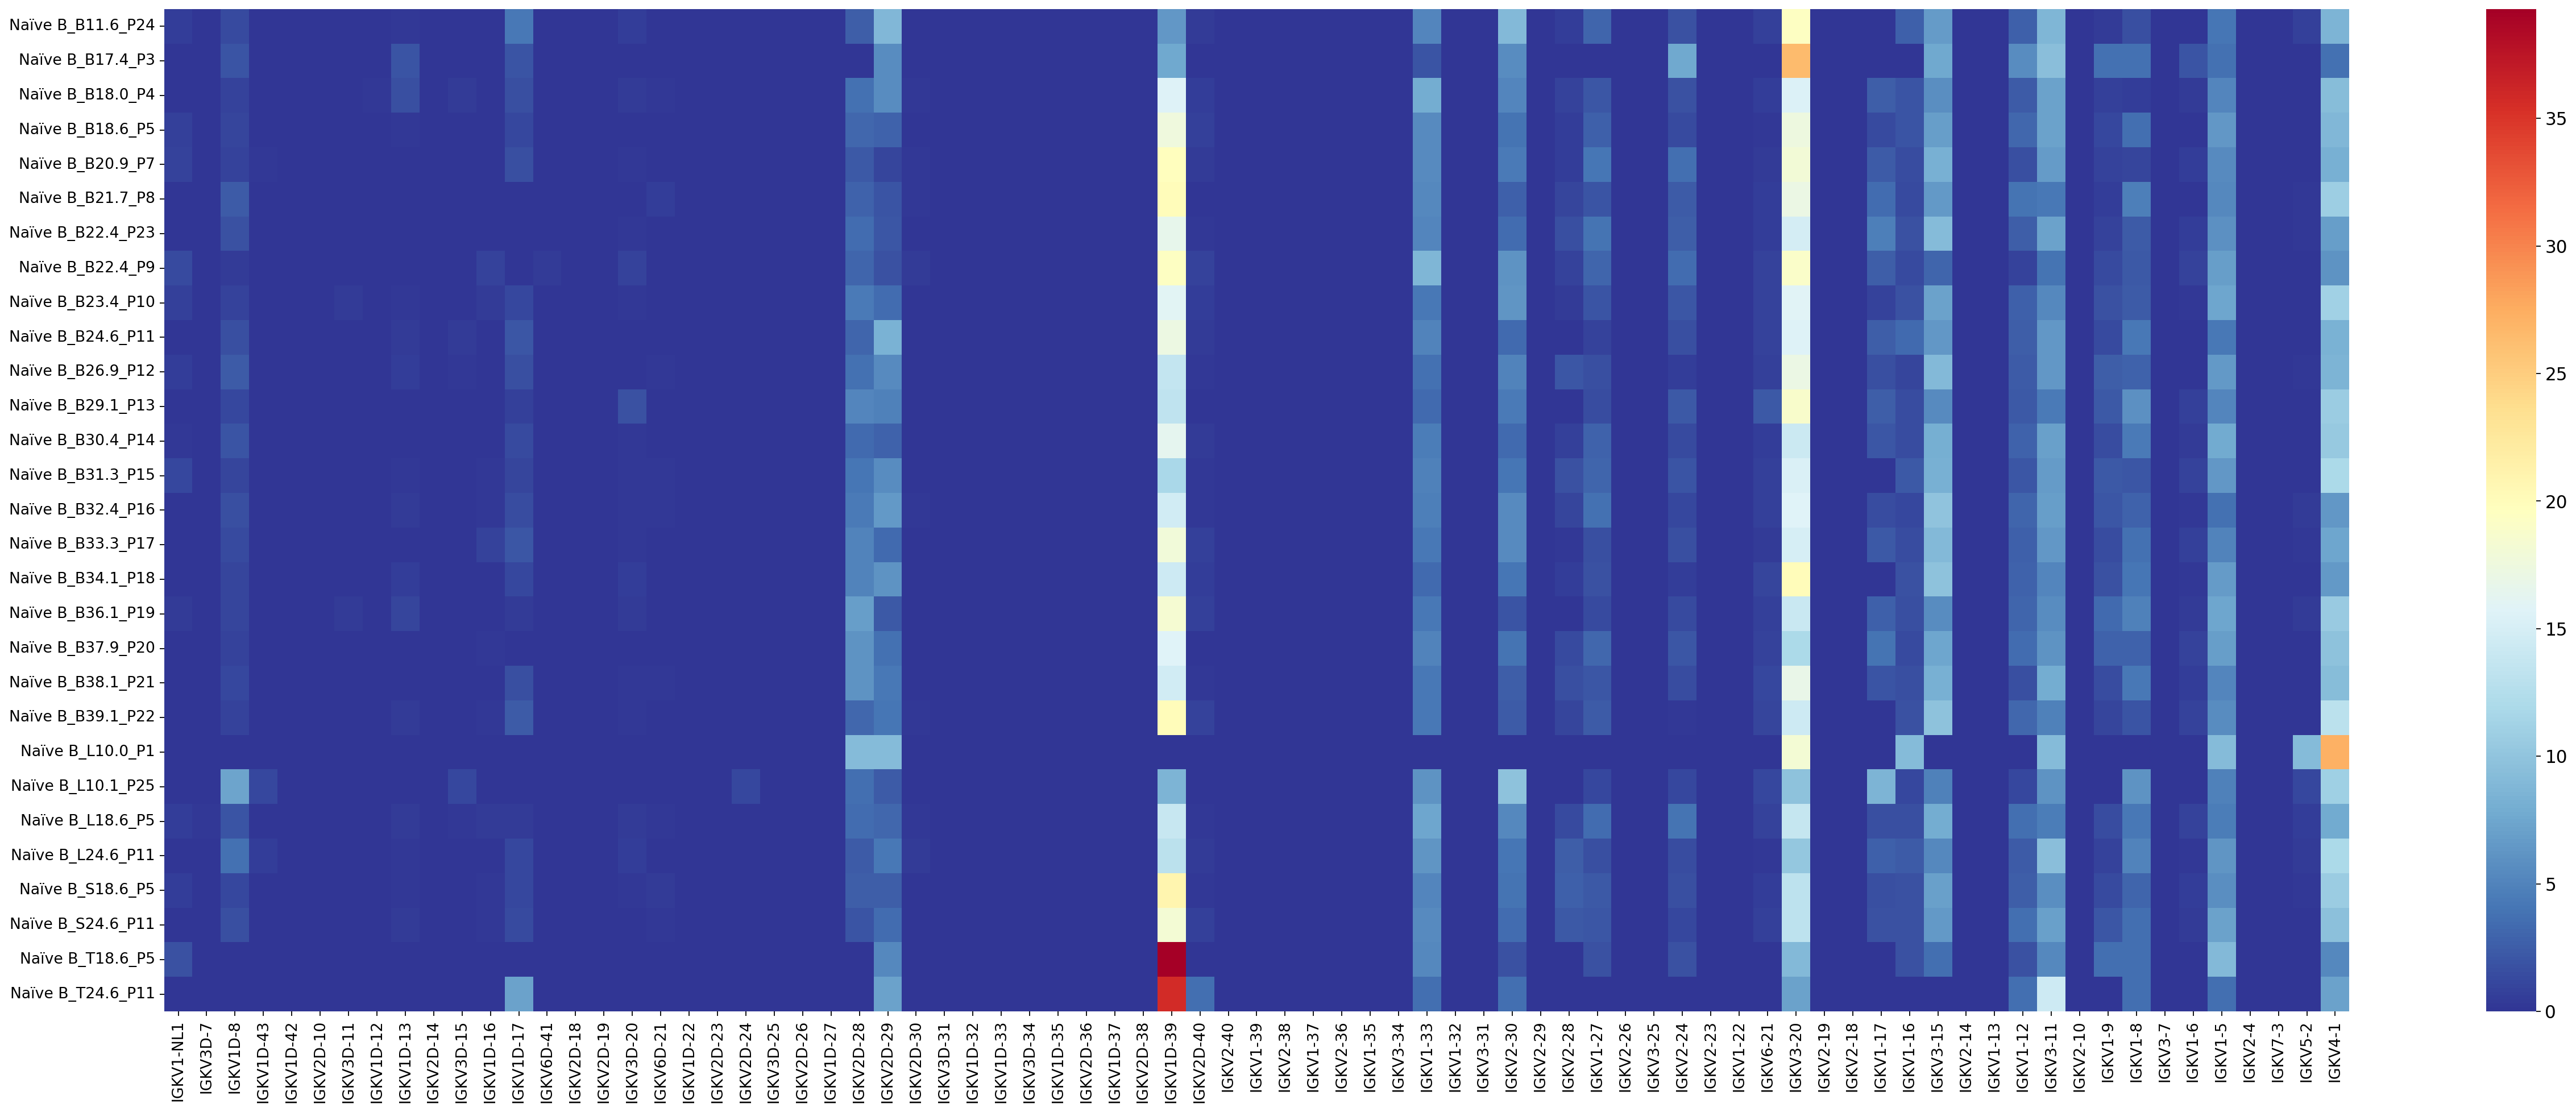

In [75]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGKV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGKV')]
subIGKV_select=subIGKV[subIGKV.obs['Last_cell_type'].isin(['Naïve B'])]
subIGKV_select = subIGKV_select[~subIGKV_select.obs['AdjustedID'].str.startswith('T10')]
# subIGKV_select = subIGKV_select[~subIGKV_select.obs['AdjustedID'].str.startswith('L12')]
subIGKV_select.obs['Organ_cell_type']=subIGKV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKV_select.obs['AdjustedID'].astype('str')
# subIGKV_select
from collections import Counter
subBCRK_chain = None
ct_select=sorted(subIGKV_select.obs['Organ_cell_type'].unique())
Dict = {'v_call_B_VJ_main':IGKrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGKV_select.obs.loc[subIGKV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subBCRK_chain is None:
        subBCRK_chain = df.copy()
    else:
        subBCRK_chain = pd.concat([subBCRK_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subBCRK_chain.shape[1]/2,subBCRK_chain.shape[0]/2))

uniform_data = subBCRK_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [76]:
subIGLV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGLV')]

subIGLV.obs.Last_cell_type=subIGLV.obs.Last_cell_type.str.replace('CXCR5\\+ ', '').str.replace('CXCR5\\- ', '')
subIGLV_select=subIGLV[subIGLV.obs['Last_cell_type'].isin(['Naïve B'])]
subIGLV.obs['Last_cell_type']
subIGLV_select

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


View of AnnData object with n_obs × n_vars = 14764 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [77]:
subIGLV_select.obs.IR_VJ_1_v_call.equals(subIGLV_select.obs.v_call_B_VJ_main)

True

In [78]:
#  subBCRL_chain

In [79]:
subIGLJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGLJ')]
subIGLJV 

View of AnnData object with n_obs × n_vars = 14793 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [80]:
adata.obs.Last_cell_type2=adata.obs.Last_cell_type

/tmp/ipykernel_59866/1033489868.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGLJV_select.obs['Organ_cell_type']=subIGLJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLJV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L10.0_P1'),
 Text(0, 22.5, 'Naïve B_L10.1_P25'),
 Text(0, 23.5, 'Naïve B_L18.6_P5'),
 Text(0, 24.5, 'Naïve B_L24.6_P11'),
 Text(0, 25.5, 'Naïve B_S18.6_P5'),
 Text(0, 26.5, 'Naïve B_S24.6_P11'),
 Text(0, 27.5, 'Naïv

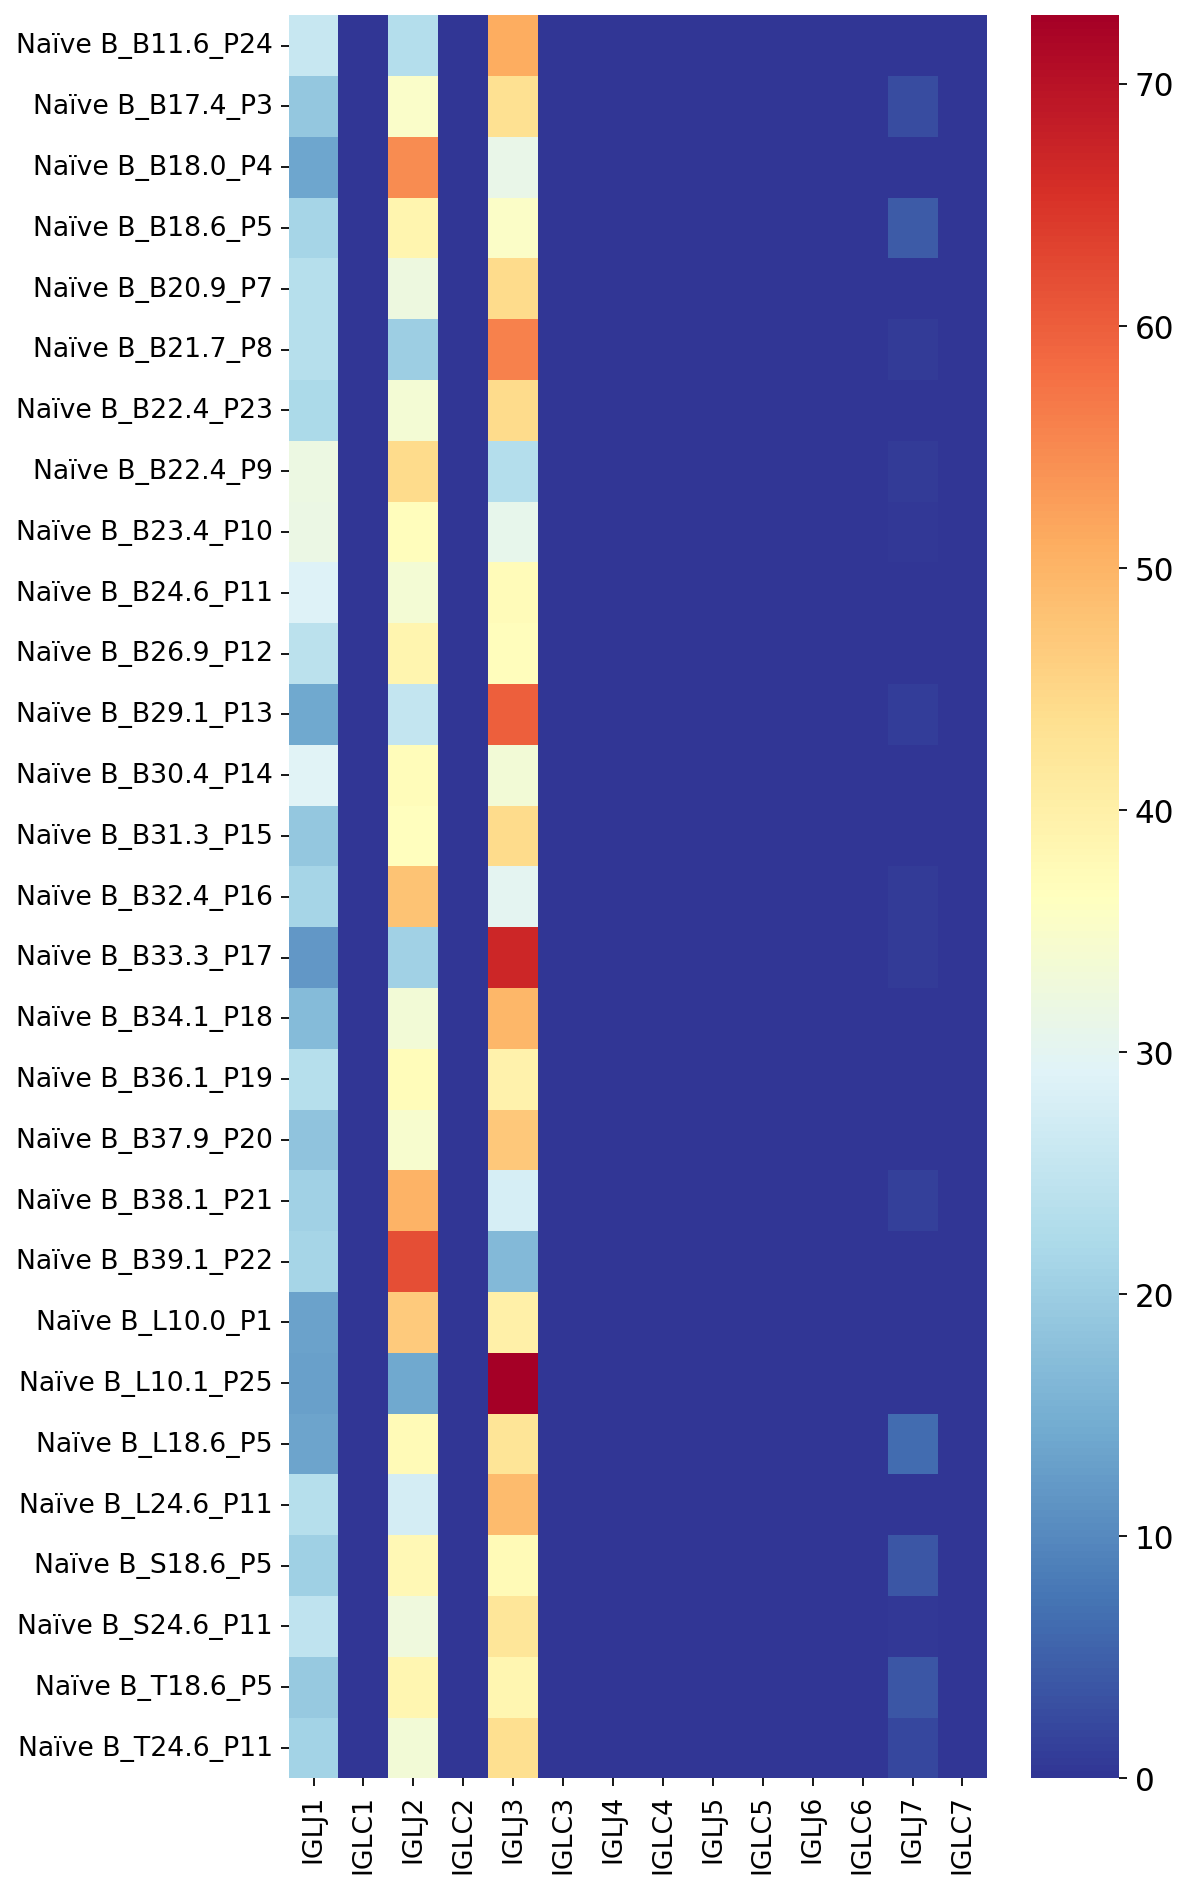

In [81]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGLJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGLJ')]
subIGLJV_select=subIGLJV[subIGLJV.obs['Last_cell_type'].isin(['Naïve B'])]
subIGLJV_select = subIGLJV_select[~subIGLJV_select.obs['AdjustedID'].str.startswith('T10')]
# subIGLJV_select = subIGLJV_select[~subIGLJV_select.obs['AdjustedID'].str.startswith('L12')]
subIGLJV_select.obs['Organ_cell_type']=subIGLJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLJV_select.obs['AdjustedID'].astype('str')
# subIGLJV_select
from collections import Counter
subIGLJ_chain = None
ct_select=sorted(subIGLJV_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':IGLJrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGLJV_select.obs.loc[subIGLJV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subIGLJ_chain is None:
        subIGLJ_chain = df.copy()
    else:
        subIGLJ_chain = pd.concat([subIGLJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subIGLJ_chain.shape[1]/2,subIGLJ_chain.shape[0]/2))

uniform_data = subIGLJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [82]:
subIGLJ_chain.index.to_list()

['Naïve B_B11.6_P24',
 'Naïve B_B17.4_P3',
 'Naïve B_B18.0_P4',
 'Naïve B_B18.6_P5',
 'Naïve B_B20.9_P7',
 'Naïve B_B21.7_P8',
 'Naïve B_B22.4_P23',
 'Naïve B_B22.4_P9',
 'Naïve B_B23.4_P10',
 'Naïve B_B24.6_P11',
 'Naïve B_B26.9_P12',
 'Naïve B_B29.1_P13',
 'Naïve B_B30.4_P14',
 'Naïve B_B31.3_P15',
 'Naïve B_B32.4_P16',
 'Naïve B_B33.3_P17',
 'Naïve B_B34.1_P18',
 'Naïve B_B36.1_P19',
 'Naïve B_B37.9_P20',
 'Naïve B_B38.1_P21',
 'Naïve B_B39.1_P22',
 'Naïve B_L10.0_P1',
 'Naïve B_L10.1_P25',
 'Naïve B_L18.6_P5',
 'Naïve B_L24.6_P11',
 'Naïve B_S18.6_P5',
 'Naïve B_S24.6_P11',
 'Naïve B_T18.6_P5',
 'Naïve B_T24.6_P11']

In [83]:
# subIGKJ_chain.index.to_list()

In [84]:
# subIGKJV_select.obs.AdjustedID.value_counts()

/tmp/ipykernel_59866/2412184334.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGKJV_select.obs['Organ_cell_type']=subIGKJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKJV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L10.0_P1'),
 Text(0, 22.5, 'Naïve B_L10.1_P25'),
 Text(0, 23.5, 'Naïve B_L18.6_P5'),
 Text(0, 24.5, 'Naïve B_L24.6_P11'),
 Text(0, 25.5, 'Naïve B_S18.6_P5'),
 Text(0, 26.5, 'Naïve B_S24.6_P11'),
 Text(0, 27.5, 'Naïv

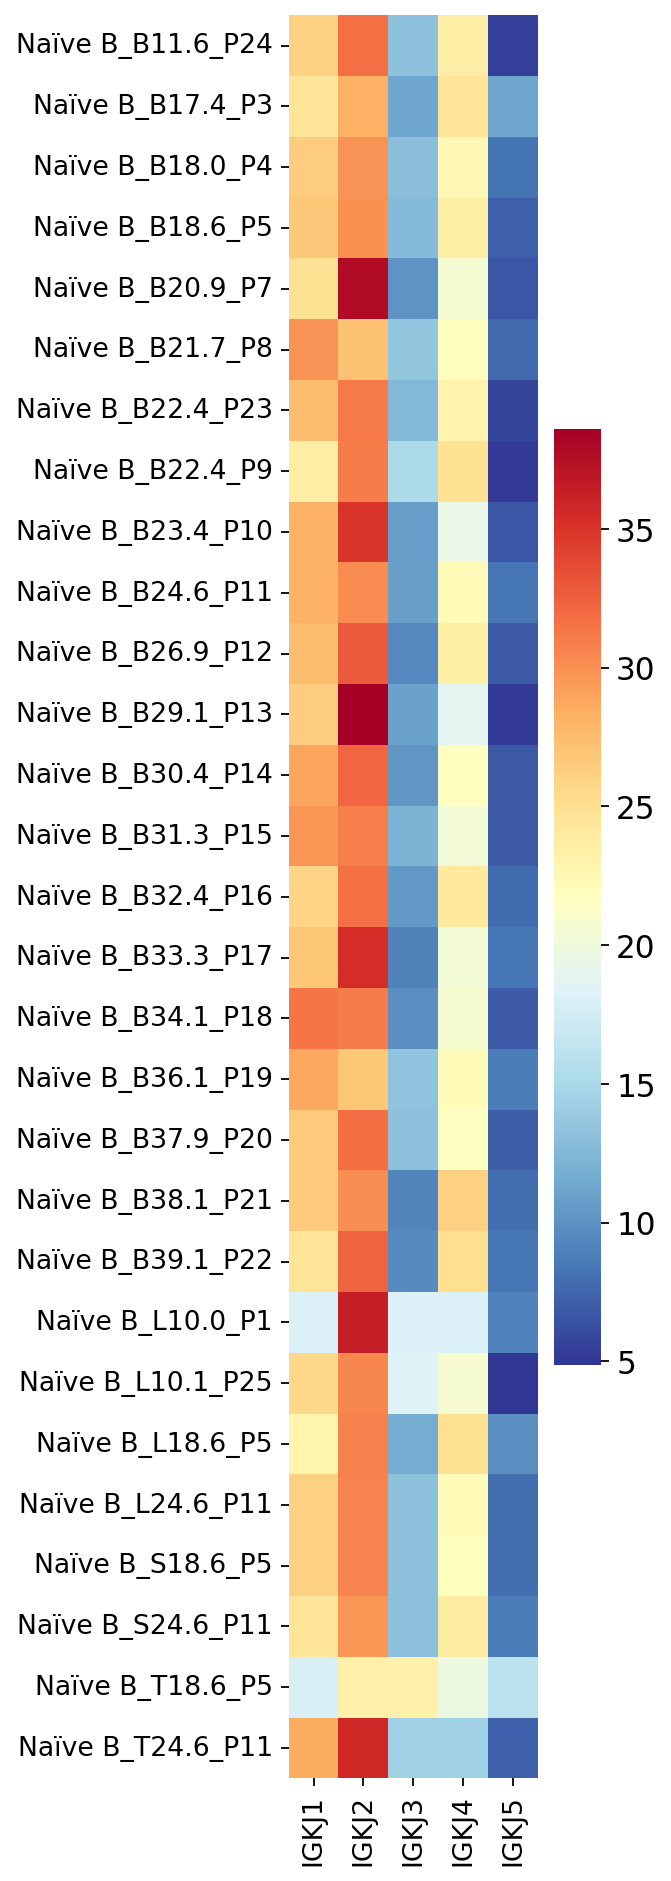

In [85]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGKJV = adata[adata.obs['j_call_B_VJ_main'].str.contains('IGKJ')]
subIGKJV_select=subIGKJV[subIGKJV.obs['Last_cell_type'].isin(['Naïve B'])]
subIGKJV_select = subIGKJV_select[~subIGKJV_select.obs['AdjustedID'].str.startswith('T10')]
# subIGKJV_select = subIGKJV_select[~subIGKJV_select.obs['AdjustedID'].str.startswith('L12')]
subIGKJV_select.obs['Organ_cell_type']=subIGKJV_select.obs['Last_cell_type'].astype('str')+"_"+subIGKJV_select.obs['AdjustedID'].astype('str')
# subIGKJV_select
from collections import Counter
subIGKJ_chain = None
ct_select=sorted(subIGKJV_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':IGKJrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGKJV_select.obs.loc[subIGKJV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subIGKJ_chain is None:
        subIGKJ_chain = df.copy()
    else:
        subIGKJ_chain = pd.concat([subIGKJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subIGKJ_chain.shape[1]/2,subIGKJ_chain.shape[0]/2))

uniform_data = subIGKJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [86]:
# v_call_B_VJ_main_list

In [87]:

# lst = v_call_B_VJ_main_list

# lst = [s for s in lst if s.split('-')[1].isdigit()]

# sort_key = lambda s: (s[:4], int(s.split('-')[1]))


# BRLsorted_lst = sorted(lst, key=sort_key)

# print(BRLsorted_lst)
# print(len(lst))
# print(len(sorted_lst))

In [88]:
# print(lst)

In [89]:
# %%R
# setdiff(BCRL_chainlong$variable,BRLsorted_lst)
# wide_data


/tmp/ipykernel_59866/1209031871.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subIGLV_select.obs['Organ_cell_type']=subIGLV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLV_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L10.0_P1'),
 Text(0, 22.5, 'Naïve B_L10.1_P25'),
 Text(0, 23.5, 'Naïve B_L18.6_P5'),
 Text(0, 24.5, 'Naïve B_L24.6_P11'),
 Text(0, 25.5, 'Naïve B_S18.6_P5'),
 Text(0, 26.5, 'Naïve B_S24.6_P11'),
 Text(0, 27.5, 'Naïv

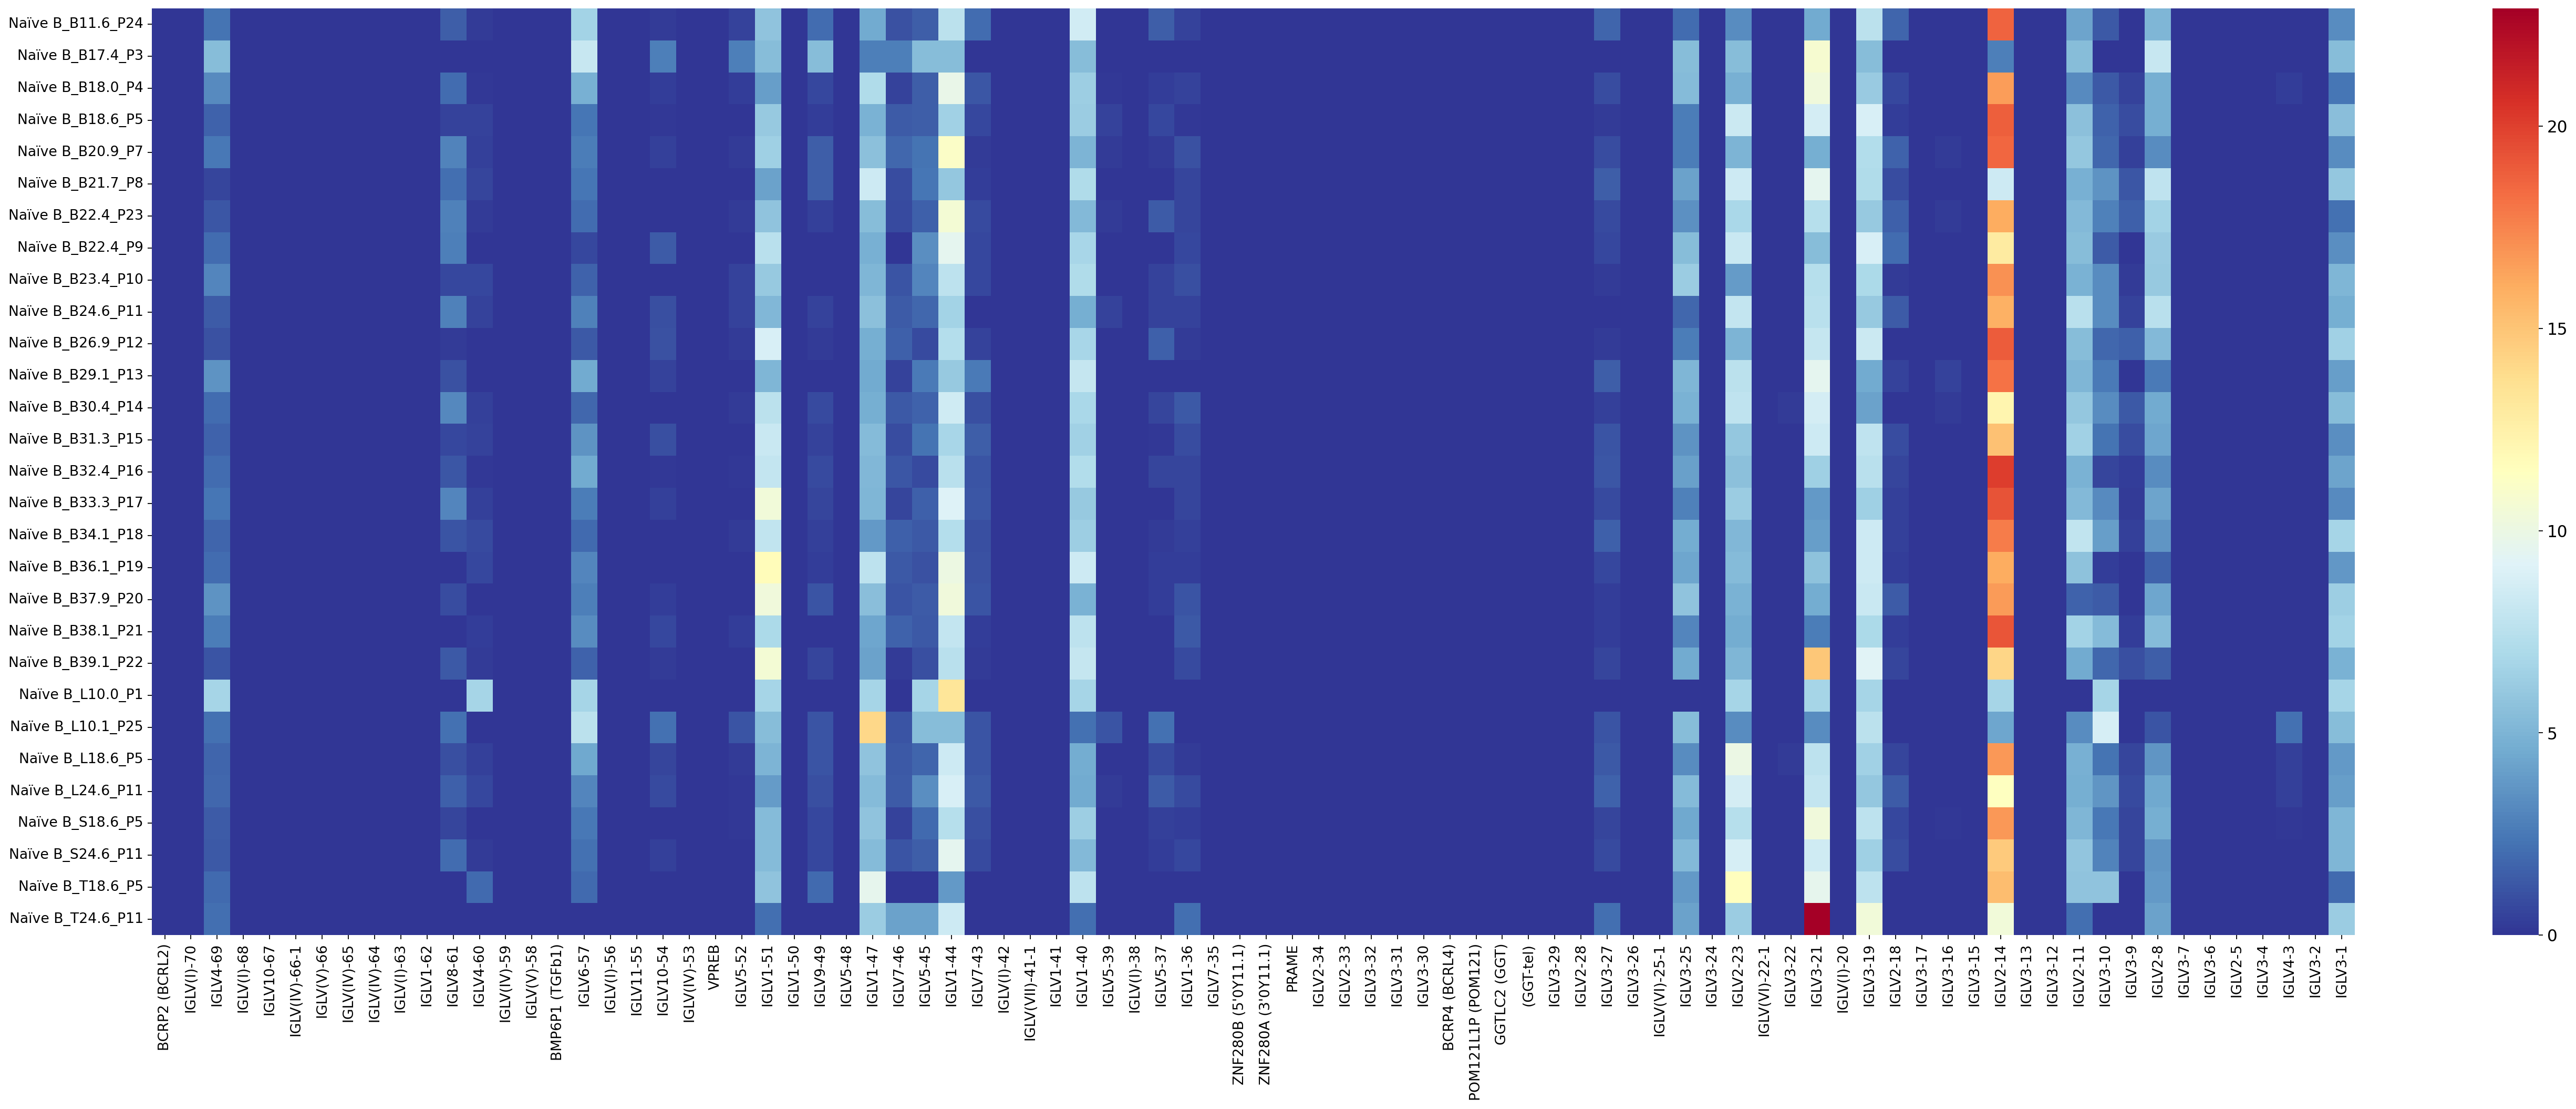

In [90]:
# subIGKV=adata.obs['v_call_B_VJ_main']
subIGLV = adata[adata.obs['v_call_B_VJ_main'].str.contains('IGLV')]
subIGLV_select=subIGLV[subIGLV.obs['Last_cell_type'].isin(['Naïve B'])]
subIGLV_select = subIGLV_select[~subIGLV_select.obs['AdjustedID'].str.startswith('T10')]
# subIGLV_select = subIGLV_select[~subIGLV_select.obs['AdjustedID'].str.startswith('L12')]
subIGLV_select.obs['Organ_cell_type']=subIGLV_select.obs['Last_cell_type'].astype('str')+"_"+subIGLV_select.obs['AdjustedID'].astype('str')
# subIGLV_select
from collections import Counter
subBCRL_chain = None
ct_select=sorted(subIGLV_select.obs['Organ_cell_type'].unique())
Dict = {'v_call_B_VJ_main':IGLrealistvalues}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(subIGLV_select.obs.loc[subIGLV_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if subBCRL_chain is None:
        subBCRL_chain = df.copy()
    else:
        subBCRL_chain = pd.concat([subBCRL_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(subBCRL_chain.shape[1]/2,subBCRL_chain.shape[0]/2))

uniform_data = subBCRL_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data,cmap='RdYlBu_r', yticklabels=True)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)


In [91]:
%%R
BCRTR_heatmap

function(BCRH_chainlong, IGHlistvalues,titlename='IGHV') {
  library(tidyverse)
  library(scales)
  library(ggplot2)
  library(dplyr)
  library(RColorBrewer)
  library(ComplexHeatmap)
  
  BCRH = BCRH_chainlong
  BCRH$variable <- factor(BCRH$variable, level = IGHlistvalues)

  split_BCRH <- strsplit(BCRH$Sample, "_")

  BCRH$CellType <- sapply(split_BCRH, "[", 1)
  BCRH$AdjusteID <- sapply(split_BCRH, "[", 2)

  BCRH$Organ <- substr(BCRH$AdjusteID, 1, 1)
  BCRH$Sample <- factor(BCRH$Sample, level = rev(sort(unique(BCRH$Sample))))

  BCRH2 <- BCRH %>% group_by(variable) %>% filter(sum(as.numeric(value)) != 0) %>% ungroup()
  
  BCRH2$CellType_Organ <- paste(BCRH2$CellType, BCRH2$Organ, sep = "_")

  wide_data <- spread(BCRH2, variable, value)
  rownames(wide_data) <- wide_data$Sample
  wide_data$Sample <- NULL 

  annotations2 <- BCRH2 %>% 
    select(Sample, CellType, Organ) %>% 
    distinct() %>% 
    column_to_rownames("Sample")

  wide_data <- wide_data %>%
    mutate(AdjustedID_nu

In [92]:
# %%R  -w 3600 -h 2400 -r 300 -i BCRL_chainlong -i IGKlistvalues
# BCRLVheatmap <- BCRTR_heatmap(BCRL_chainlong, IGKlistvalues,titlename="IGKV/IGLV")
# # print(heatmap)
# BCRLVheatmap[[1]]+BCRLVheatmap[[2]]

In [93]:
subBCRK_chainlong=subBCRK_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
subBCRK_chainlong.Sample.value_counts()

Naïve B_B11.6_P24    77
Naïve B_B33.3_P17    77
Naïve B_T18.6_P5     77
Naïve B_S24.6_P11    77
Naïve B_S18.6_P5     77
Naïve B_L24.6_P11    77
Naïve B_L18.6_P5     77
Naïve B_L10.1_P25    77
Naïve B_L10.0_P1     77
Naïve B_B39.1_P22    77
Naïve B_B38.1_P21    77
Naïve B_B37.9_P20    77
Naïve B_B36.1_P19    77
Naïve B_B34.1_P18    77
Naïve B_B32.4_P16    77
Naïve B_B17.4_P3     77
Naïve B_B31.3_P15    77
Naïve B_B30.4_P14    77
Naïve B_B29.1_P13    77
Naïve B_B26.9_P12    77
Naïve B_B24.6_P11    77
Naïve B_B23.4_P10    77
Naïve B_B22.4_P9     77
Naïve B_B22.4_P23    77
Naïve B_B21.7_P8     77
Naïve B_B20.9_P7     77
Naïve B_B18.6_P5     77
Naïve B_B18.0_P4     77
Naïve B_T24.6_P11    77
Name: Sample, dtype: int64

In [94]:
subBCRL_chainlong=subBCRL_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
subBCRL_chainlong

Sample       variable     value
0     Naïve B_B11.6_P24  BCRP2 (BCRL2)       0.0
1      Naïve B_B17.4_P3  BCRP2 (BCRL2)       0.0
2      Naïve B_B18.0_P4  BCRP2 (BCRL2)       0.0
3      Naïve B_B18.6_P5  BCRP2 (BCRL2)       0.0
4      Naïve B_B20.9_P7  BCRP2 (BCRL2)       0.0
...                 ...            ...       ...
2431  Naïve B_L24.6_P11        IGLV3-1  4.010349
2432   Naïve B_S18.6_P5        IGLV3-1  5.027027
2433  Naïve B_S24.6_P11        IGLV3-1  5.034511
2434   Naïve B_T18.6_P5        IGLV3-1  1.923077
2435  Naïve B_T24.6_P11        IGLV3-1      6.25

[2436 rows x 3 columns]

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "value". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


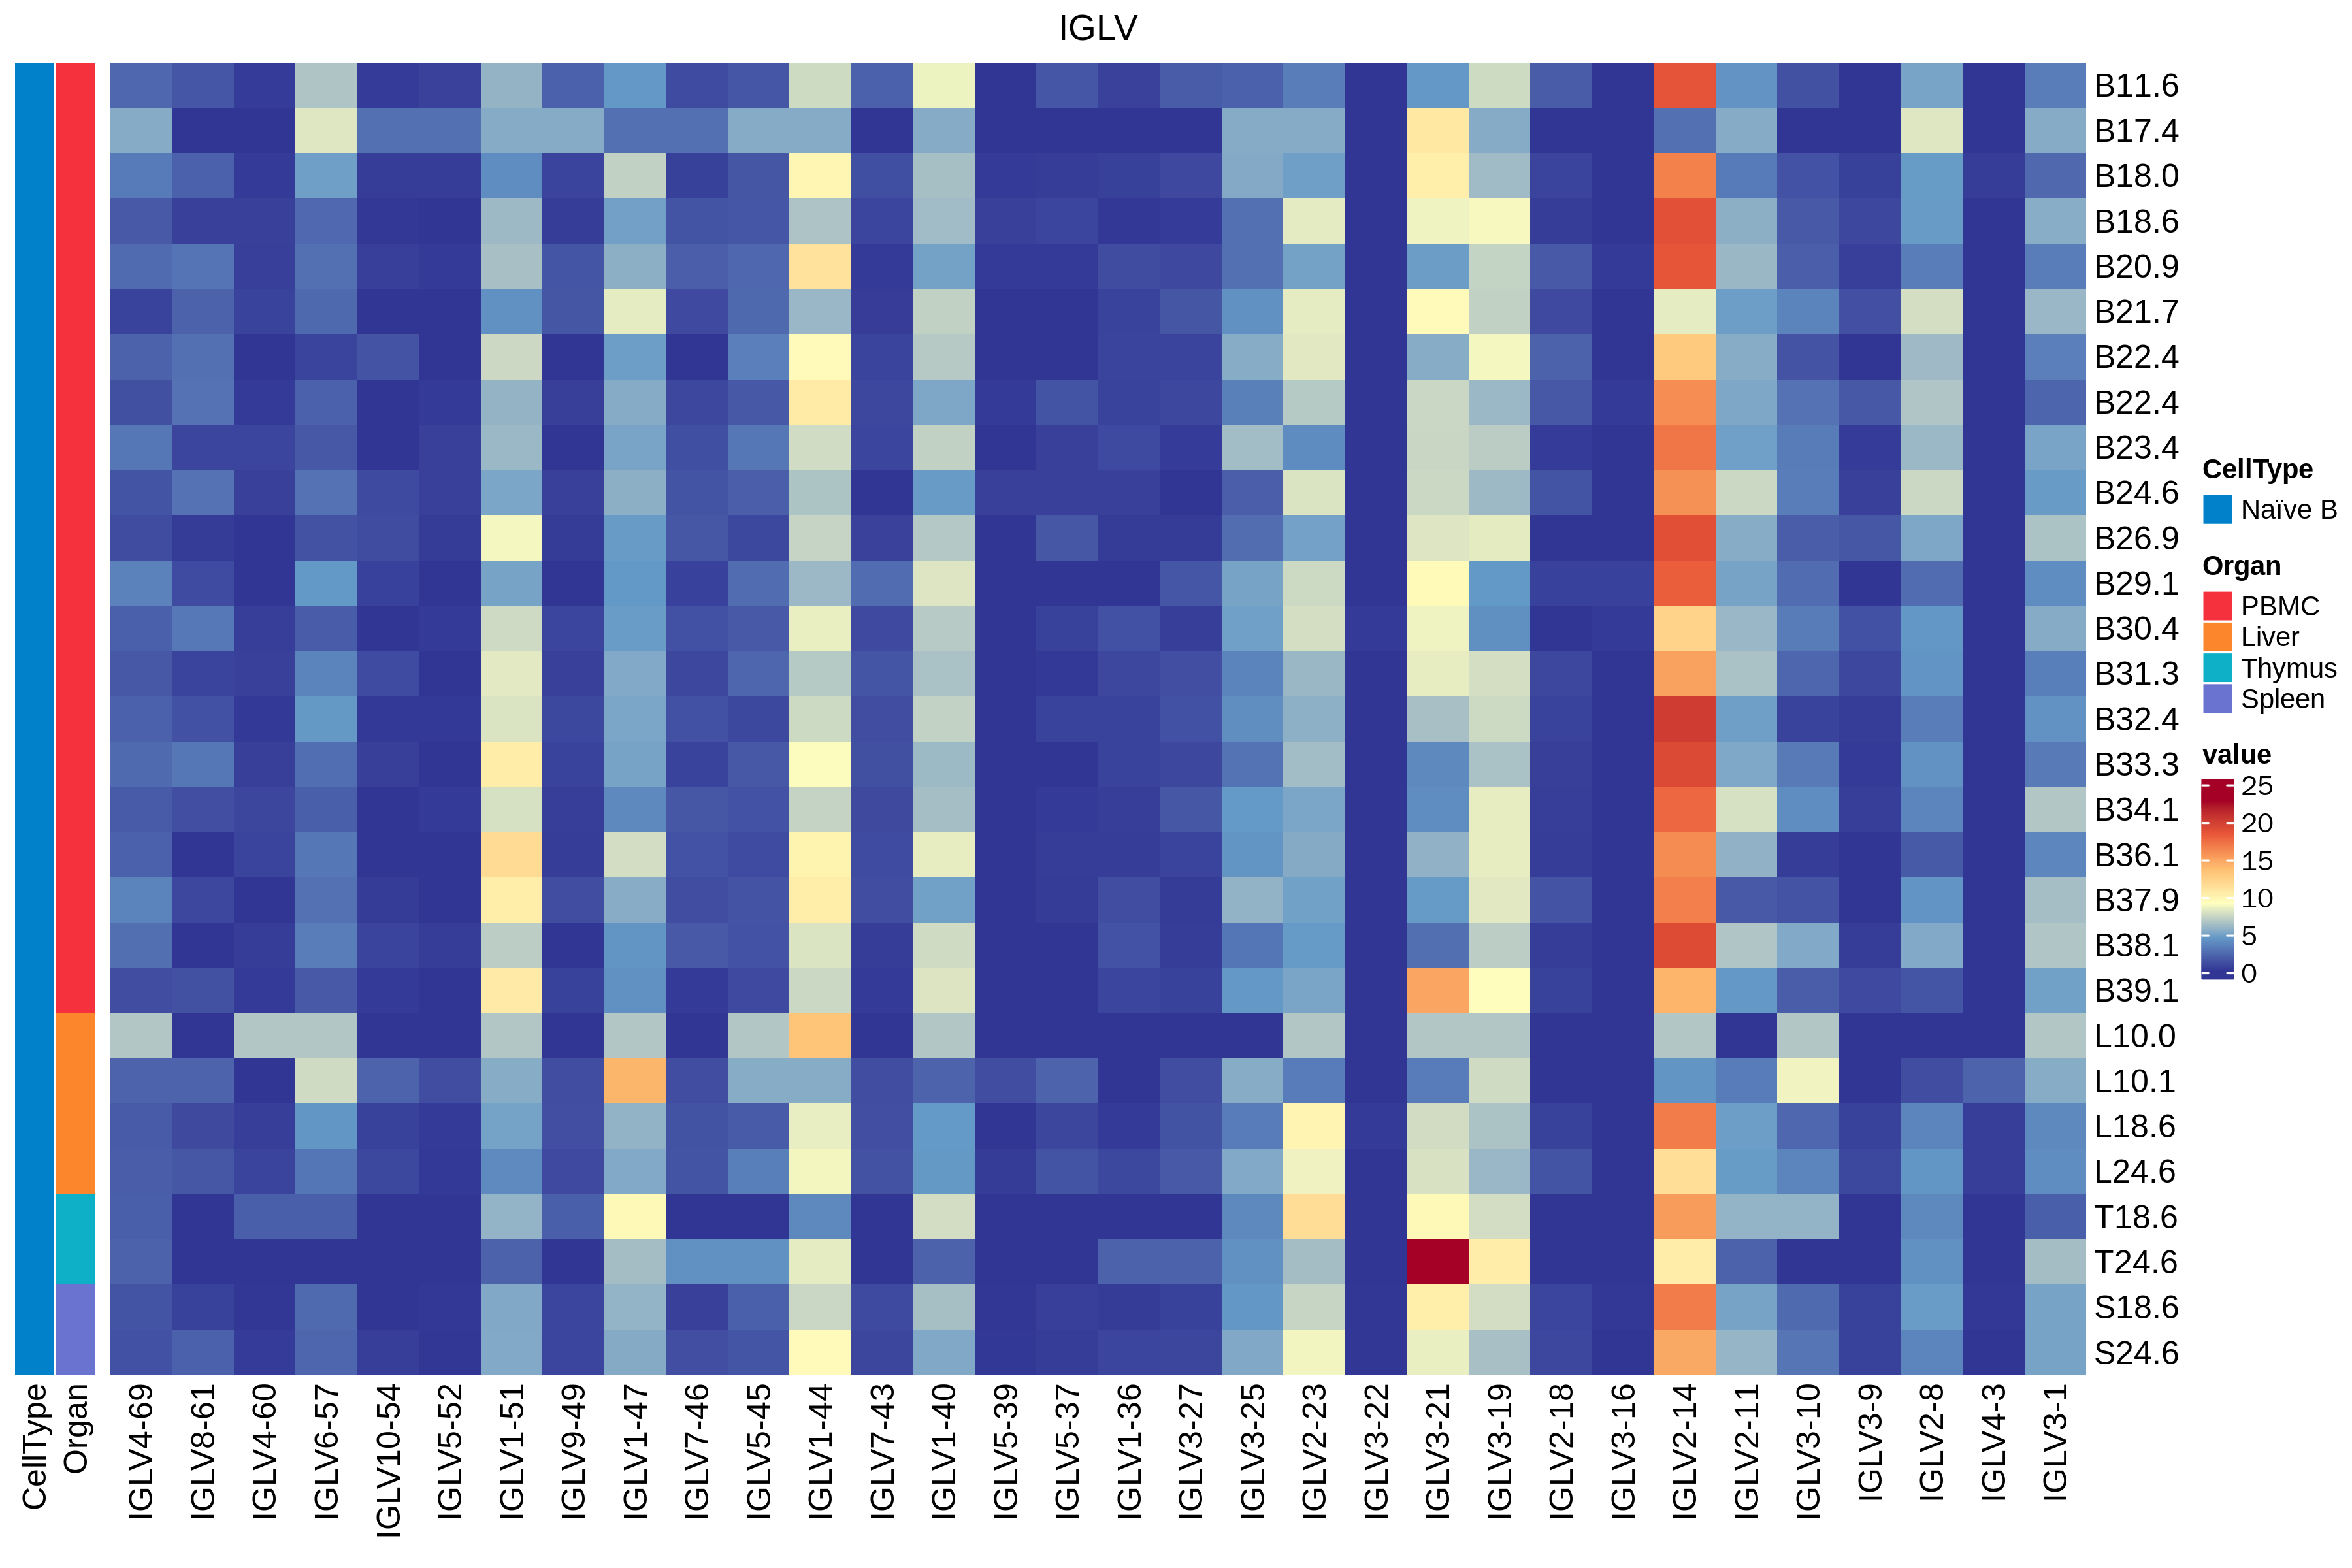

In [95]:
%%R  -w 3600 -h 2400 -r 300 -i subBCRL_chainlong -i IGLrealistvalues
# subBCRL_chainlong[,which(subBCRL_chainlong$value)=="100"]
subBCRL_chainlong$value[which(as.numeric(subBCRL_chainlong$value)==100)] <- median(subBCRL_chainlong$value)
subBCRL_chainlong$value[which(as.numeric(subBCRL_chainlong$value)>50)] <- median(subBCRL_chainlong$value)
subBCRLVheatmap <- BCRTR_heatmap(subBCRL_chainlong, IGLrealistvalues,titlename="IGLV")
# print(heatmap)
subBCRLVheatmap[[1]]+subBCRLVheatmap[[2]]

In [96]:
%%R  -w 3600 -h 2400 -r 300 -i subBCRK_chainlong -i IGKrealistvalues
head(subBCRK_chainlong)
unique(subBCRK_chainlong$Sample)

 [1] "Naïve B_B11.6_P24" "Naïve B_B17.4_P3"  "Naïve B_B18.0_P4" 
 [4] "Naïve B_B18.6_P5"  "Naïve B_B20.9_P7"  "Naïve B_B21.7_P8" 
 [7] "Naïve B_B22.4_P23" "Naïve B_B22.4_P9"  "Naïve B_B23.4_P10"
[10] "Naïve B_B24.6_P11" "Naïve B_B26.9_P12" "Naïve B_B29.1_P13"
[13] "Naïve B_B30.4_P14" "Naïve B_B31.3_P15" "Naïve B_B32.4_P16"
[16] "Naïve B_B33.3_P17" "Naïve B_B34.1_P18" "Naïve B_B36.1_P19"
[19] "Naïve B_B37.9_P20" "Naïve B_B38.1_P21" "Naïve B_B39.1_P22"
[22] "Naïve B_L10.0_P1"  "Naïve B_L10.1_P25" "Naïve B_L18.6_P5" 
[25] "Naïve B_L24.6_P11" "Naïve B_S18.6_P5"  "Naïve B_S24.6_P11"
[28] "Naïve B_T18.6_P5"  "Naïve B_T24.6_P11"


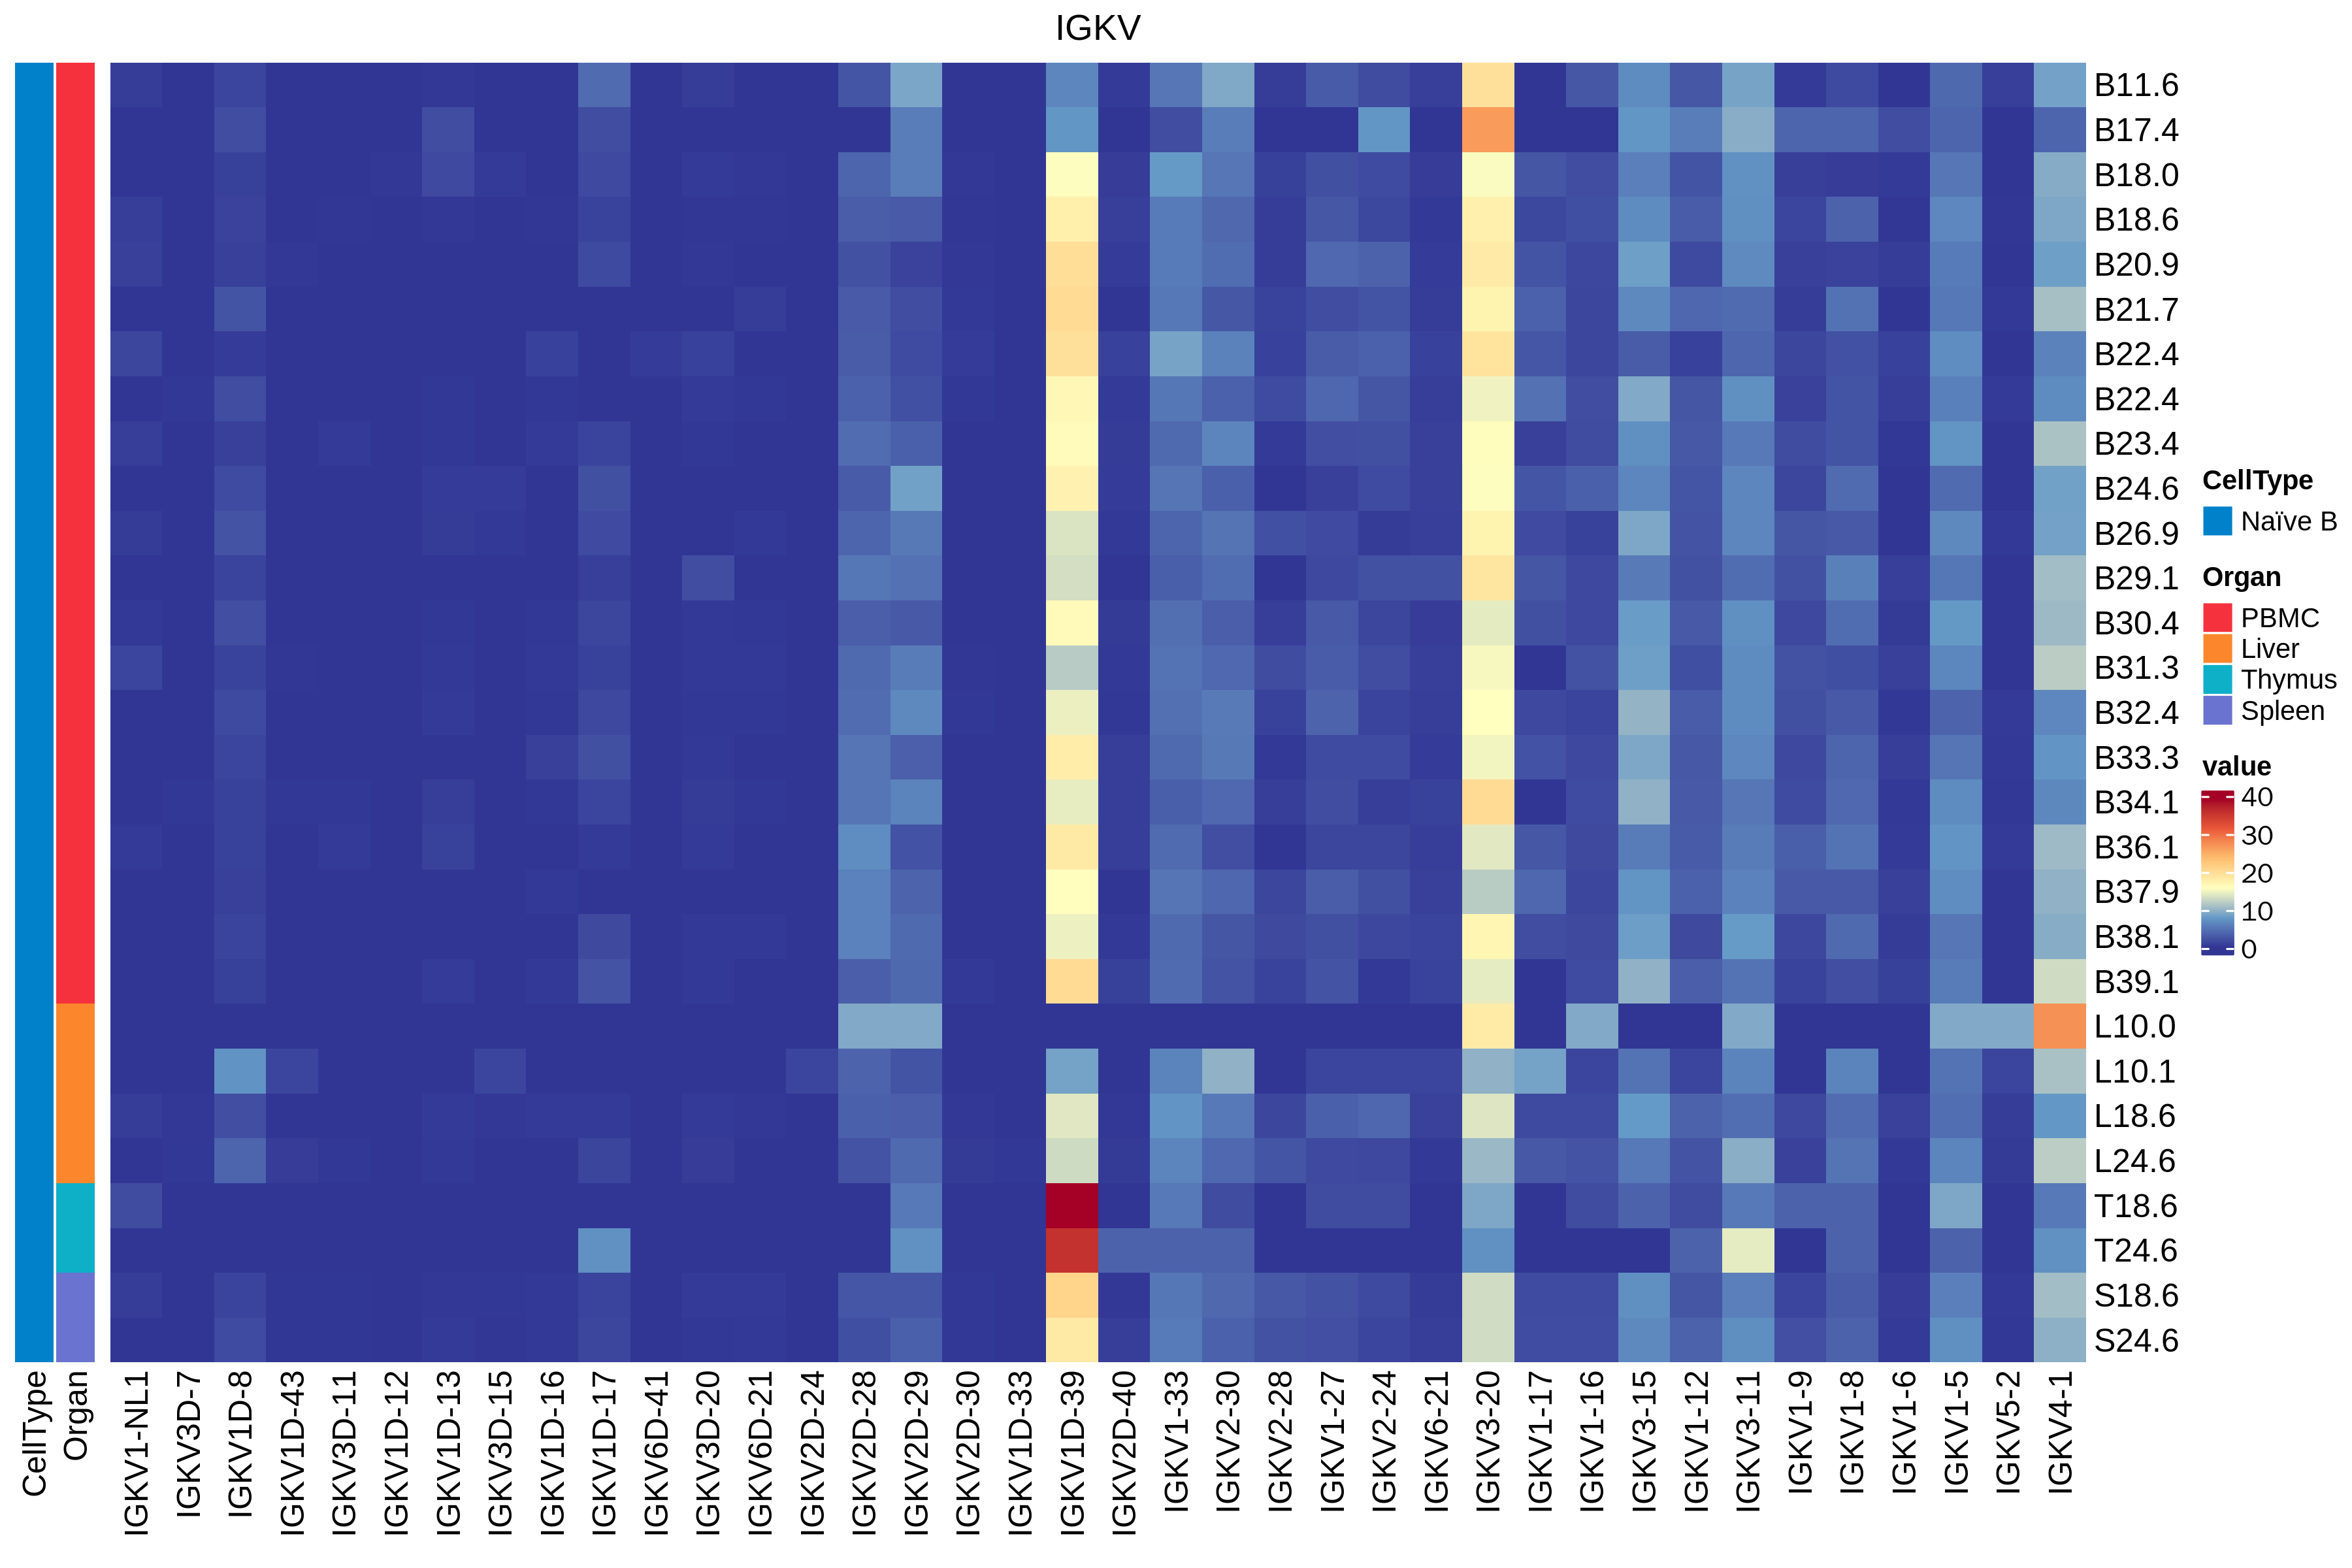

In [97]:
%%R  -w 3600 -h 2400 -r 300 -i subBCRK_chainlong -i IGKrealistvalues

# print(heatmap)
subBCRK_chainlong$value[which(as.numeric(subBCRK_chainlong$value)==100)] <- median(subBCRK_chainlong$value)
subBCRK_chainlong$value[which(as.numeric(subBCRK_chainlong$value)>80)] <- median(subBCRK_chainlong$value)
subBCRKVheatmap <- BCRTR_heatmap(subBCRK_chainlong, IGKrealistvalues,titlename="IGKV")
subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]

/tmp/ipykernel_59866/2591021079.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')


[Text(0, 0.5, 'Naïve B_B11.6_P24'),
 Text(0, 1.5, 'Naïve B_B17.4_P3'),
 Text(0, 2.5, 'Naïve B_B18.0_P4'),
 Text(0, 3.5, 'Naïve B_B18.6_P5'),
 Text(0, 4.5, 'Naïve B_B20.9_P7'),
 Text(0, 5.5, 'Naïve B_B21.7_P8'),
 Text(0, 6.5, 'Naïve B_B22.4_P23'),
 Text(0, 7.5, 'Naïve B_B22.4_P9'),
 Text(0, 8.5, 'Naïve B_B23.4_P10'),
 Text(0, 9.5, 'Naïve B_B24.6_P11'),
 Text(0, 10.5, 'Naïve B_B26.9_P12'),
 Text(0, 11.5, 'Naïve B_B29.1_P13'),
 Text(0, 12.5, 'Naïve B_B30.4_P14'),
 Text(0, 13.5, 'Naïve B_B31.3_P15'),
 Text(0, 14.5, 'Naïve B_B32.4_P16'),
 Text(0, 15.5, 'Naïve B_B33.3_P17'),
 Text(0, 16.5, 'Naïve B_B34.1_P18'),
 Text(0, 17.5, 'Naïve B_B36.1_P19'),
 Text(0, 18.5, 'Naïve B_B37.9_P20'),
 Text(0, 19.5, 'Naïve B_B38.1_P21'),
 Text(0, 20.5, 'Naïve B_B39.1_P22'),
 Text(0, 21.5, 'Naïve B_L10.0_P1'),
 Text(0, 22.5, 'Naïve B_L10.1_P25'),
 Text(0, 23.5, 'Naïve B_L18.6_P5'),
 Text(0, 24.5, 'Naïve B_L24.6_P11'),
 Text(0, 25.5, 'Naïve B_S18.6_P5'),
 Text(0, 26.5, 'Naïve B_S24.6_P11'),
 Text(0, 27.5, 'Naïv

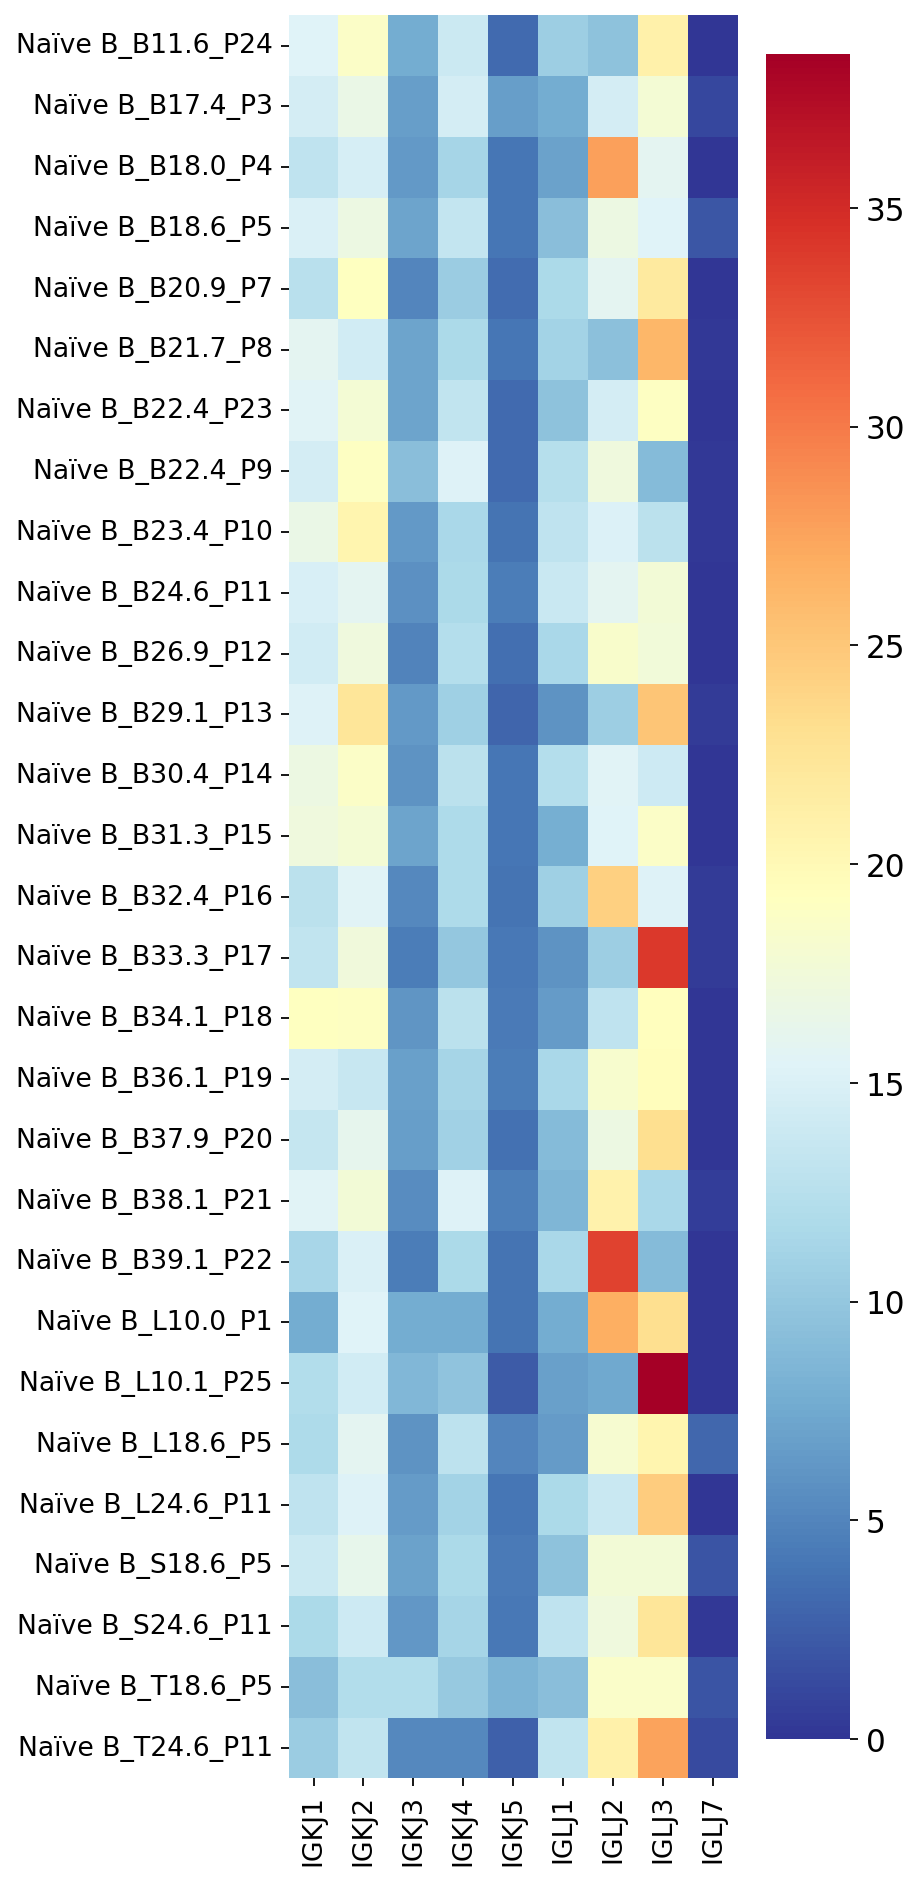

In [98]:


adata_select=adata[adata.obs['Last_cell_type'].isin(['Naïve B'])]
adata_select = adata_select[~adata_select.obs['AdjustedID'].str.startswith('T10')]

adata_select.obs['Organ_cell_type']=adata_select.obs['Last_cell_type'].astype('str')+"_"+adata_select.obs['AdjustedID'].astype('str')
# adata_select
from collections import Counter
BCRLJ_chain = None
ct_select=sorted(adata_select.obs['Organ_cell_type'].unique())
Dict = {'j_call_B_VJ_main':j_call_B_VJ_main_list}

for name in list(Dict.keys()):
    df = pd.DataFrame(columns = Dict[name],  index = ct_select)
    
    for cell in df.index:
#         print(cell)
        counter = Counter(adata_select.obs.loc[adata_select.obs['Organ_cell_type']==cell,name])
#         print(counter)
        for chain_type in df.columns:
            df.loc[cell, chain_type]=counter[chain_type]
        
        df.loc[cell,:] = df.loc[cell,:] / np.sum(df.loc[cell,:]) * 100
    
    if BCRLJ_chain is None:
        BCRLJ_chain = df.copy()
    else:
        BCRLJ_chain = pd.concat([BCRLJ_chain, df], axis=1)
fig, ax = plt.subplots(figsize=(BCRLJ_chain.shape[1]/2,BCRLJ_chain.shape[0]/2))
#sb.set_theme()
uniform_data = BCRLJ_chain
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data, cmap='RdYlBu_r', yticklabels=True, linewidths=0)

_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=12,rotation=90)
ax.set_yticklabels(ylabels, size=12,rotation=0)
# plt.savefig(fig_path+'gdBCRLJ_heatmap.pdf',bbox_inches='tight');

In [99]:
BCRLJ_chainlong=BCRLJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
BCRLJ_chainlong

Sample variable      value
0    Naïve B_B11.6_P24    IGKJ1  15.352697
1     Naïve B_B17.4_P3    IGKJ1  14.444444
2     Naïve B_B18.0_P4    IGKJ1  12.995781
3     Naïve B_B18.6_P5    IGKJ1  15.020367
4     Naïve B_B20.9_P7    IGKJ1  12.614446
..                 ...      ...        ...
256  Naïve B_L24.6_P11    IGLJ7   0.064809
257   Naïve B_S18.6_P5    IGLJ7   1.842504
258  Naïve B_S24.6_P11    IGLJ7   0.235344
259   Naïve B_T18.6_P5    IGLJ7   1.851852
260  Naïve B_T24.6_P11    IGLJ7   1.315789

[261 rows x 3 columns]

In [100]:
IGKJJ_chainlong=subIGKJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
IGKJJ_chainlong

Sample variable      value
0    Naïve B_B11.6_P24    IGKJ1  26.056338
1     Naïve B_B17.4_P3    IGKJ1  24.528302
2     Naïve B_B18.0_P4    IGKJ1  26.369863
3     Naïve B_B18.6_P5    IGKJ1  26.672694
4     Naïve B_B20.9_P7    IGKJ1  24.899598
..                 ...      ...        ...
140  Naïve B_L24.6_P11    IGKJ5   7.922078
141   Naïve B_S18.6_P5    IGKJ5   7.954545
142  Naïve B_S24.6_P11    IGKJ5    8.77431
143   Naïve B_T18.6_P5    IGKJ5  16.071429
144  Naïve B_T24.6_P11    IGKJ5   7.142857

[145 rows x 3 columns]

In [101]:
IGHD_chainlong=IGHD_Chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
IGHD_chainlong

Sample  variable     value
0    Naïve B_B11.6_P24   IGHD1-1       0.0
1     Naïve B_B17.4_P3   IGHD1-1       0.0
2     Naïve B_B18.0_P4   IGHD1-1  2.020202
3     Naïve B_B18.6_P5   IGHD1-1  2.318393
4     Naïve B_B20.9_P7   IGHD1-1  3.960396
..                 ...       ...       ...
751  Naïve B_L24.6_P11  IGHD7-27  5.733945
752   Naïve B_S18.6_P5  IGHD7-27  5.272109
753  Naïve B_S24.6_P11  IGHD7-27  4.241877
754   Naïve B_T18.6_P5  IGHD7-27  3.448276
755  Naïve B_T24.6_P11  IGHD7-27      10.0

[756 rows x 3 columns]

In [102]:
IGLJJ_chainlong=subIGLJ_chain.reset_index().rename(columns={'index': 'Sample'}).melt(id_vars=['Sample'])
IGLJJ_chainlong

Sample variable      value
0    Naïve B_B11.6_P24    IGLJ1  25.757576
1     Naïve B_B17.4_P3    IGLJ1  18.918919
2     Naïve B_B18.0_P4    IGLJ1  13.810316
3     Naïve B_B18.6_P5    IGLJ1  21.328671
4     Naïve B_B20.9_P7    IGLJ1  23.505155
..                 ...      ...        ...
401  Naïve B_L24.6_P11    IGLC7        0.0
402   Naïve B_S18.6_P5    IGLC7        0.0
403  Naïve B_S24.6_P11    IGLC7        0.0
404   Naïve B_T18.6_P5    IGLC7        0.0
405  Naïve B_T24.6_P11    IGLC7        0.0

[406 rows x 3 columns]

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "value". Fall back to string conversion. The error is: <class 'float'>
  warnings.warn('Error while trying to convert '


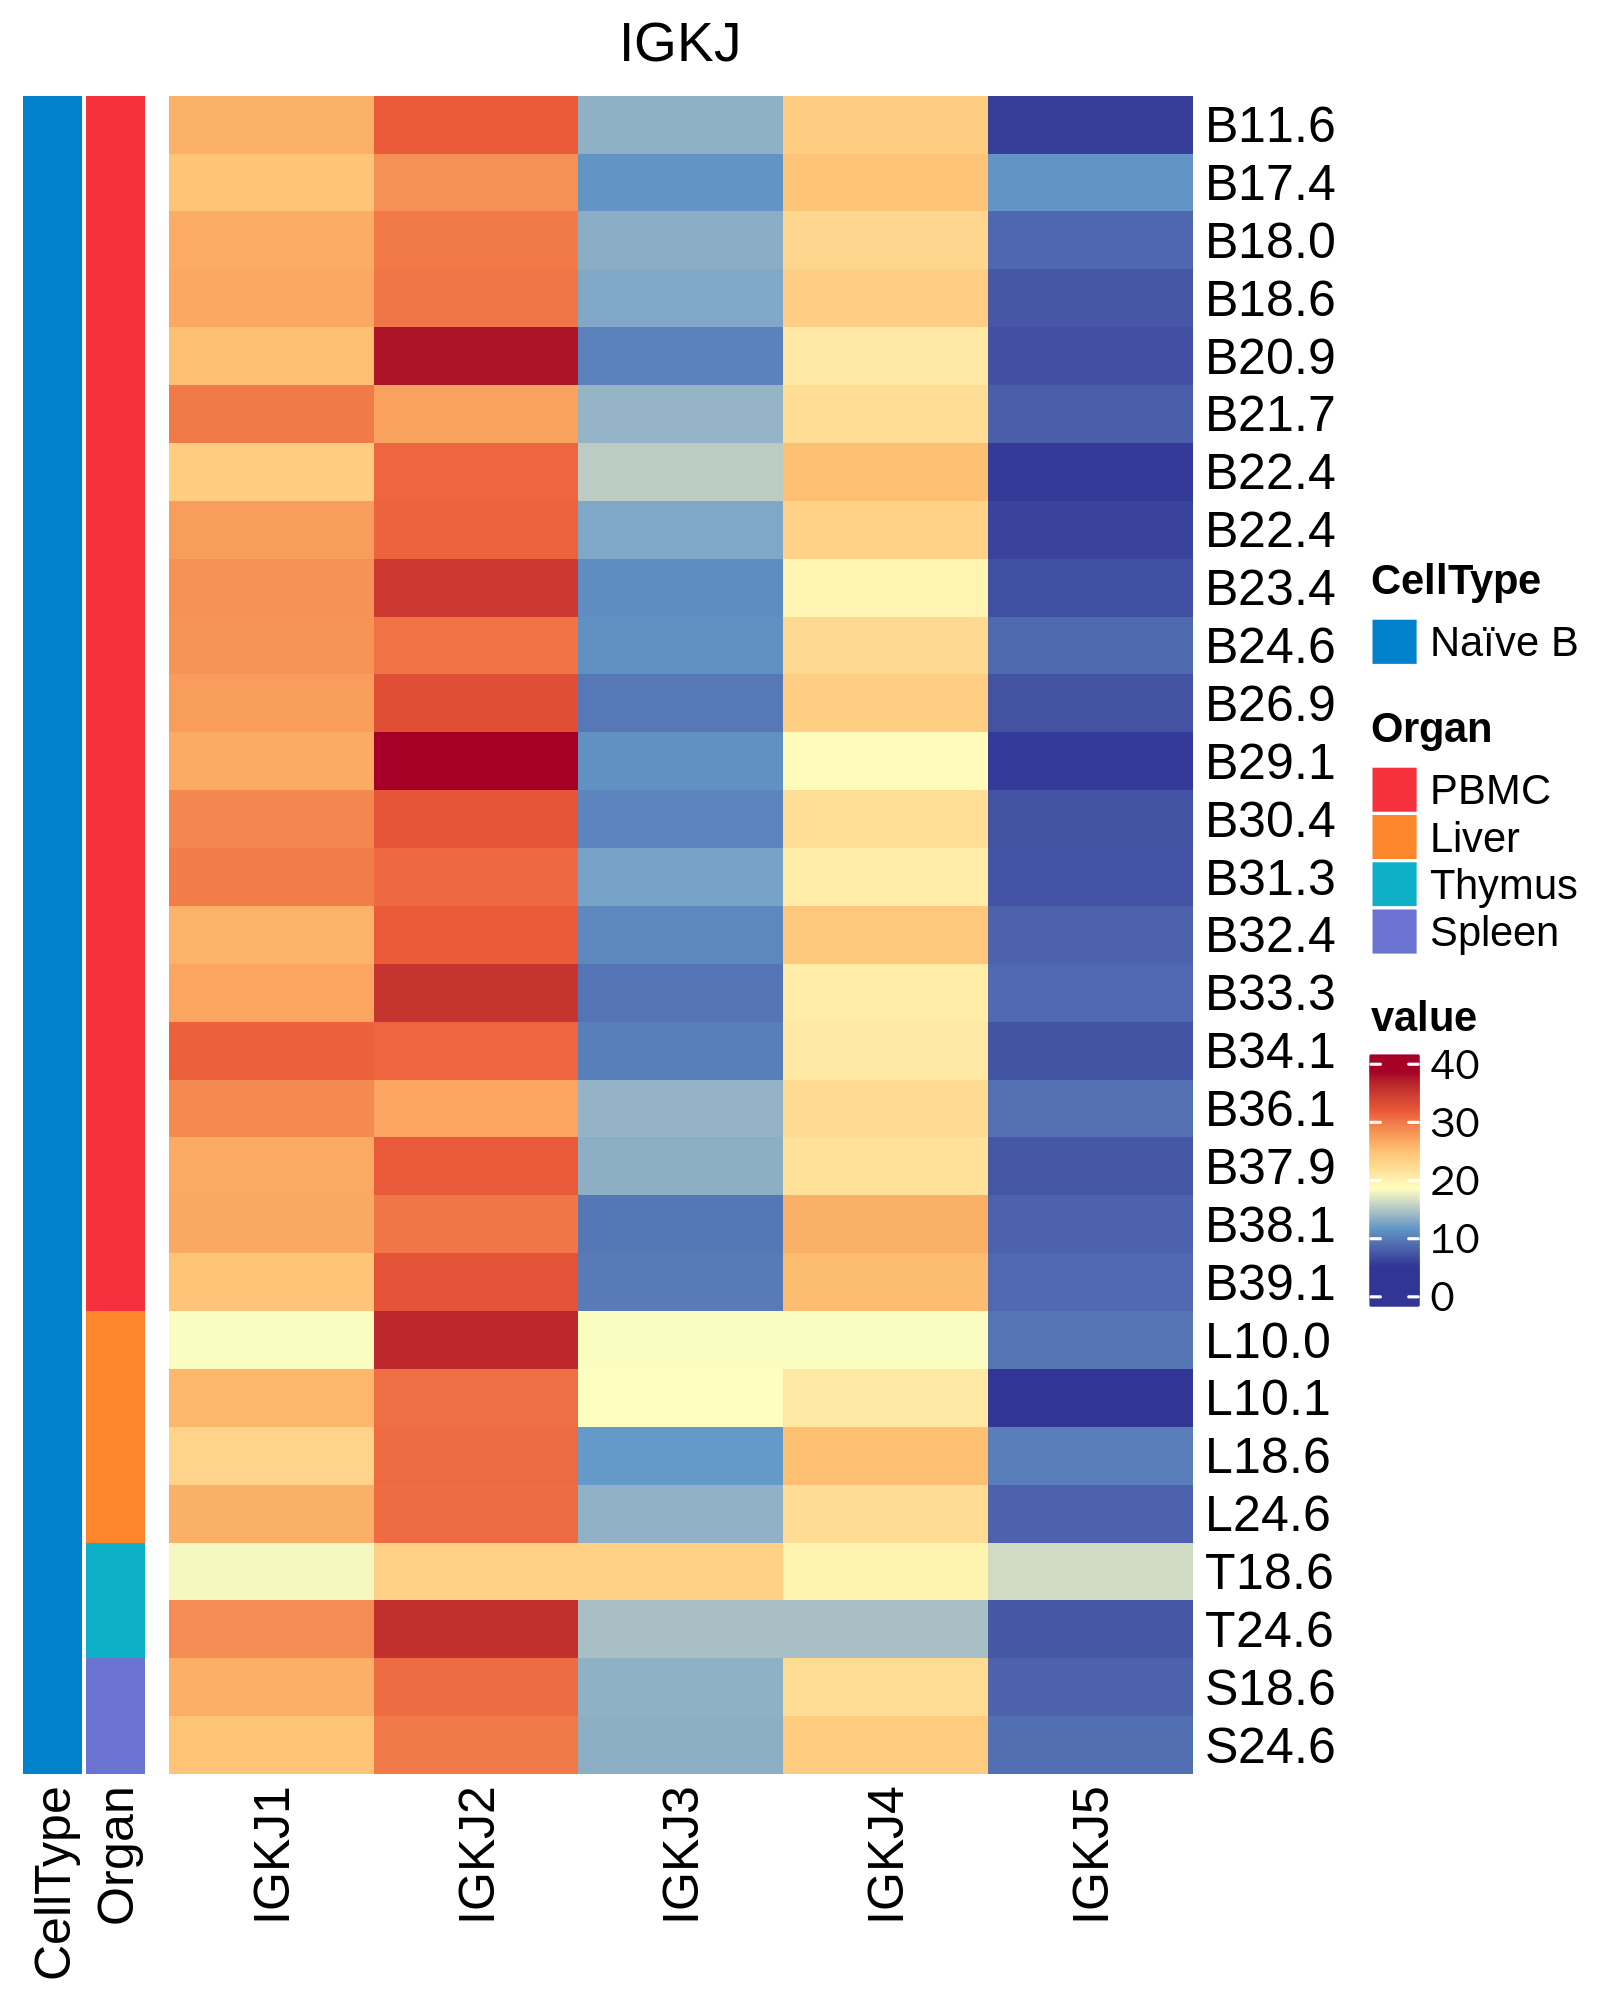

In [103]:
%%R  -w 1600 -h 2000 -r 300 -i IGKJJ_chainlong -i j_call_B_VJ_main_list
IGKJJ_chainlong$value[which(as.numeric(IGKJJ_chainlong$value)==100)] <- median(IGKJJ_chainlong$value)
# IGKJJ_chainlong$value[which(as.numeric(IGKJJ_chainlong$value)>50)] <- median(IGKJJ_chainlong$value)
IGKJJheatmap <- BCRTR_heatmap(IGKJJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ")
# print(heatmap)
IGKJJheatmap[[1]]+IGKJJheatmap[[2]]

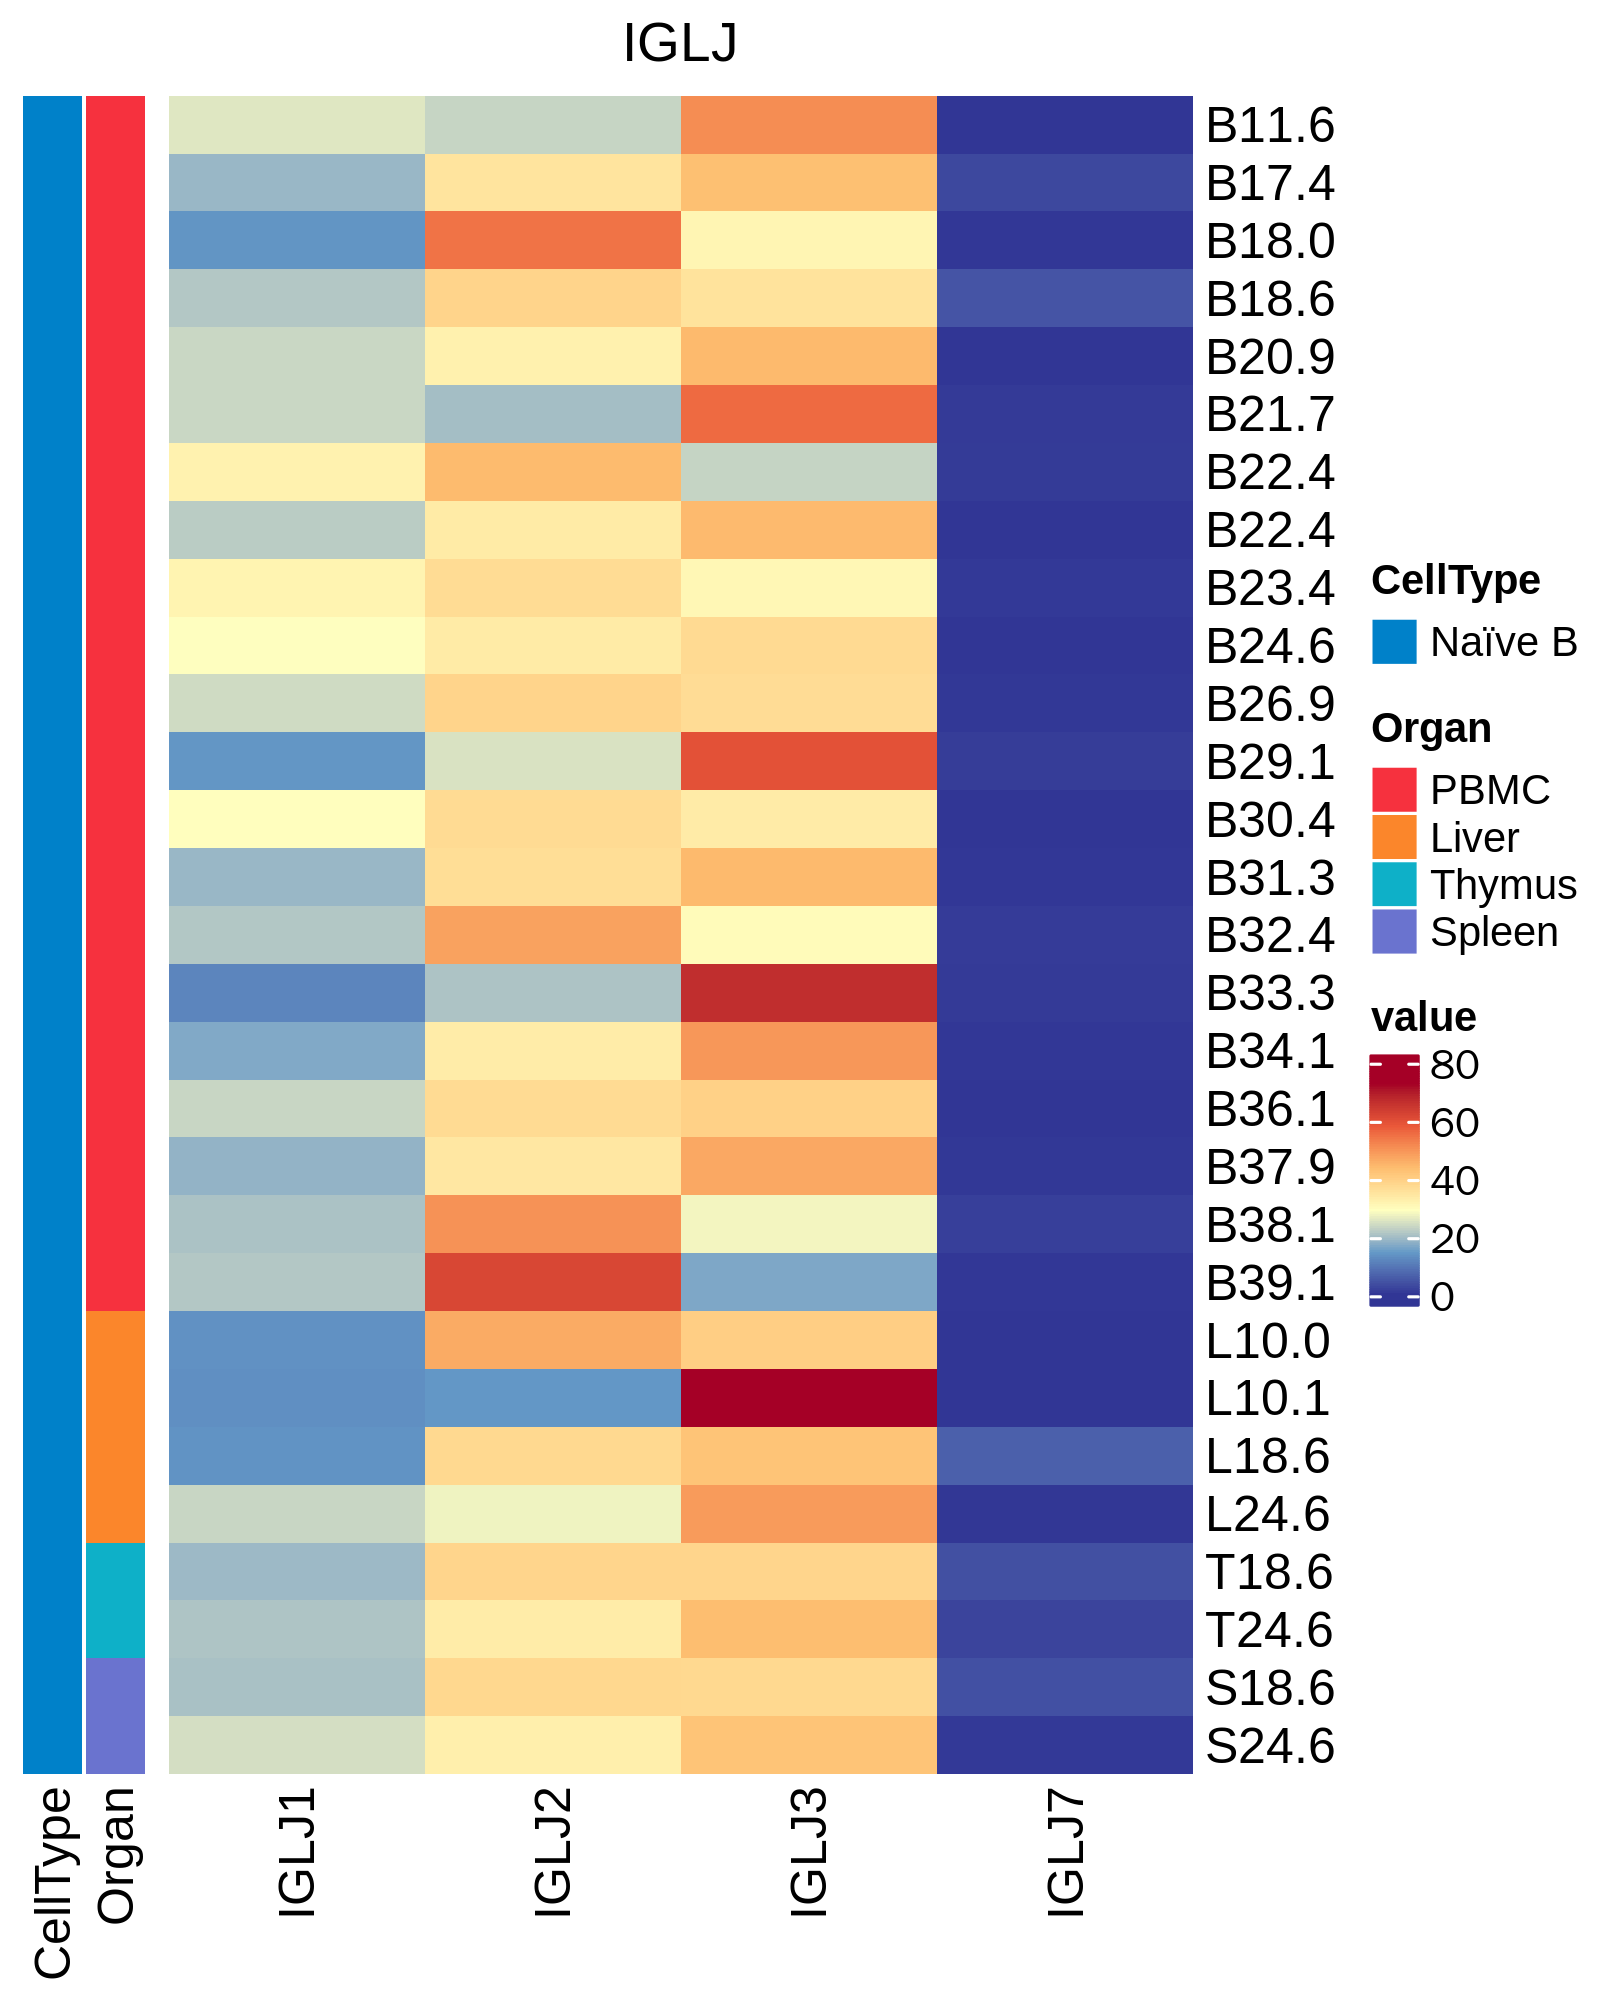

In [104]:
%%R  -w 1600 -h 2000 -r 300 -i IGLJJ_chainlong -i j_call_B_VJ_main_list
IGLJJheatmap <- BCRTR_heatmap(IGLJJ_chainlong, j_call_B_VJ_main_list,titlename="IGLJ")
# print(heatmap)
IGLJJheatmap[[1]]+IGLJJheatmap[[2]]

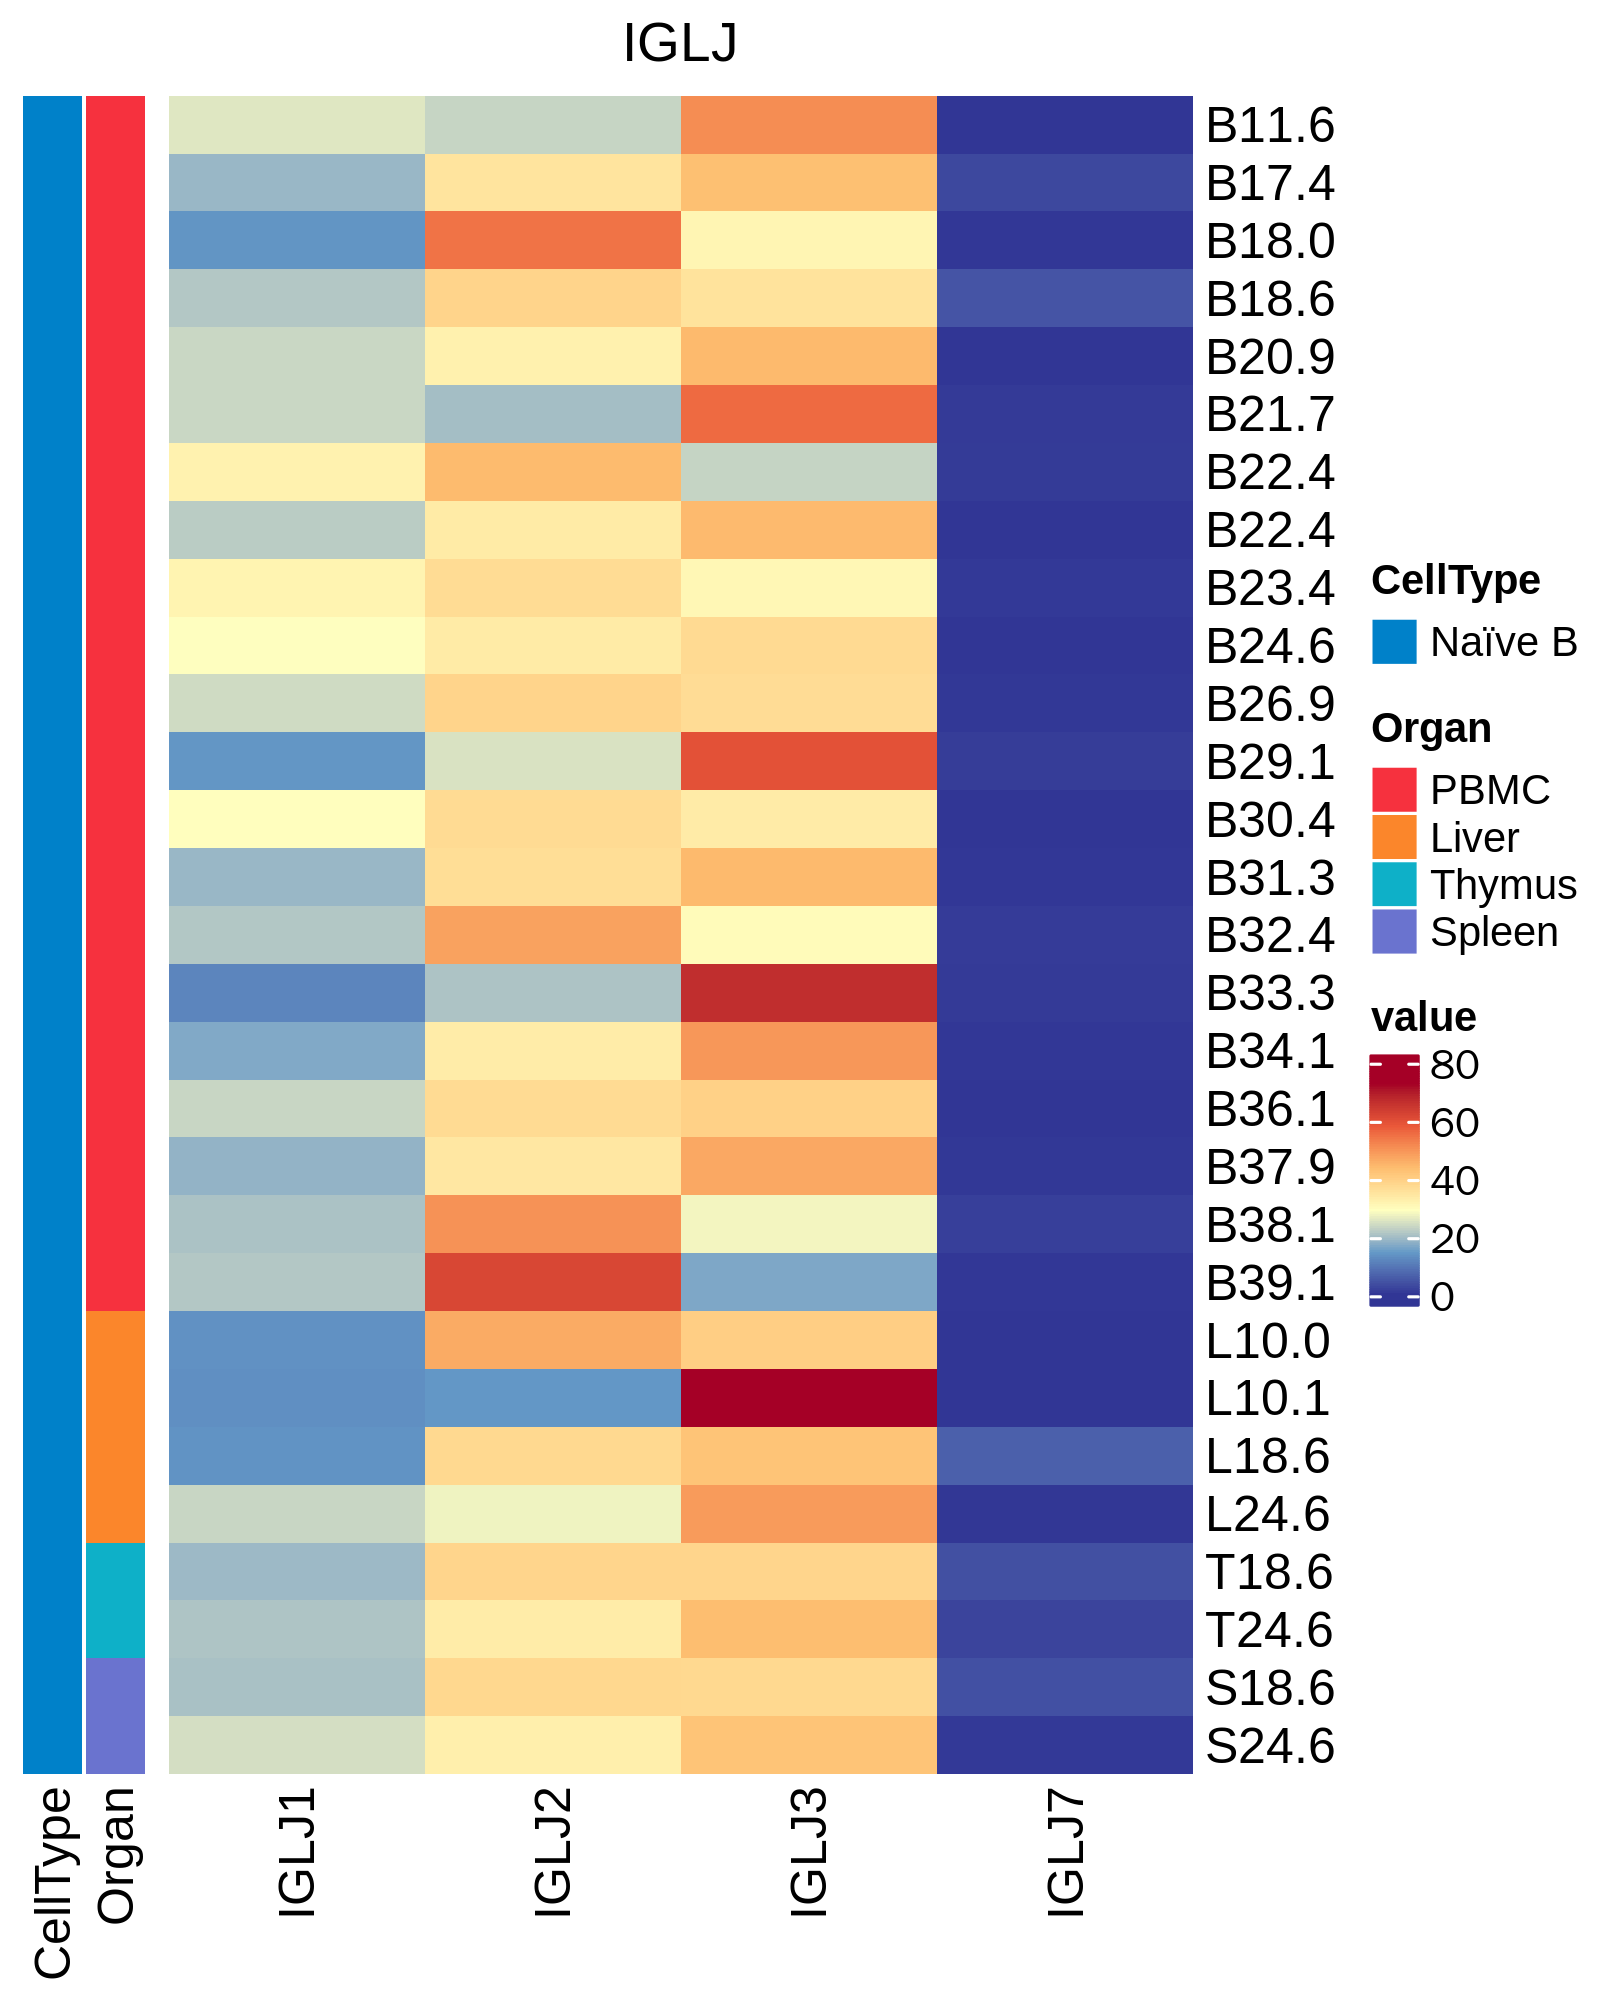

In [105]:
%%R  -w 1600 -h 2000 -r 300 -i IGLJJ_chainlong -i j_call_B_VJ_main_list
IGLJJheatmap <- BCRTR_heatmap(IGLJJ_chainlong, j_call_B_VJ_main_list,titlename="IGLJ")
# print(heatmap)
IGLJJheatmap[[1]]+IGLJJheatmap[[2]]

In [106]:
%%R  -w 6600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRJheatmap+ BCRLheatmap+BCRLJheatmap 

NULL


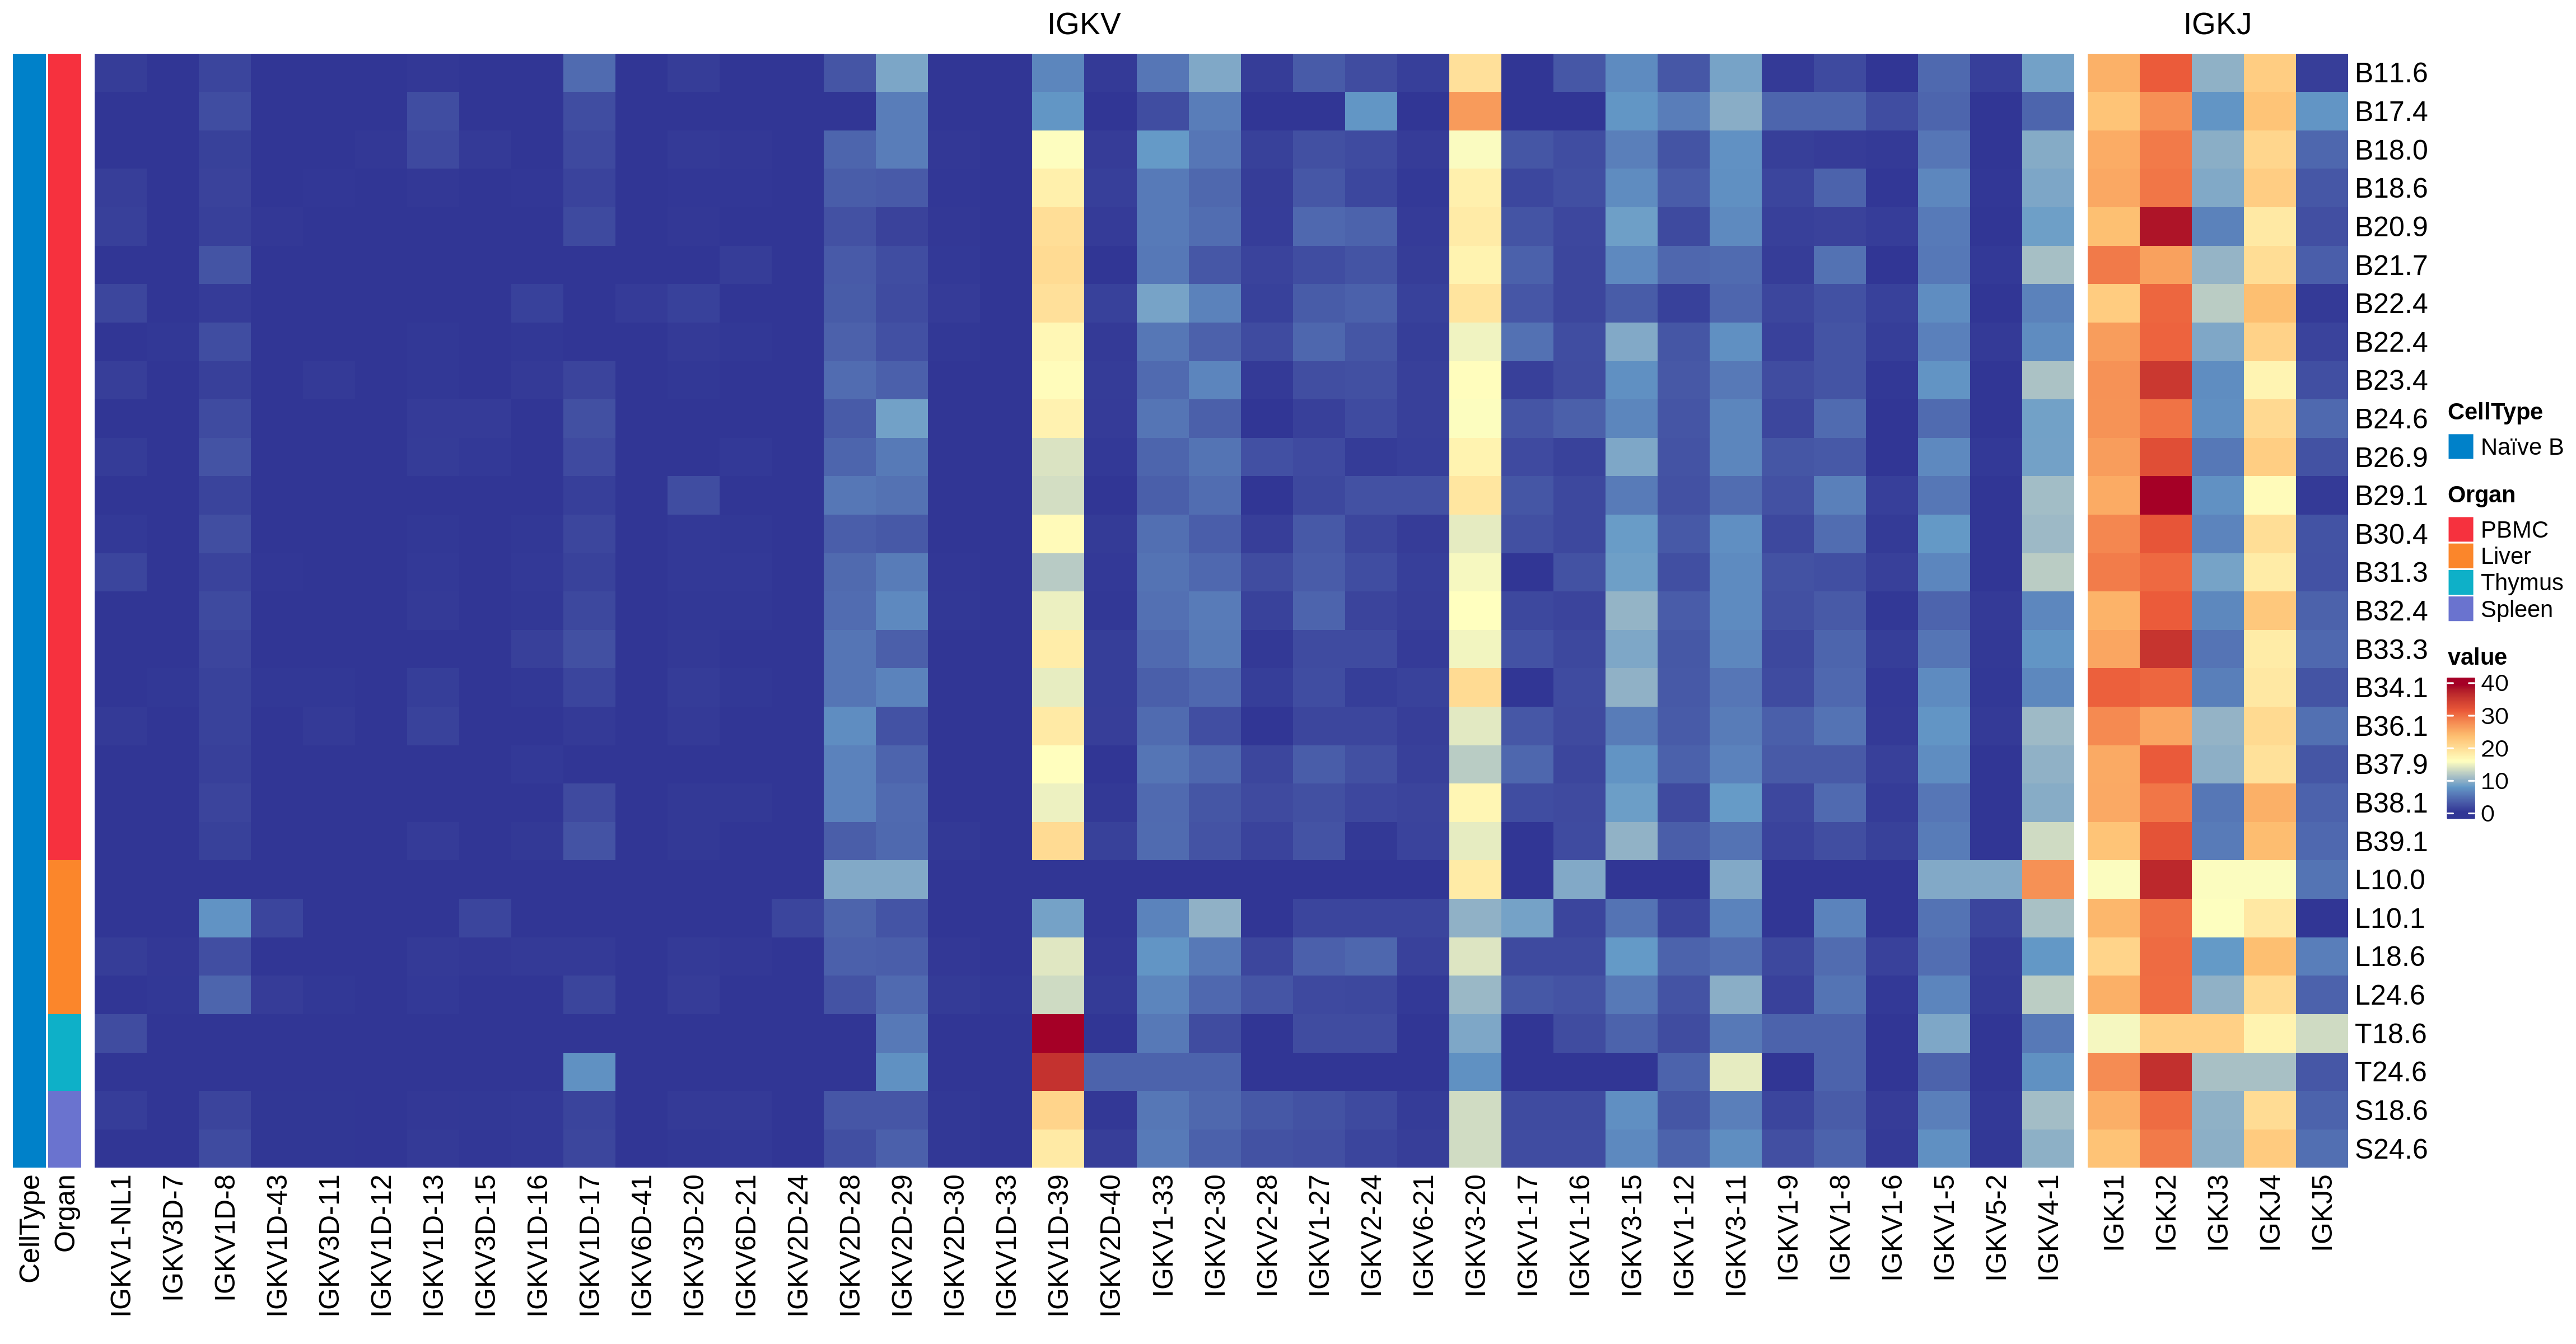

In [107]:
%%R  -w 4600 -h 2400 -r 300 
# row_anno+BCRH_heatmap+BCRLheatmap 
subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]+IGKJJheatmap[[2]]

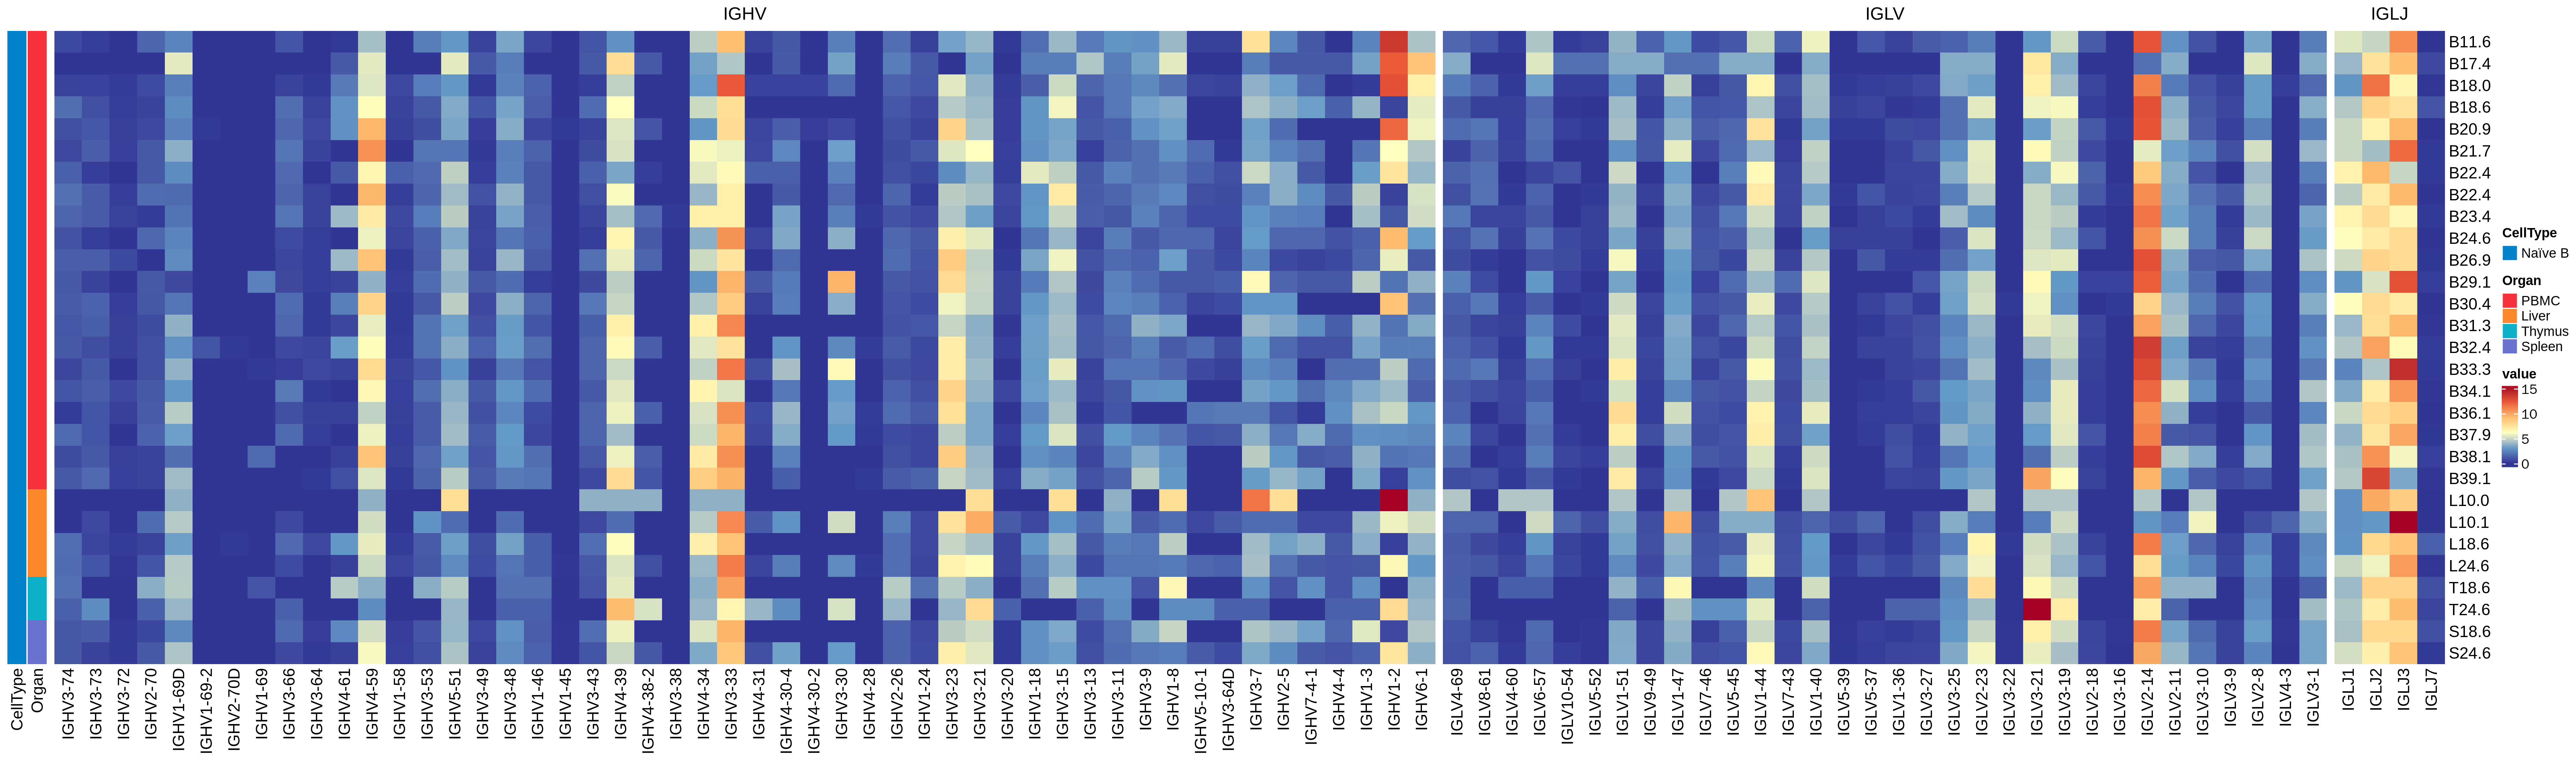

In [108]:
%%R  -w 8000 -h 2400 -r 300 
BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+subBCRLVheatmap[[2]]+IGLJJheatmap[[2]]

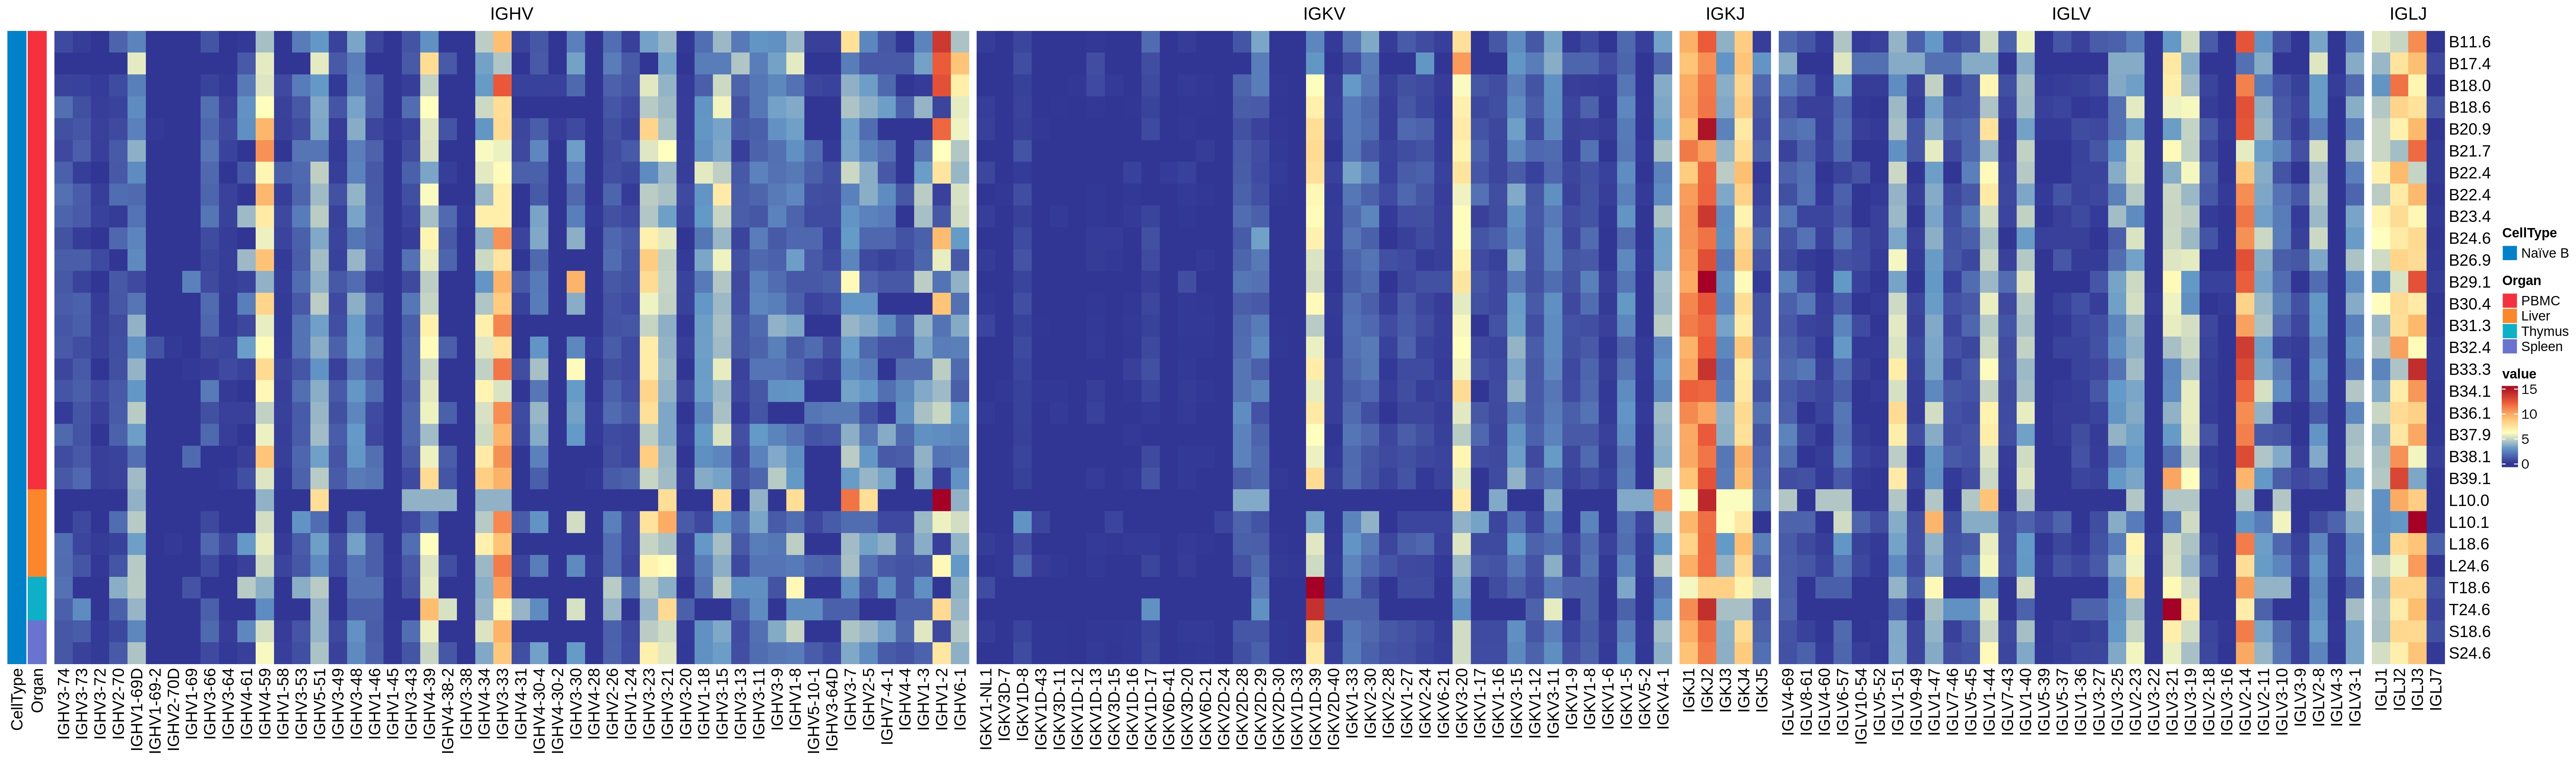

In [109]:
%%R  -w 8000 -h 2400 -r 300 

BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+subBCRKVheatmap[[2]]+IGKJJheatmap[[2]]+subBCRLVheatmap[[2]]+IGLJJheatmap[[2]]

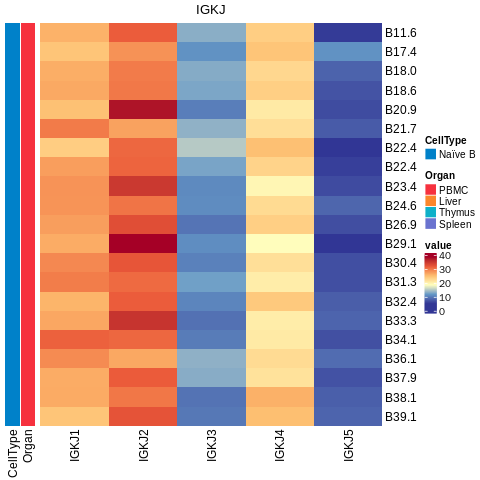

In [110]:
%%R
PBMC_IGKJJ_chainlong=IGKJJ_chainlong[grep("_B",IGKJJ_chainlong$Sample),]
PBMC_IGKJJheatmap <-BCRTR_heatmap(PBMC_IGKJJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ")
# head(PBMC_IGKJJ_chainlong)
PBMC_IGKJJheatmap[[1]]+PBMC_IGKJJheatmap[[2]]

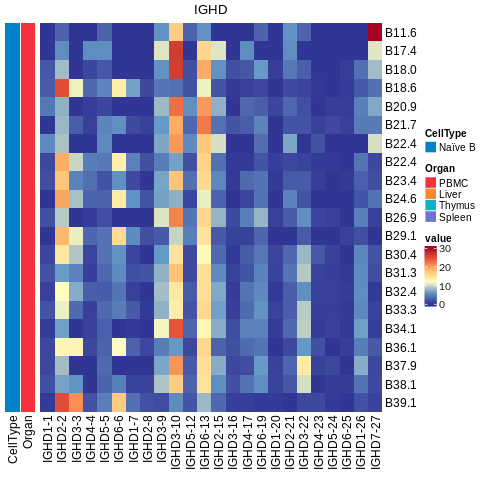

In [111]:
%%R -i IGHD_chainlong -i IGHDgenelist

PBMC_IGHD_chainlong=IGHD_chainlong[grep("_B",IGHD_chainlong$Sample),]
PBMC_IGHD_chainlong$value[which(as.numeric(PBMC_IGHD_chainlong$value)>51)] <- 30
PBMCIGHDheatmap <- BCRTR_heatmap(PBMC_IGHD_chainlong, IGHDgenelist,titlename="IGHD")
PBMCIGHDheatmap[[1]]+PBMCIGHDheatmap[[2]]

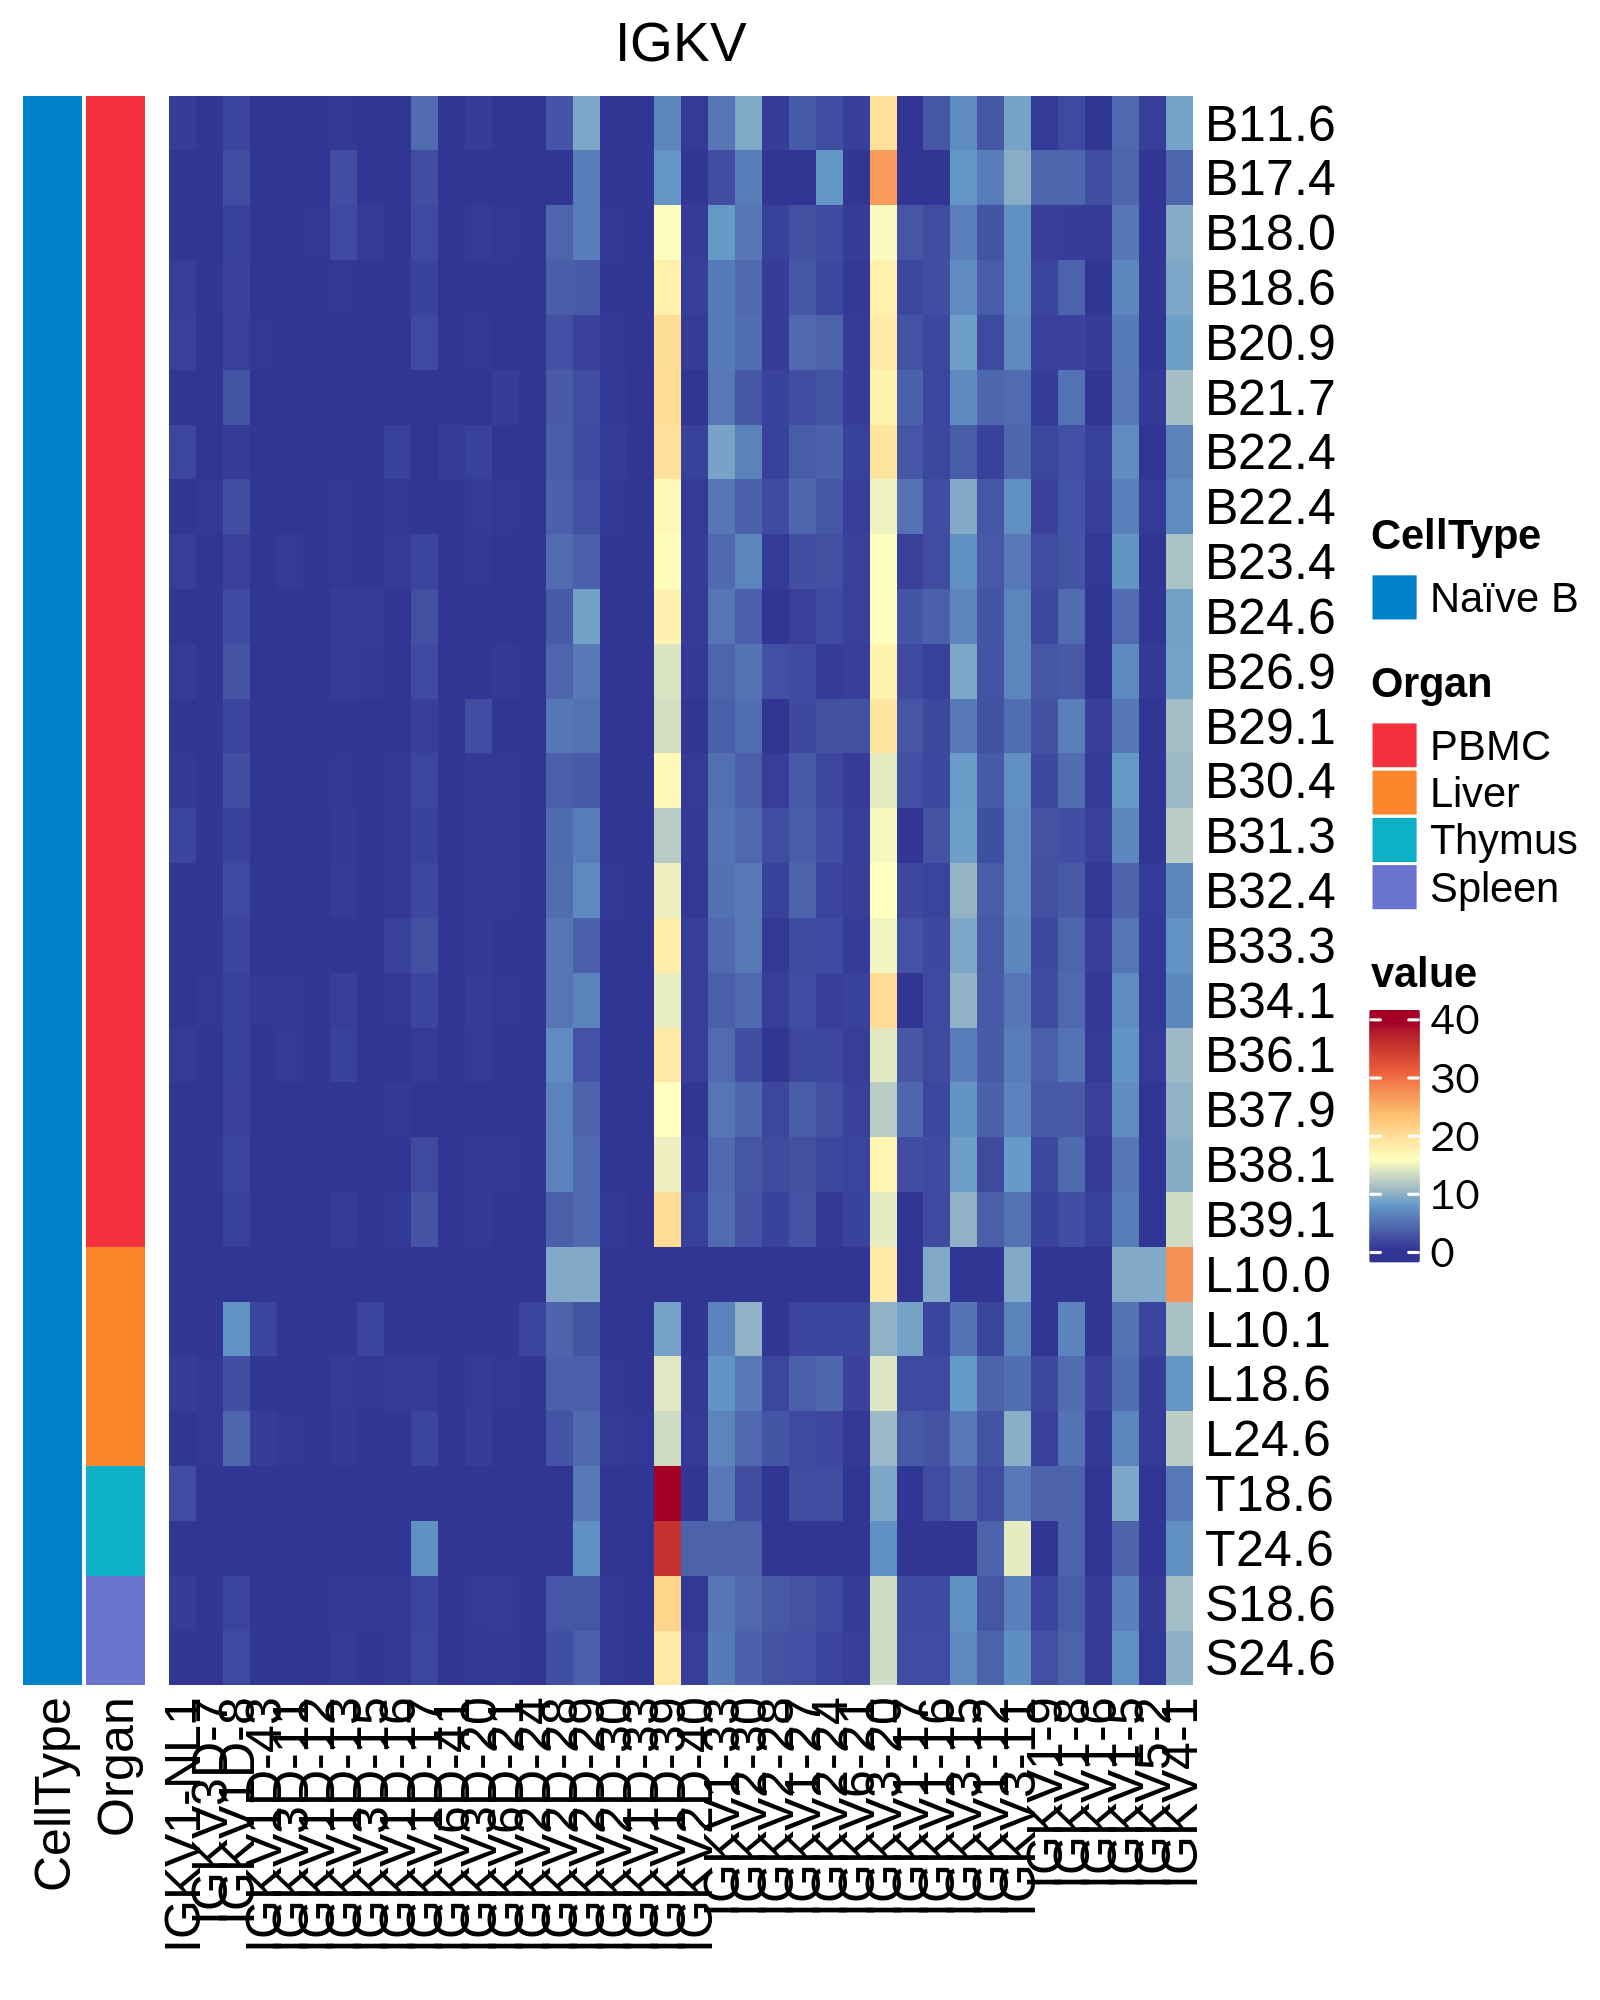

In [112]:
%%R  -w 1600 -h 2000 -r 300 -i IGKJJ_chainlong -i j_call_B_VJ_main_list
BCRHVheatmap <- BCRTR_heatmap(BCRH_chainlong, IGHlistvalues,titlename='IGHV')
IGKJJheatmap <- BCRTR_heatmap(IGKJJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ")
subBCRLVheatmap <- BCRTR_heatmap(subBCRL_chainlong, IGLrealistvalues,titlename="IGLV")
IGLJJheatmap <- BCRTR_heatmap(IGLJJ_chainlong, j_call_B_VJ_main_list,titlename="IGLJ")
subBCRKVheatmap <- BCRTR_heatmap(subBCRK_chainlong, IGKrealistvalues,titlename="IGKV")
subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]

In [113]:
%%R  -w 8000 -h 2400 -r 300 
PBMC_BCRHV_chainlong = BCRH_chainlong[grep("_B",BCRH_chainlong$Sample),]
PBMC_BCRHVheatmap <- BCRTR_heatmap(PBMC_BCRHV_chainlong, IGHlistvalues,titlename='IGHV')

PBMC_IGKJJ_chainlong = IGKJJ_chainlong[grep("_B",IGKJJ_chainlong$Sample),]
PBMC_IGKJJheatmap <- BCRTR_heatmap(PBMC_IGKJJ_chainlong, j_call_B_VJ_main_list,titlename="IGKJ")

PBMC_subBCRLV_chainlong = subBCRL_chainlong[grep("_B",subBCRL_chainlong$Sample),]
PBMC_subBCRLVheatmap <- BCRTR_heatmap(PBMC_subBCRLV_chainlong, IGLrealistvalues,titlename="IGLV")

PBMC_IGLJJ_chainlong = IGLJJ_chainlong[grep("_B",IGLJJ_chainlong$Sample),]
PBMC_IGLJJheatmap <- BCRTR_heatmap(PBMC_IGLJJ_chainlong, j_call_B_VJ_main_list,titlename="IGLJ")

PBMC_subBCRKV_chainlong = subBCRK_chainlong[grep("_B",subBCRK_chainlong$Sample),]
PBMC_subBCRKVheatmap <- BCRTR_heatmap(PBMC_subBCRKV_chainlong, IGKrealistvalues,titlename="IGKV")
PBMC_IGHJ_chainlong = BCRHJ_chainlong[grep("_B", BCRHJ_chainlong$Sample),]
PBMC_IGHJheatmap <- BCRTR_heatmap(PBMC_IGHJ_chainlong, IGHJlist,titlename="IGHJ")

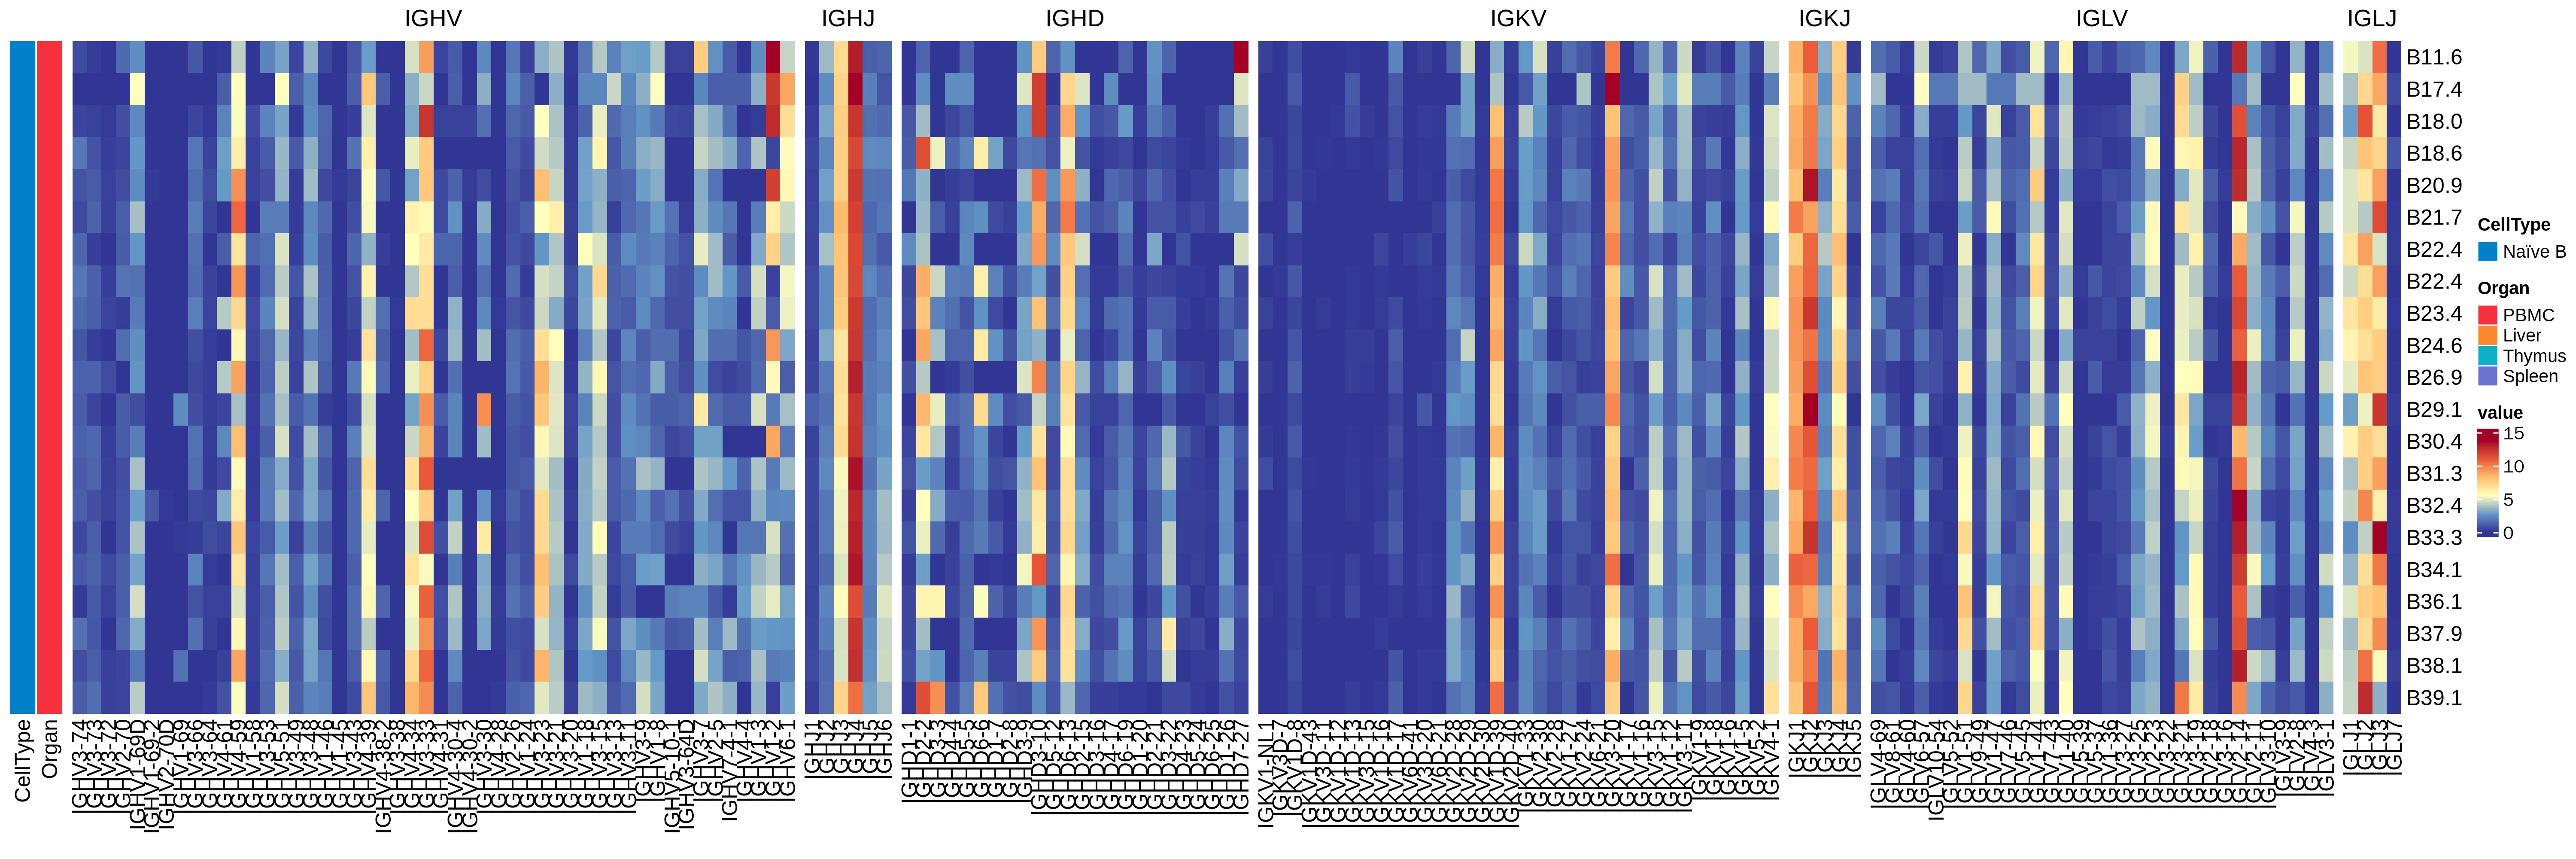

In [114]:
%%R  -w 6000 -h 2000 -r 300
PBMC_BCRHVheatmap[[1]] + PBMC_BCRHVheatmap[[2]] + PBMC_IGHJheatmap[[2]]+PBMCIGHDheatmap[[2]]+ PBMC_subBCRKVheatmap[[2]] + PBMC_IGKJJheatmap[[2]] + PBMC_subBCRLVheatmap[[2]] + PBMC_IGLJJheatmap[[2]]

In [115]:
mkdir -p /data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31

In [116]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCR_all_heatmap.pdf", width = 30, height = 6)


print(PBMC_BCRHVheatmap[[1]] + PBMC_BCRHVheatmap[[2]] + PBMC_IGHJheatmap[[2]]+PBMCIGHDheatmap[[2]]+ PBMC_subBCRKVheatmap[[2]] + PBMC_IGKJJheatmap[[2]] + PBMC_subBCRLVheatmap[[2]] + PBMC_IGLJJheatmap[[2]]
)

dev.off()

[1] 2


In [117]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCRK_all_heatmap.pdf", width = 10, height = 6)


print(subBCRKVheatmap[[1]]+subBCRKVheatmap[[2]]+IGKJJheatmap[[2]])
dev.off()

[1] 2


In [118]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_IGKJ_all_heatmap.pdf", width = 4, height = 6)


print(IGKJJheatmap[[1]]+IGKJJheatmap[[2]])
dev.off()

[1] 2


In [119]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_IGLJ_all_heatmap.pdf", width = 4, height = 6)


print(IGLJJheatmap[[1]]+IGLJJheatmap[[2]])
dev.off()

[1] 2


In [120]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_IGKV_all_heatmap.pdf", width = 12, height = 6)


print( PBMC_subBCRKVheatmap[[1]]+ PBMC_subBCRKVheatmap[[2]])
dev.off()

[1] 2


In [121]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_IGLV_all_heatmap.pdf", width = 12, height = 6)


print( PBMC_subBCRLVheatmap[[1]]+ PBMC_subBCRLVheatmap[[2]])
dev.off()

[1] 2


In [122]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCRL_all_heatmap.pdf", width = 12, height = 6)


print(BCRHVheatmap[[1]]+BCRHVheatmap[[2]]+subBCRLVheatmap[[2]]+IGLJJheatmap[[2]])

dev.off()

[1] 2


In [123]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCRD_all_heatmap.pdf", width = 8, height = 6)


print(PBMCIGHDheatmap[[1]]+PBMCIGHDheatmap[[2]])

dev.off()

[1] 2


In [124]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCRV_all_heatmap.pdf", width = 10, height = 6)


print(PBMC_BCRHVheatmap[[1]] + PBMC_BCRHVheatmap[[2]])

dev.off()

[1] 2


In [125]:
%%R  -w 6200 -h 2400 -r 400


pdf("/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S31/S31A_BCRHJ_all_heatmap.pdf", width = 4, height = 6)


print(PBMC_IGHJheatmap[[1]] + PBMC_IGHJheatmap[[2]])

dev.off()

[1] 2


In [126]:
mkdir -p ~/Allcount/All_scanpyData/BCRTCRchain/

In [127]:
%%R
# head(TCRH2)
write.csv(IGHlistvalues ,'~/Allcount/All_scanpyData/BCRTCRchain/IGHlistvalues.csv')

In [128]:
%%R
# head(TCRH2)
write.csv(subBCRL_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRL_chainlong.csv')

In [129]:
%%R
long_variables <- ls(pattern = "long")
print(long_variables)

 [1] "BCRH_chainlong"          "BCRHJ_chainlong"        
 [3] "IGHD_chainlong"          "IGKJJ_chainlong"        
 [5] "IGLJJ_chainlong"         "PBMC_BCRHV_chainlong"   
 [7] "PBMC_IGHD_chainlong"     "PBMC_IGHJ_chainlong"    
 [9] "PBMC_IGKJJ_chainlong"    "PBMC_IGLJJ_chainlong"   
[11] "PBMC_subBCRKV_chainlong" "PBMC_subBCRLV_chainlong"
[13] "subBCRK_chainlong"       "subBCRL_chainlong"      


In [130]:
%%R 
# head(TCRH2)
write.csv(BCRLJ_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRLJ_chainlong.csv')


Error in is.data.frame(x) : 找不到对象'BCRLJ_chainlong'


RInterpreterError: Failed to parse and evaluate line "# head(TCRH2)\nwrite.csv(BCRLJ_chainlong,'~/Allcount/All_scanpyData/BCRTCRchain/BCRLJ_chainlong.csv')\n".
R error message: "Error in is.data.frame(x) : 找不到对象'BCRLJ_chainlong'"

In [ ]:
%%R

long_variables <- ls(pattern = "chainlong")


folder_path <- "~/Allcount/All_scanpyData/BCRTCRchain"


if (!dir.exists(folder_path)) {
  dir.create(folder_path, recursive = TRUE)
}


for (var_name in long_variables) {
  
  var_value <- get(var_name)
  print(var_name)

  file_name <- paste0(var_name, ".csv")
  
  file_path <- file.path(folder_path, file_name)

  write.csv(var_value, file_path, row.names = FALSE)
}

In [ ]:
%%R
# head(TCRH2)
save_long_variables_to_csv <- function(pattern, folder_path) {
  if (!dir.exists(folder_path)) {
    dir.create(folder_path, recursive = TRUE)
  }

  long_variables <- ls(pattern = pattern)

  for (var_name in long_variables) {
    var_value <- get(var_name)
      print(var_value)
    file_path <- file.path(folder_path, paste0(var_name, ".csv"))
    write.csv(var_value, file_path, row.names = FALSE)
  }
}
save_long_variables_to_csv("chainlong", "~/Allcount/All_scanpyData/BCRTCRchain")

In [ ]:
mkdir ~/Allcount/All_scanpyData/BCRTCRchain/List

In [ ]:
%%R
# head(TCRH2)
save_long_variables_to_csv("list", "~/Allcount/All_scanpyData/BCRTCRchain/List")

In [ ]:
%%R
# head(TCRH2)
# write.csv(j_call_B_VDJ_main_list ,'~/Allcount/All_scanpyData/BCRTCRchain/j_call_B_VDJ_main_list.csv')

In [ ]:
%%R
# head(TCRH2)
# write.csv(IGKlistvalues ,'~/Allcount/All_scanpyData/BCRTCRchain/IGKlistvalues.csv')

In [ ]:
%%R
# head(TCRH2)
# write.csv(j_call_B_VDJ_main_list ,'~/Allcount/All_scanpyData/BCRTCRchain/j_call_B_VDJ_main_list.csv')